# Red Wine Quality Prediction

### Project Objective

Welcome to this notebook, where I'll guide you through an in-depth journey of Exploratory Data Analysis (EDA) and classification tasks aimed at delivering balanced and dependable results. In this exploration, I will evaluate the effectiveness of various machine learning algorithms, categorized as follows:

 1. **Linear Models**: Logistic Regression
 2. **Tree-Based Models**: Decision Trees & Random Forests
 3. **Support Vector Classifier**: SVC
 4. **Boosting Models**: Gradient Boosting, XGBoost, LightGBM, AdaBoost, & CatBoost
 5. **Distance-Based Models**: K-Nearest Neighbors
 
Through this notebook, I'll breakdown the logic and functioning of each model type, outlining their strengths and potential weaknesses. I'll also drive into key hyperparameters for each algorithm, adjusting them methodically to enhance their performance and accuracy. 



#### Summary of the Wine Quality Dataset

The dataset includes data for Portuguese red and white "Vinho Verde" wines, with variables based on physiochemical properties and sensory quality scores. This dataset can be used for classification and regression tasks, though the classes are imbalanced.

**Content**:

- **Input Variables**: Various physiochemical properties of the wine (eg: acidity, sugar, density)
- **Output Variables**: Quality score (0-10) based on sensory data.

**Tips For Use**:

- Try setting an arbitrary quality threshold (eg: score >= 7 as "good") for classification.
- Experiment with hyperparameter tuning for decision tree algorithms and evaluate using AUC and ROC curves.

In [1]:
import os
import re
import string
import random
import sklearn
import numpy as np
import pandas as pd
import seaborn as sns
from PIL import Image
from tqdm import tqdm
import lightgbm as lgbm
import missingno as msno
from sklearn.svm import SVC
import plotly.express as px
import matplotlib.pyplot as plt
from xgboost import XGBClassifier
from matplotlib.ticker import FuncFormatter
from sklearn.metrics import RocCurveDisplay
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelBinarizer
from sklearn.linear_model import LogisticRegression
from catboost import CatBoostClassifier
from sklearn.inspection import permutation_importance
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import confusion_matrix, roc_curve, RocCurveDisplay, auc, accuracy_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
import warnings

warnings.filterwarnings("ignore")
%matplotlib inline
sns.set(color_codes = True)
sns.set_palette(palette = 'gist_heat', n_colors = 8)
sns.set(style="whitegrid")

In [2]:
data = pd.read_csv("C:/Users/GamerTech/Documents/Python/winequality_red.csv")

df = pd.DataFrame(data)

df

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                    11.0                  34.0  0.99780  3.51       0.56   
1                    25.0                  67.0  0.99680  3.20       0.68   
2                    15.0                  54.0  0.99700  3.26       0.65   
3                    17.0                  60.0  0.99800  3.16       0.58   
4                    11.0                  34.0  0.99780  3.51       0.56   
...                   ...                   ...      ...   ...        ...   
1594                 32.0                  44.0  0.99490  3.45       0.58   
1595                 39.0                  51.0  0.99512  3.52       0.76   
1596                 29.0                  40.0  0.99574  3.42       0.75   
1597                 32.0                  44.0  0.99547  3.57       0.71   
1598                 18.0                  42.0  0.99549  3.39       0.66   

      alcohol  quality  
0         9.4        5  
1         9.8        5  
2         9.8        5  
3         9.8        6  
4         9.4        5  
...       ...      ...  
1594     10.5        5  
1595     11.2        6  
1596     11.0        6  
1597     10.2        5  
1598     11.0        6  

[1599 rows x 12 columns]

In [3]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [4]:
df.shape

(1599, 12)

In [5]:
def check_df(df: object, head: object = 5) -> object:
    
    print("\nShape")
    
    print(df.shape)
    
    print("\nTypes")
    
    print(df.dtypes)
    
    print("\nNANs")
    
    print(df.isnull().sum())
    
    print("\nInfo")
    
    print(df.info())
    
check_df(df)


Shape
(1599, 12)

Types
fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

NANs
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

Info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599

In [6]:
df['quality'].unique()

array([5, 6, 7, 4, 8, 3])

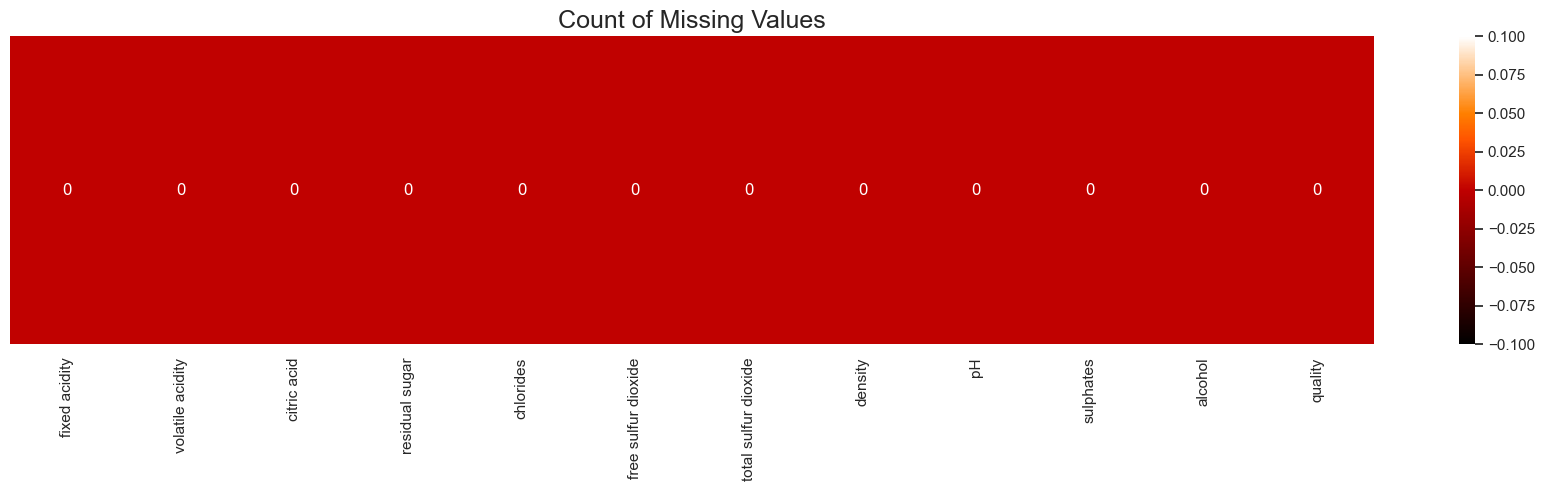

In [7]:
plt.figure(figsize=(22,4))

sns.heatmap((df.isna().sum()).to_frame(name='').T,cmap='gist_heat', annot=True,
           
           fmt='0.0f').set_title('Count of Missing Values', fontsize=18)

plt.show()

In [8]:
df.describe().T.style.background_gradient(cmap='RdGy', axis=1)

- We can see statistical information on the table above.

In [9]:
# Finding unique data

df.apply(lambda x: len(x.unique()))

fixed acidity            96
volatile acidity        143
citric acid              80
residual sugar           91
chlorides               153
free sulfur dioxide      60
total sulfur dioxide    144
density                 436
pH                       89
sulphates                96
alcohol                  65
quality                   6
dtype: int64

In [10]:
unique = df.nunique().sort_values()

unique_values = df.apply(lambda x: x.unique())

pd.DataFrame({'Number of Unique Values': unique, 'Unique Values': unique_values})

Number of Unique Values  \
alcohol                                    65   
chlorides                                 153   
citric acid                                80   
density                                   436   
fixed acidity                              96   
free sulfur dioxide                        60   
pH                                         89   
quality                                     6   
residual sugar                             91   
sulphates                                  96   
total sulfur dioxide                      144   
volatile acidity                          143   

                                                          Unique Values  
alcohol               [9.4, 9.8, 10.0, 9.5, 10.5, 9.2, 9.9, 9.1, 9.3...  
chlorides             [0.076, 0.098, 0.092, 0.075, 0.069, 0.065, 0.0...  
citric acid           [0.0, 0.04, 0.56, 0.06, 0.02, 0.36, 0.08, 0.29...  
density               [0.9978, 0.9968, 0.997, 0.998, 0.9964, 0.9946,...  
fixed acidity         [7.4, 7.8, 11.2, 7.9, 7.3, 7.5, 6.7, 5.6, 8.9,...  
free sulfur dioxide   [11.0, 25.0, 15.0, 17.0, 13.0, 9.0, 16.0, 52.0...  
pH                    [3.51, 3.2, 3.26, 3.16, 3.3, 3.39, 3.36, 3.35,...  
quality                                              [5, 6, 7, 4, 8, 3]  
residual sugar        [1.9, 2.6, 2.3, 1.8, 1.6, 1.2, 2.0, 6.1, 3.8, ...  
sulphates             [0.56, 0.68, 0.65, 0.58, 0.46, 0.47, 0.57, 0.8...  
total sulfur dioxide  [34.0, 67.0, 54.0, 60.0, 40.0, 59.0, 21.0, 18....  
volatile acidity      [0.7, 0.88, 0.76, 0.28, 0.66, 0.6, 0.65, 0.58,...

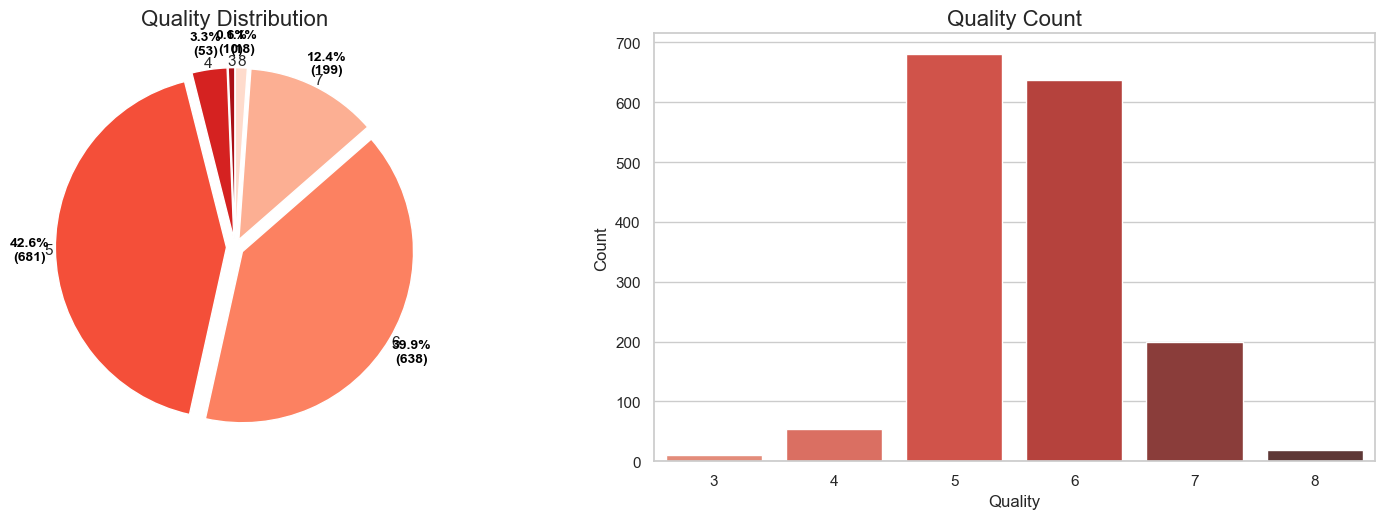

In [11]:
# Function to place labels outside the pie chart

def autopct_outside(pct, values):
    
    total = sum(values)
    
    val = int(round(pct * total / 100.0))
    
    return f'{pct:.1f}%\n({val})'


plt.figure(figsize=(16,6))



# First Plot - Pie Chart

plt.subplot(1, 2, 1)

quality_counts = data['quality'].value_counts().sort_index()

explode = [0.05] * len(quality_counts)   # Slight separation for all sides

wedges, texts, autotexts = plt.pie(

    quality_counts,

    labels = quality_counts.index,

    colors = sns.color_palette('Reds_r', len(quality_counts)),

    autopct = lambda pct: autopct_outside(pct, quality_counts),

    startangle=90,

    explode = explode,

    pctdistance=1.15,   # Adjusts position of the percentage labels

    labeldistance=1.04   # Adjusts position of the labels

)


# Adjust label positions

for text in texts:
    
    text.set_horizontalalignment('center')
    
for autotext in autotexts:
    
    autotext.set_color('black')
    
    autotext.set_fontsize(10)
    
    autotext.set_weight('bold')
    

plt.title('Quality Distribution', fontsize=16)


# Second Plot - Count Plot

plt.subplot(1, 2, 2)

sns.countplot(

    data = data,

    x='quality',

    palette = 'Reds_d'

)

plt.title('Quality Count', fontsize=16)

plt.xlabel('Quality', fontsize=12)

plt.ylabel('Count', fontsize=12)


# General layout improvements
plt.tight_layout(pad=3.0)
plt.show()

In [12]:
df.corr(numeric_only=True).T.style.background_gradient(cmap='RdGy', axis=1)

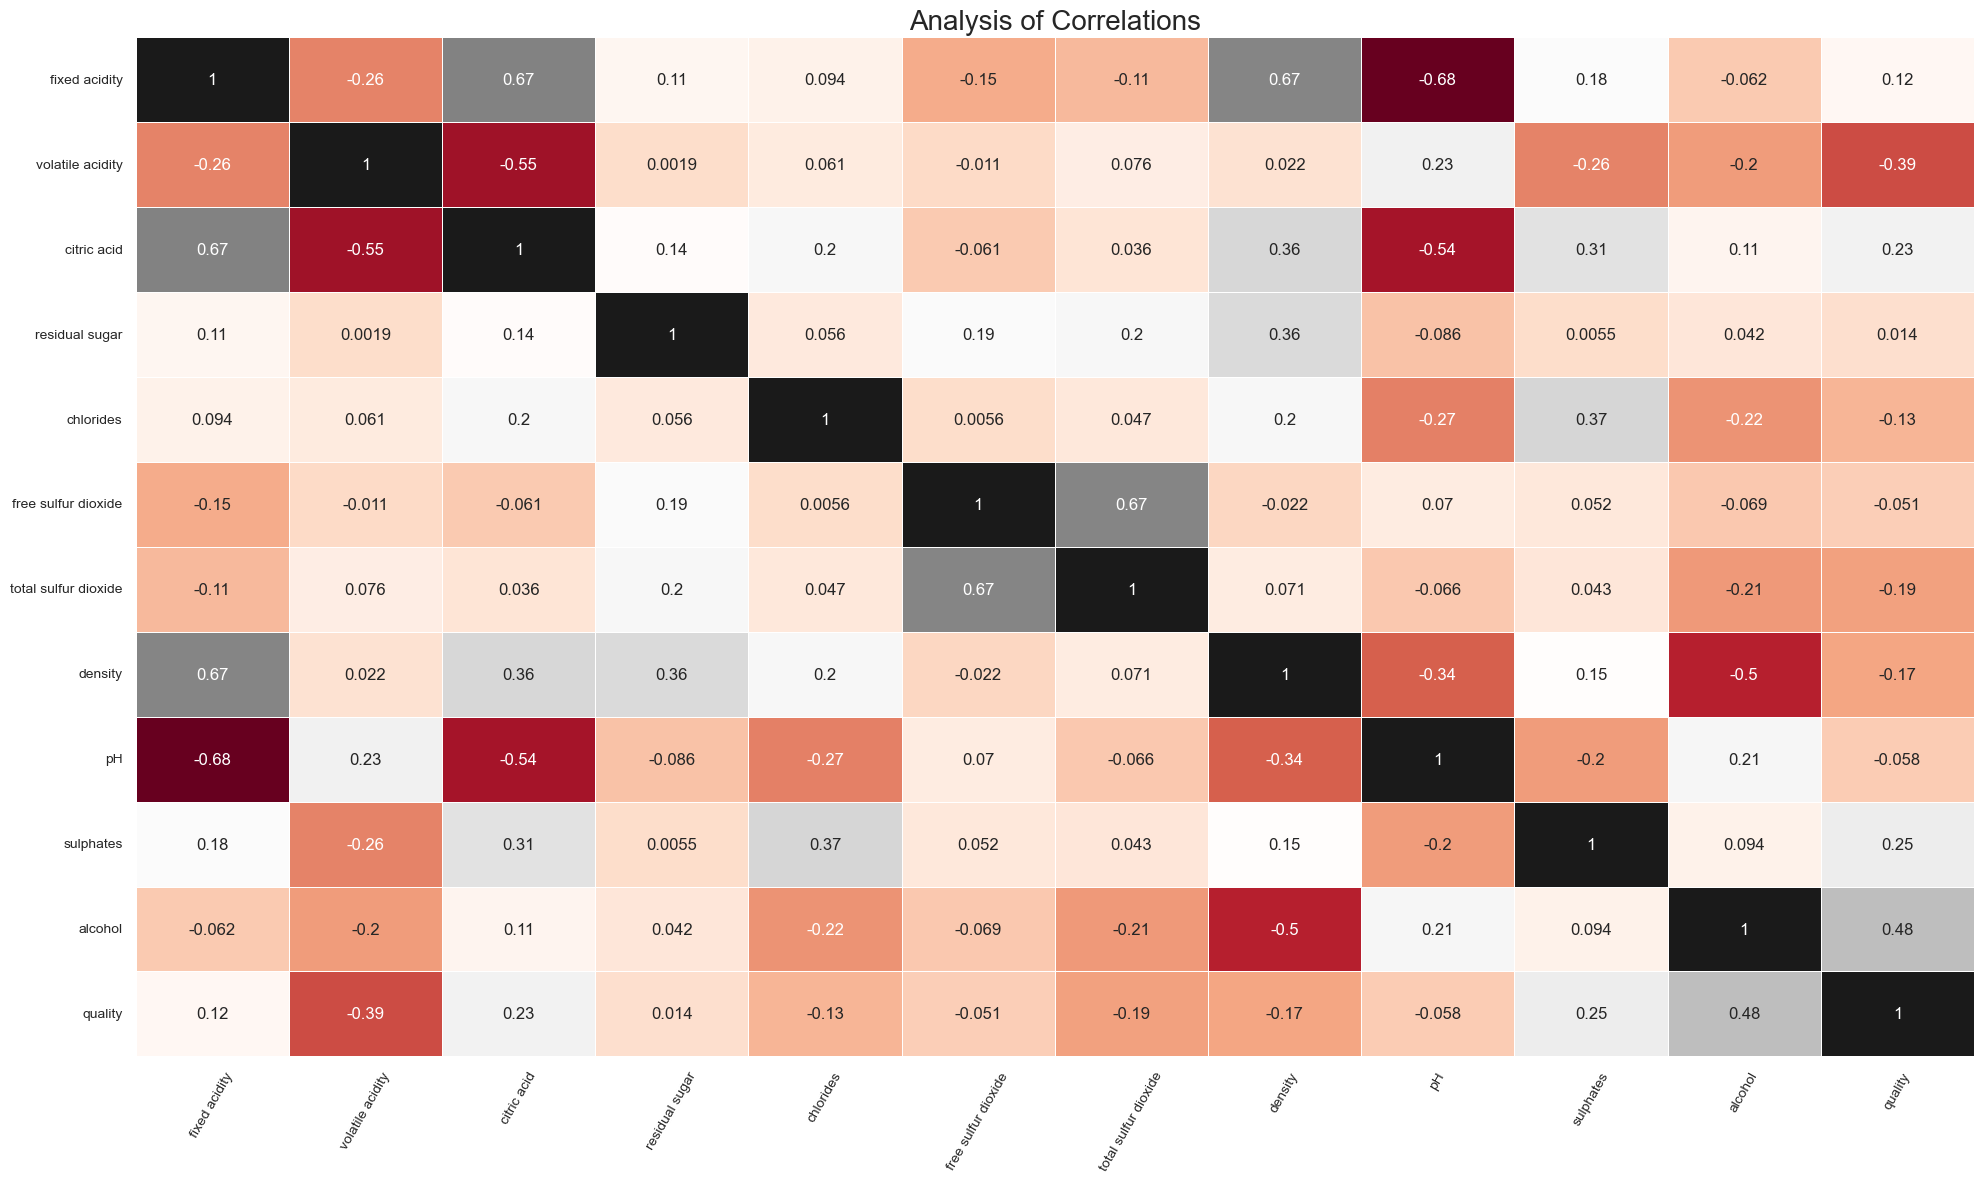

In [13]:
plt.figure(figsize=(20,12))

sns.heatmap(df.corr(numeric_only=True), cmap="RdGy", annot=True, linewidths=.6, cbar = False)

plt.xticks(rotation=60, size=10)

plt.yticks(size=10)

plt.title('Analysis of Correlations', size=20)

plt.tight_layout()

plt.show()

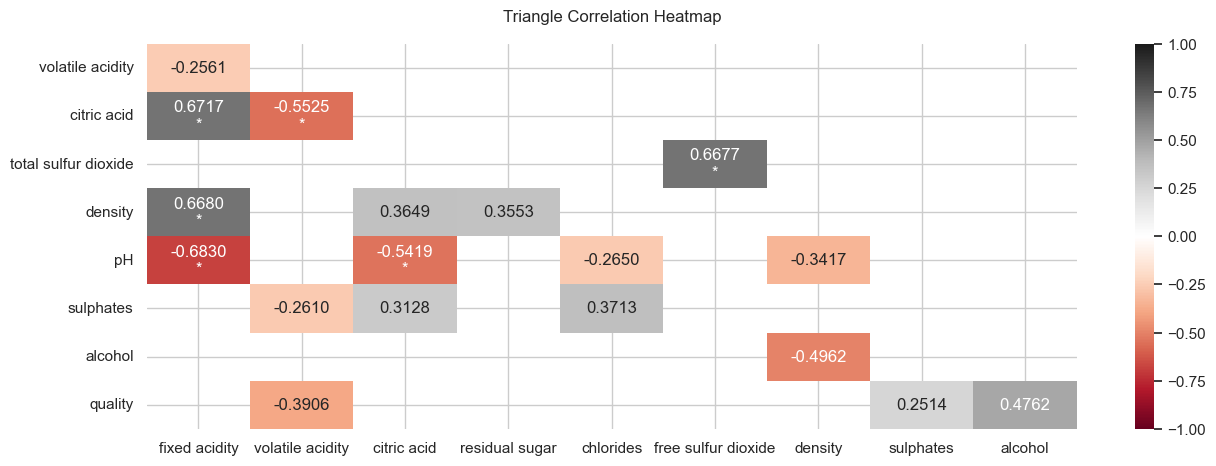

In [14]:
corr = df.corr(numeric_only=True)

f, ax = plt.subplots(figsize=(15,5))

mask = np.triu(np.ones_like(corr, dtype=bool))

cut_off = 0.25

extreme_1 = 0.5

extreme_2 = 0.75

extreme_3 = 0.9

mask |= np.abs(corr) < cut_off

corr = corr[~mask]

remove_empty_rows_and_cols = True

if remove_empty_rows_and_cols:

    wanted_cols = np.flatnonzero(np.count_nonzero(~mask, axis=1))

    wanted_rows = np.flatnonzero(np.count_nonzero(~mask, axis=0))

    corr = corr.iloc[wanted_cols, wanted_rows]


annot = [[f"{val:.4f}"

          + ('' if abs(val) < extreme_1 else '\n*')

          + ('' if abs(val) < extreme_2 else '*')

          + ('' if abs(val) < extreme_3 else '*')

          for val in row] for row in corr.to_numpy()]

heatmap = sns.heatmap(corr, vmin=-1, vmax=1, annot=annot, fmt='', cmap='RdGy')

heatmap.set_title('Triangle Correlation Heatmap', fontdict={'fontsize': 12}, pad=16)

plt.show()

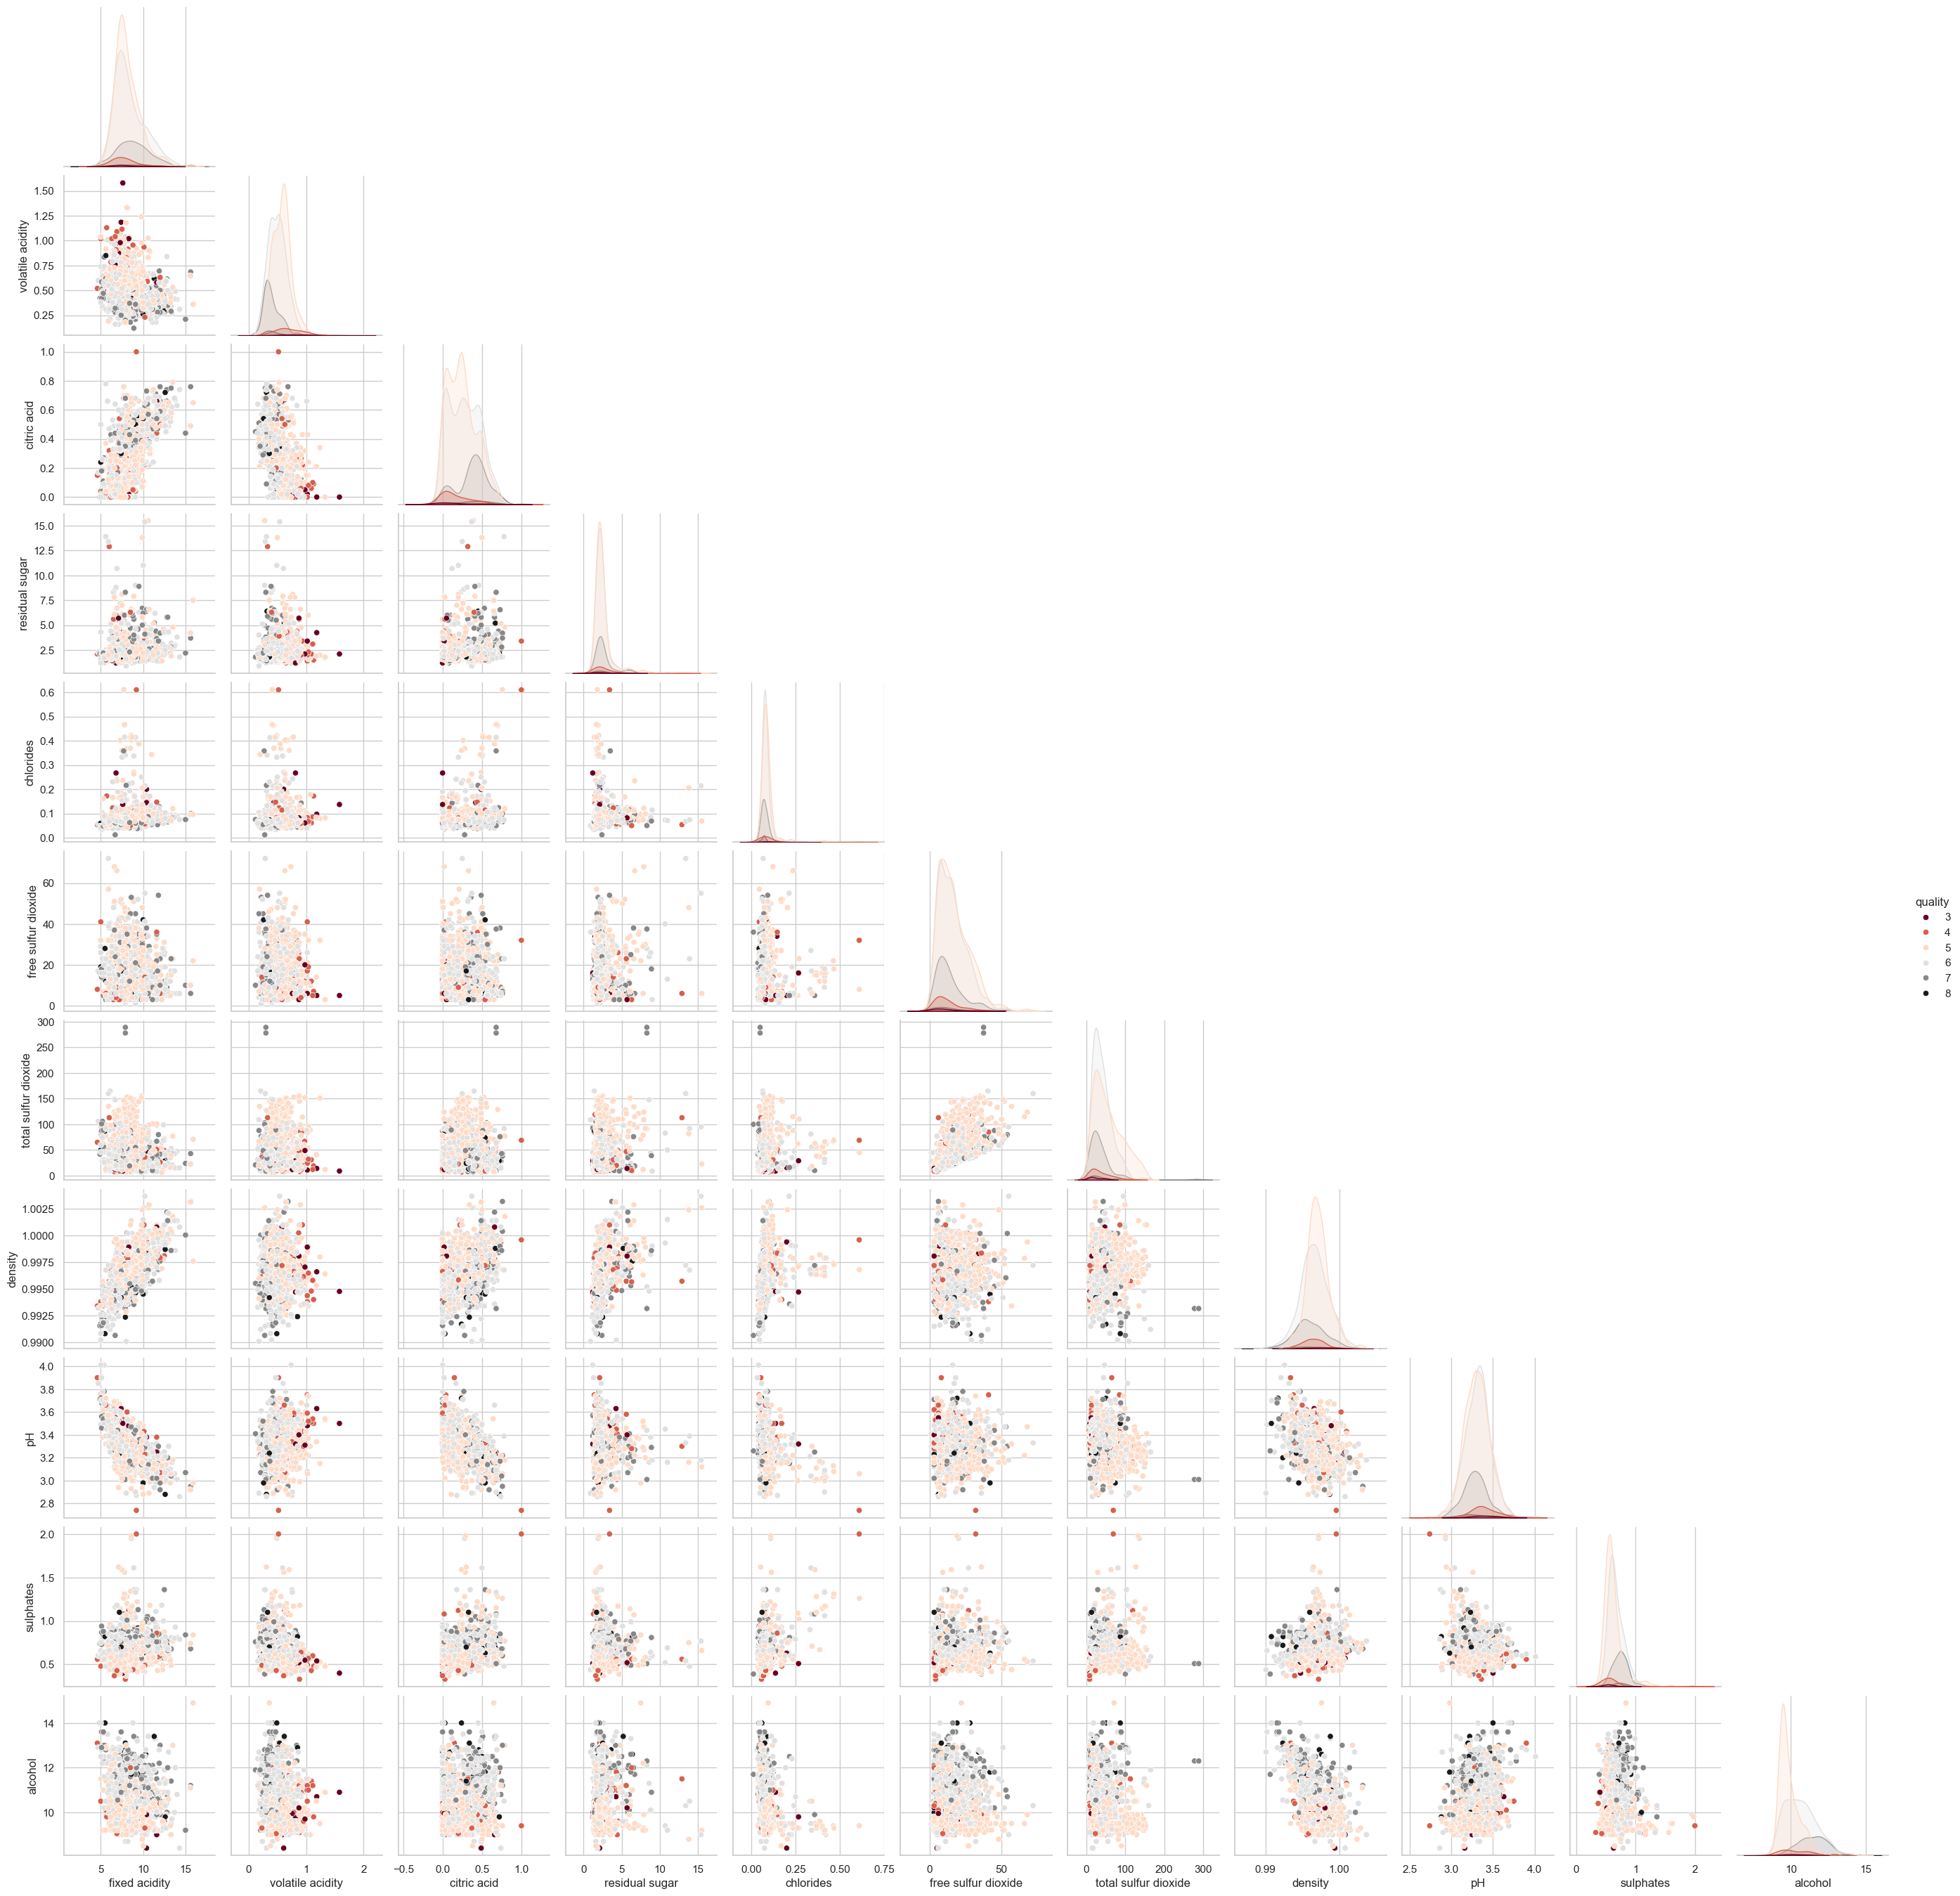

In [15]:
sns.pairplot(data=df, diag_kind='kde', hue='quality', palette='RdGy', corner=True)

plt.show()

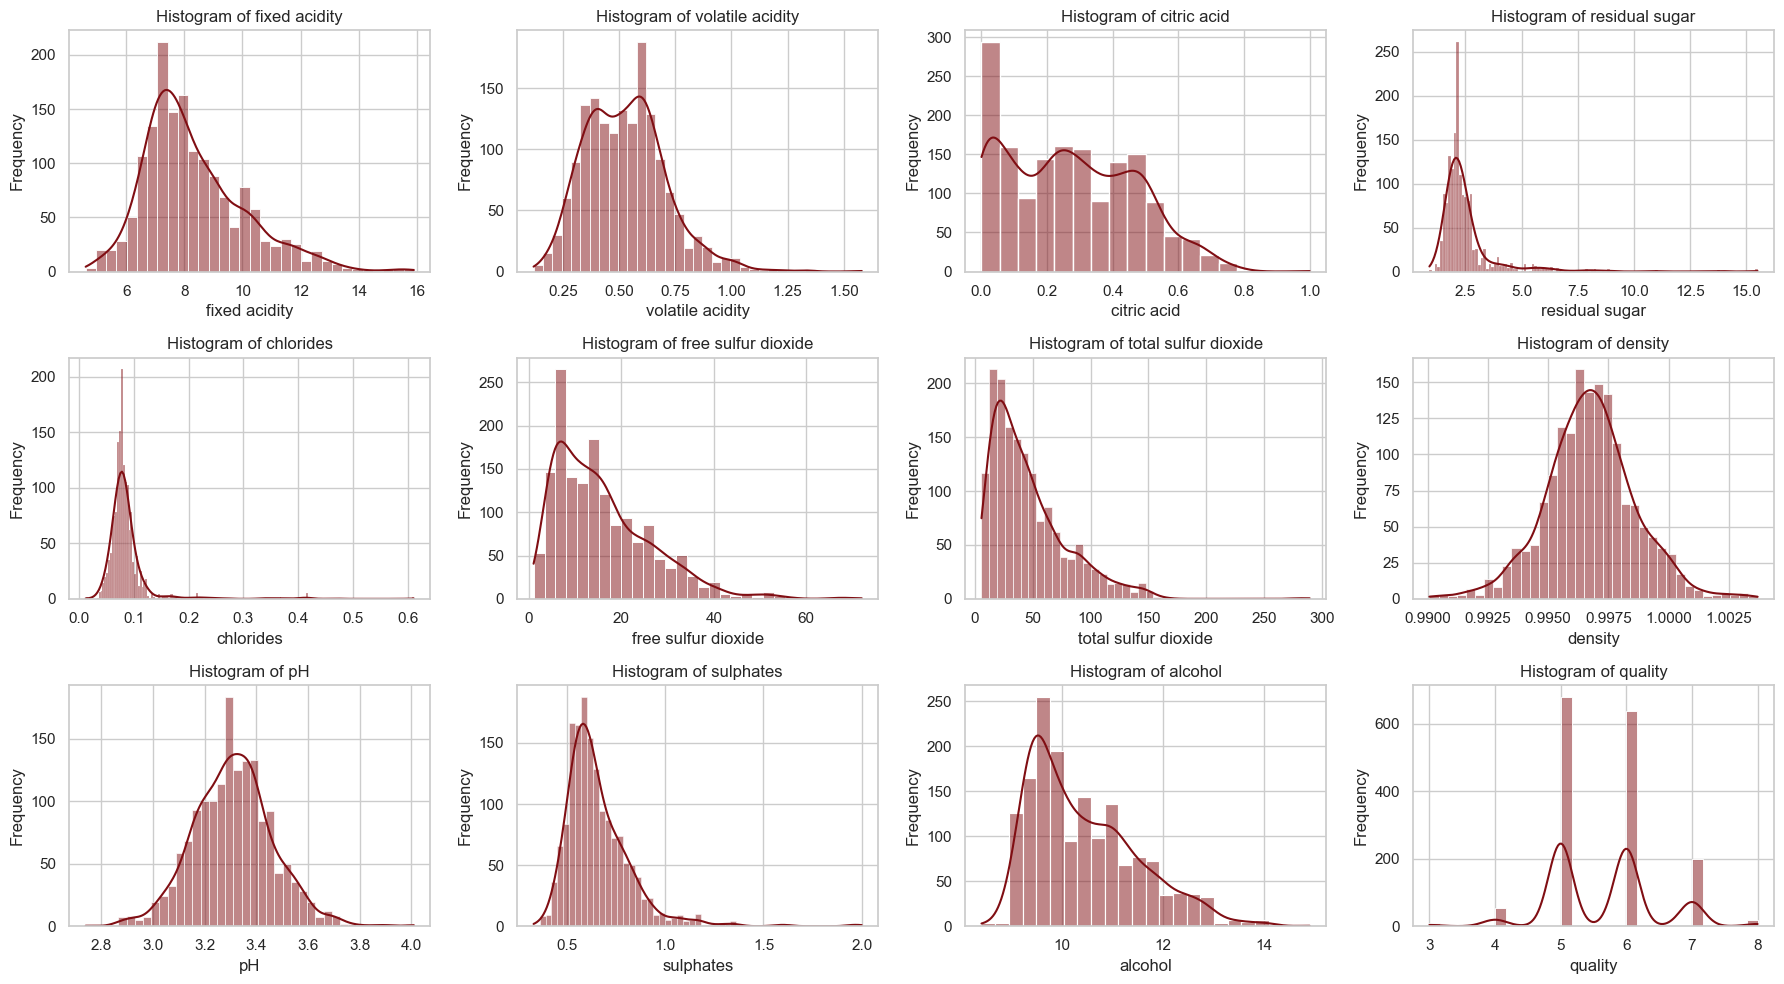

In [16]:
ff = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
      'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
      'pH', 'sulphates', 'alcohol', 'quality']

fig, axes = plt.subplots(3, 4, figsize=(18,10))

for i, column in enumerate(ff):

    ax = axes[i //4, i % 4]

    sns.histplot(df[column], kde=True, color='#800E13', ax=ax, palette='RdGy')

    ax.set_title(f'Histogram of {column}')

    ax.set_xlabel(column)

    ax.set_ylabel('Frequency')

plt.tight_layout()

plt.show()

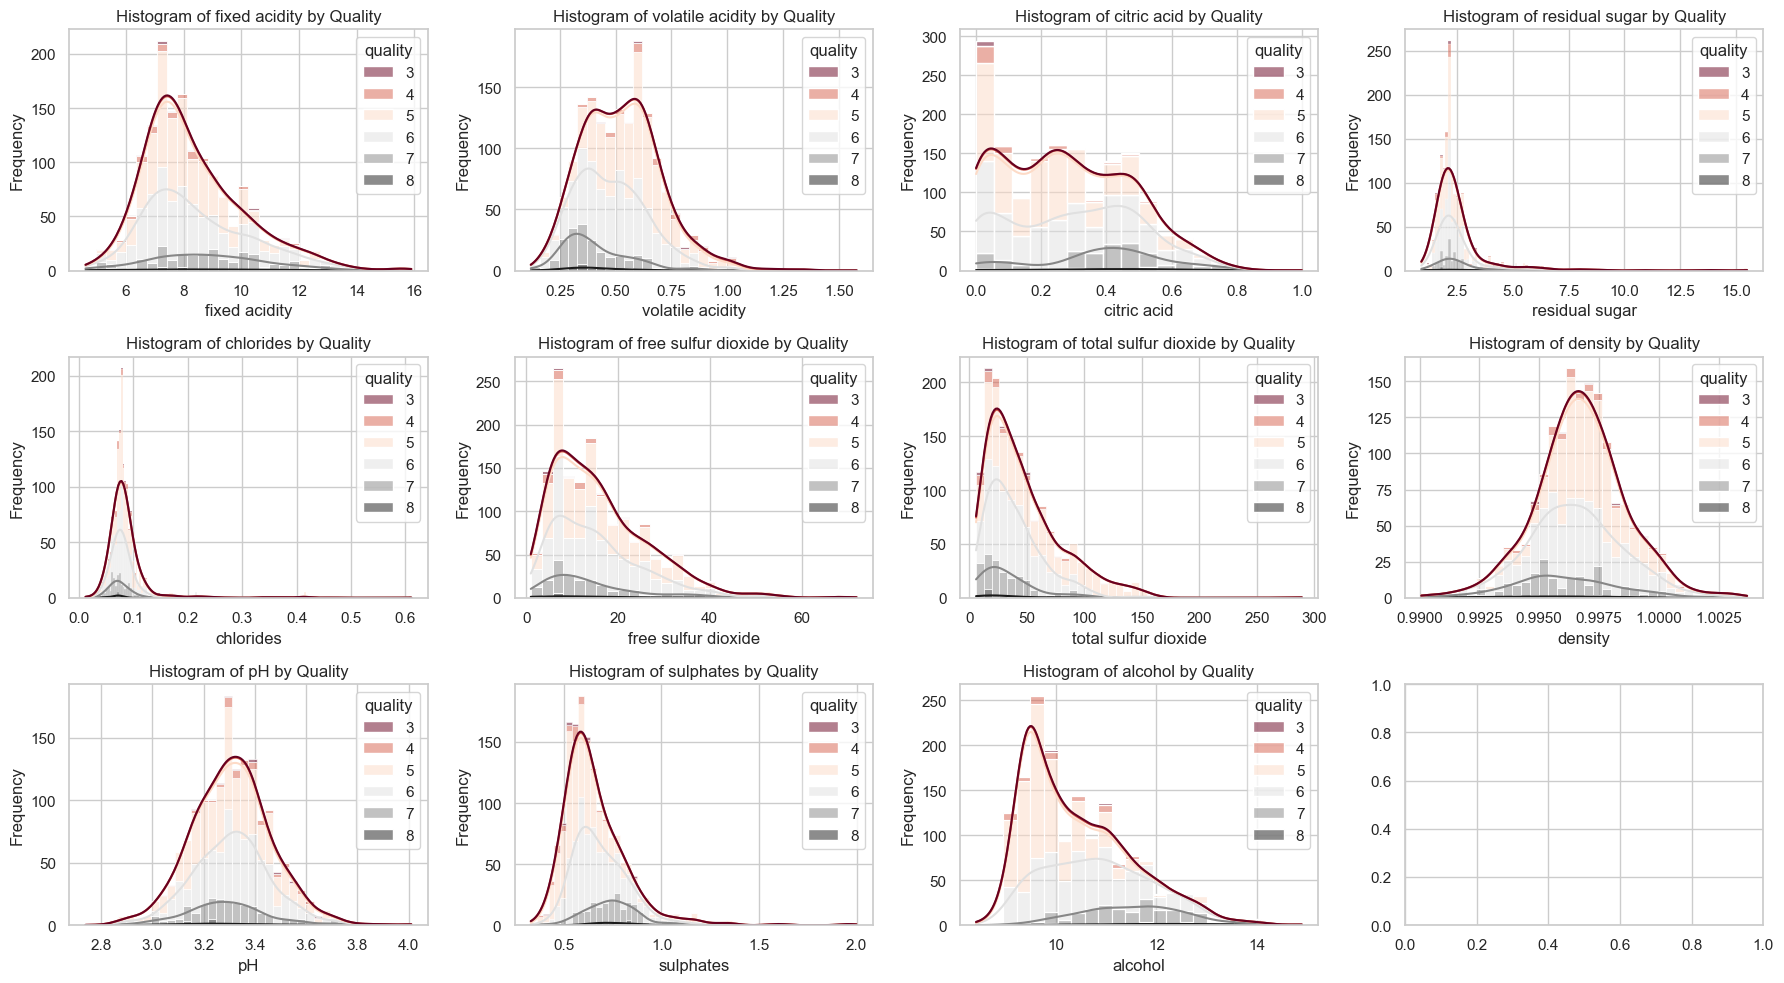

In [17]:
fig, axes = plt.subplots(3, 4, figsize=(18,10))

for i, column in enumerate(ff[:-1]):

    ax = axes[i // 4, i % 4]

    sns.histplot(data=df, x=column, hue='quality', kde=True, ax=ax, palette='RdGy', multiple="stack")

    ax.set_title(f'Histogram of {column} by Quality')

    ax.set_xlabel(column)

    ax.set_ylabel('Frequency')

plt.tight_layout()

plt.show()

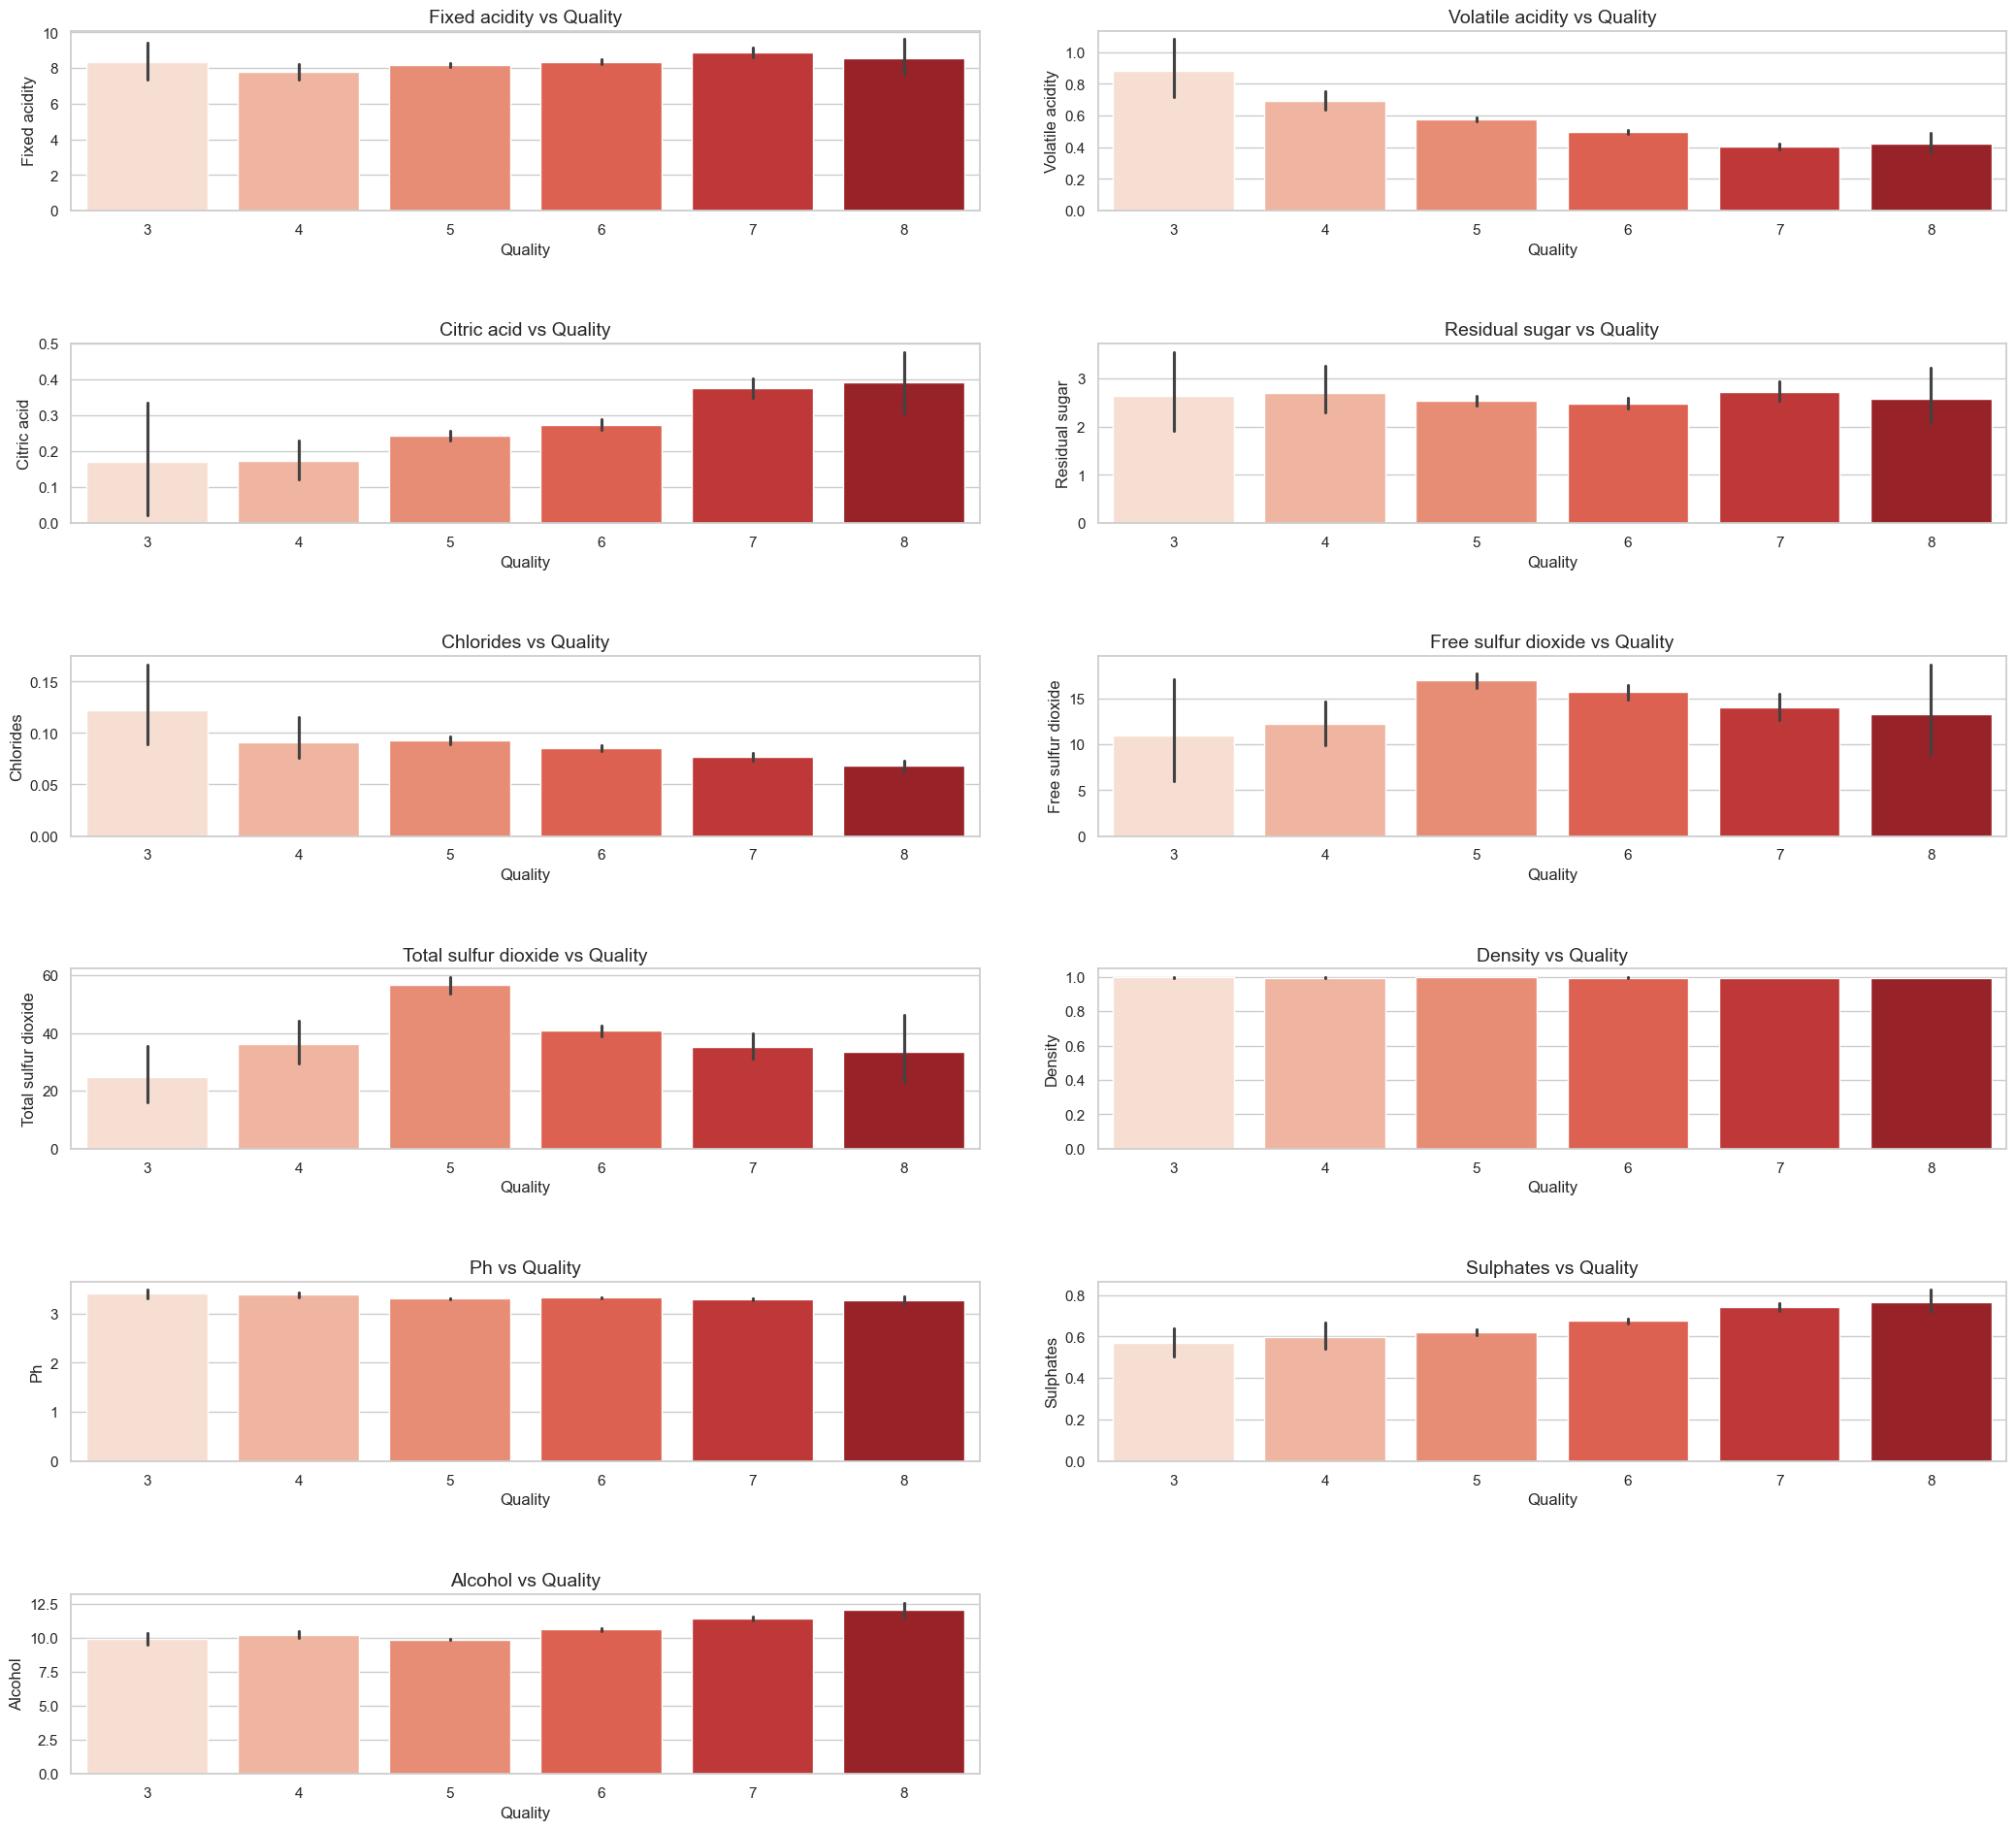

In [18]:
plt.figure(figsize=(22,20))


columns = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
           'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
           'pH', 'sulphates', 'alcohol']

for i in range(1,12):

    plt.subplot(6, 2, i)

    sns.barplot(x='quality', y=columns[i-1], data=data, palette='Reds')

    plt.title(f'{columns[i-1].capitalize()} vs Quality', fontsize=14)

    plt.xlabel('Quality', fontsize=12)

    plt.ylabel(columns[i-1].capitalize(), fontsize=12)


plt.tight_layout(pad=4.0)

plt.show()

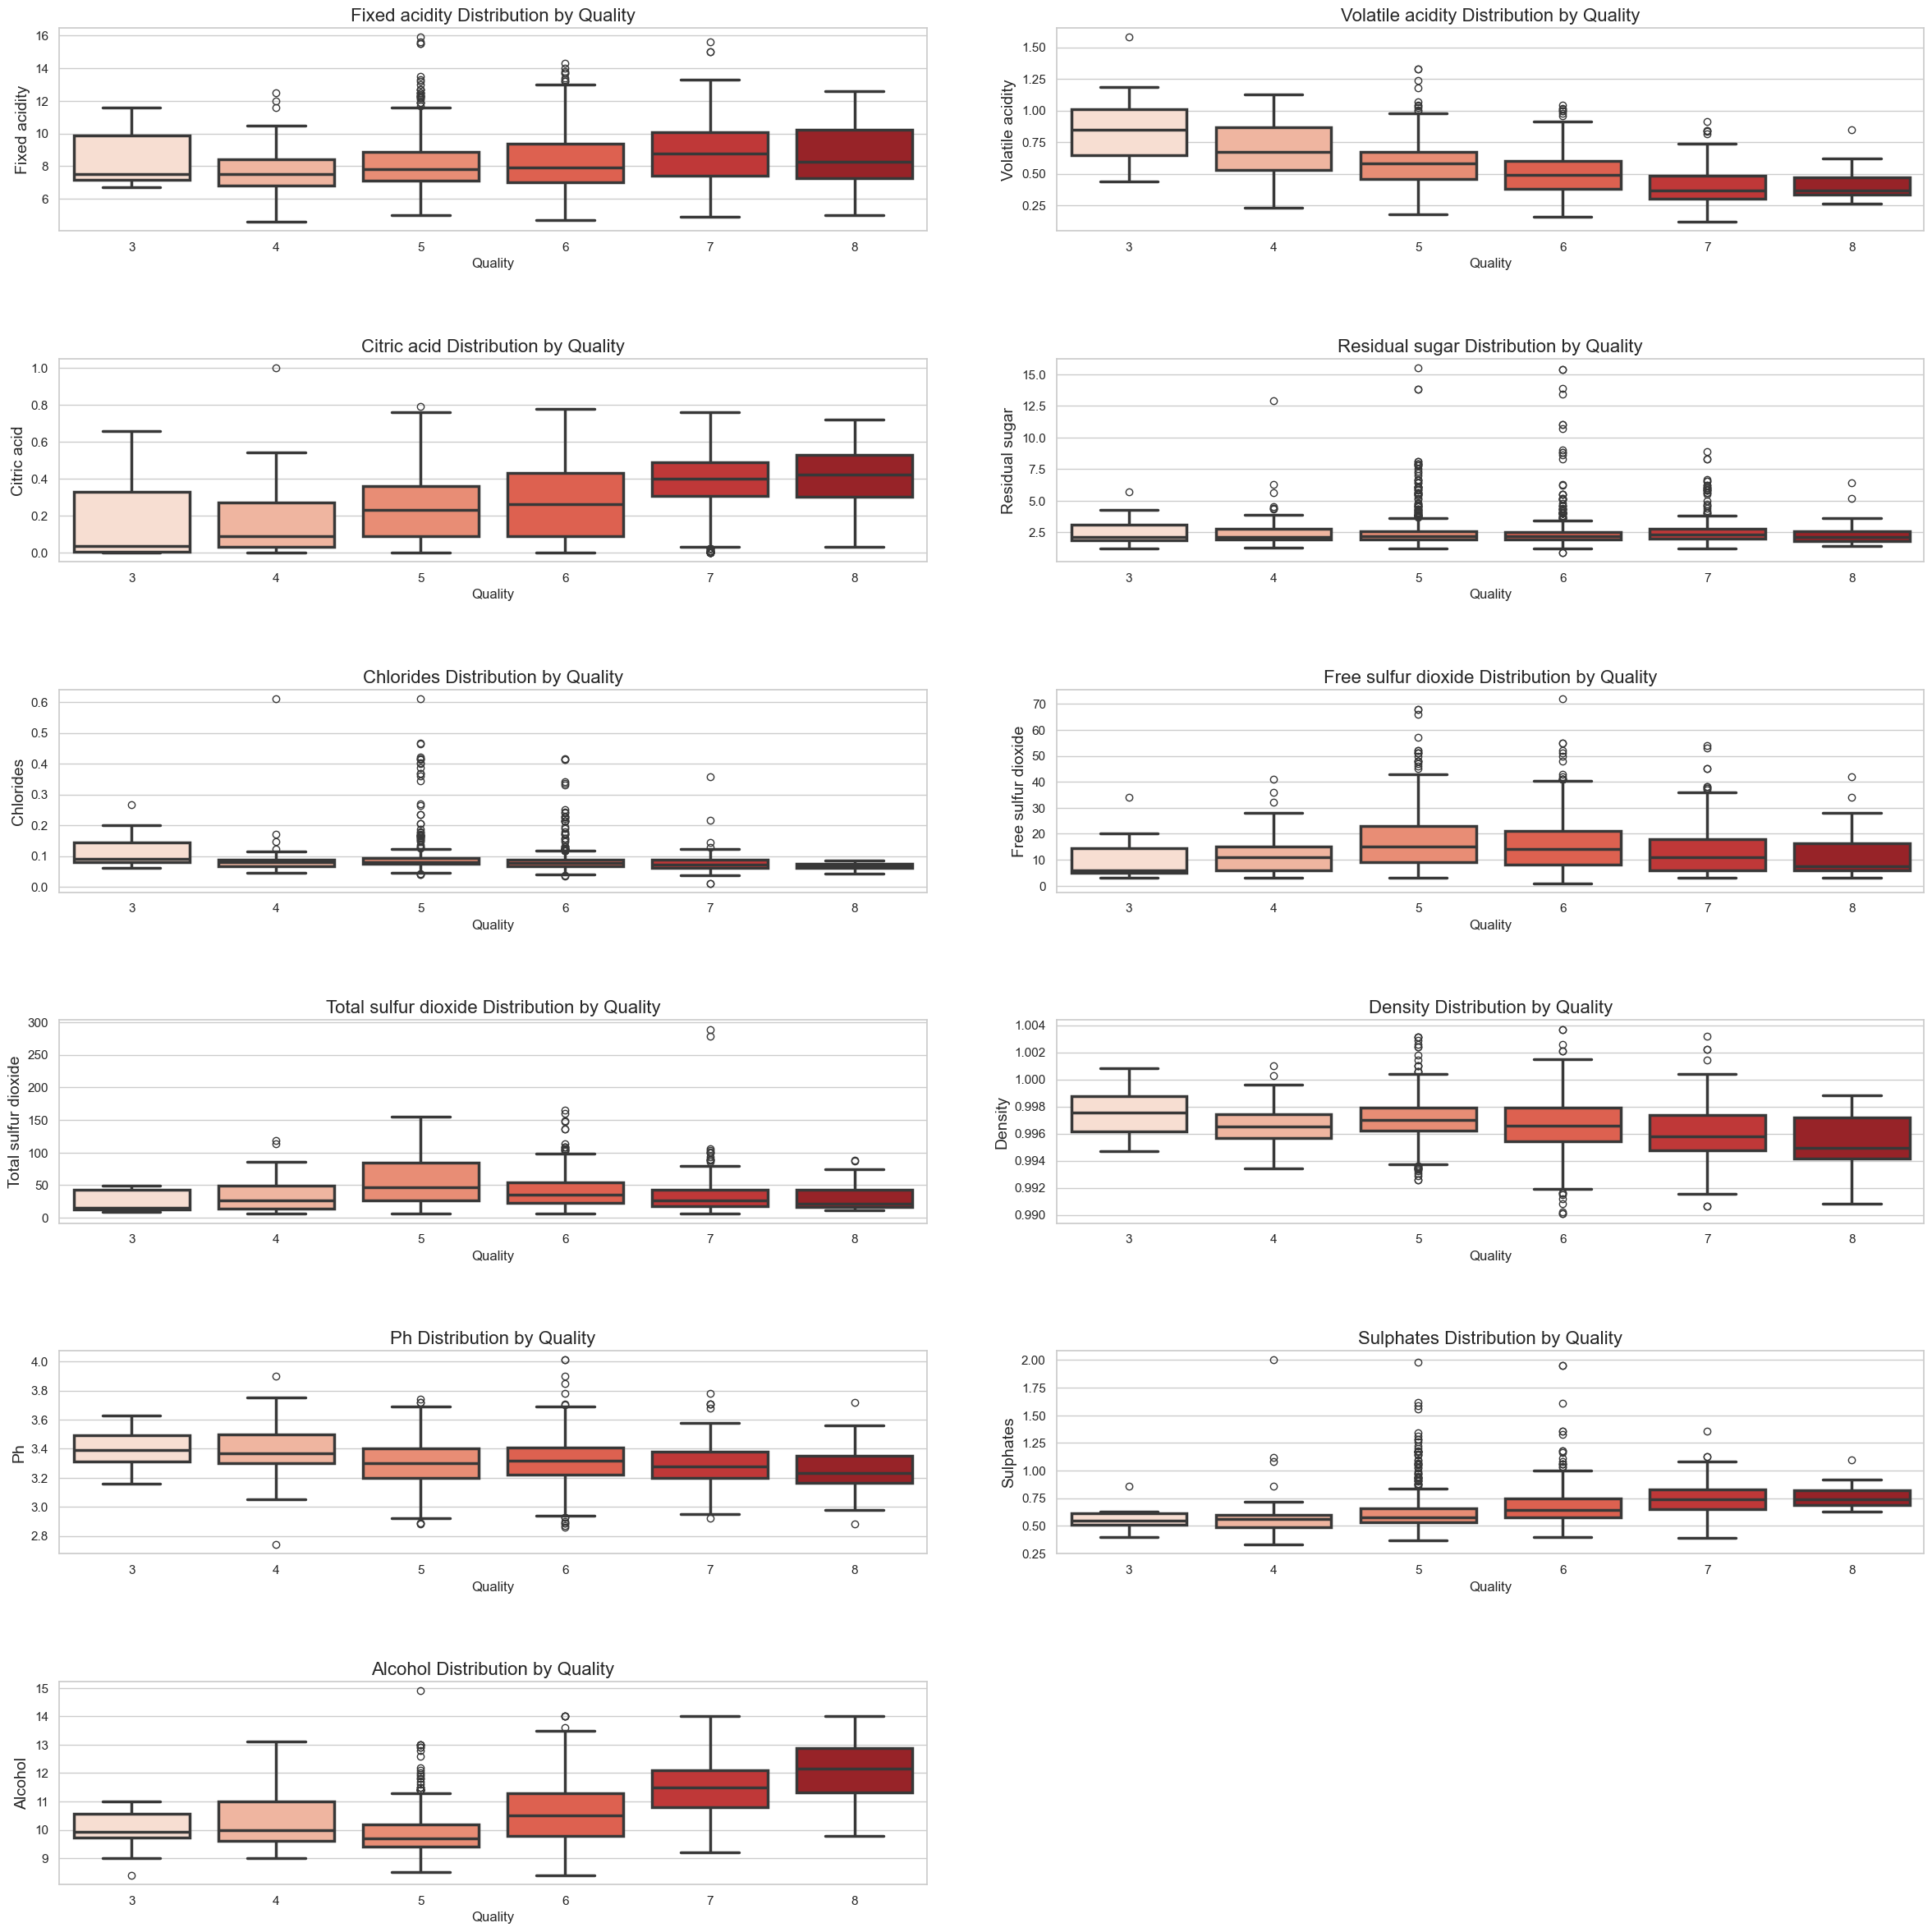

In [19]:
plt.figure(figsize=(25,25))


columns = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
           'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
           'pH', 'sulphates', 'alcohol']

for i in range(1, 12):

    plt.subplot(6, 2, i)

    sns.boxplot(x='quality', y=columns[i-1], data=data, palette='Reds', linewidth=2.5, fliersize=6)

    plt.title(f'{columns[i-1].capitalize()} Distribution by Quality', fontsize=16)

    plt.xlabel('Quality', fontsize=12)

    plt.ylabel(columns[i-1].capitalize(), fontsize=14)


plt.tight_layout(pad=5.0)

plt.show()

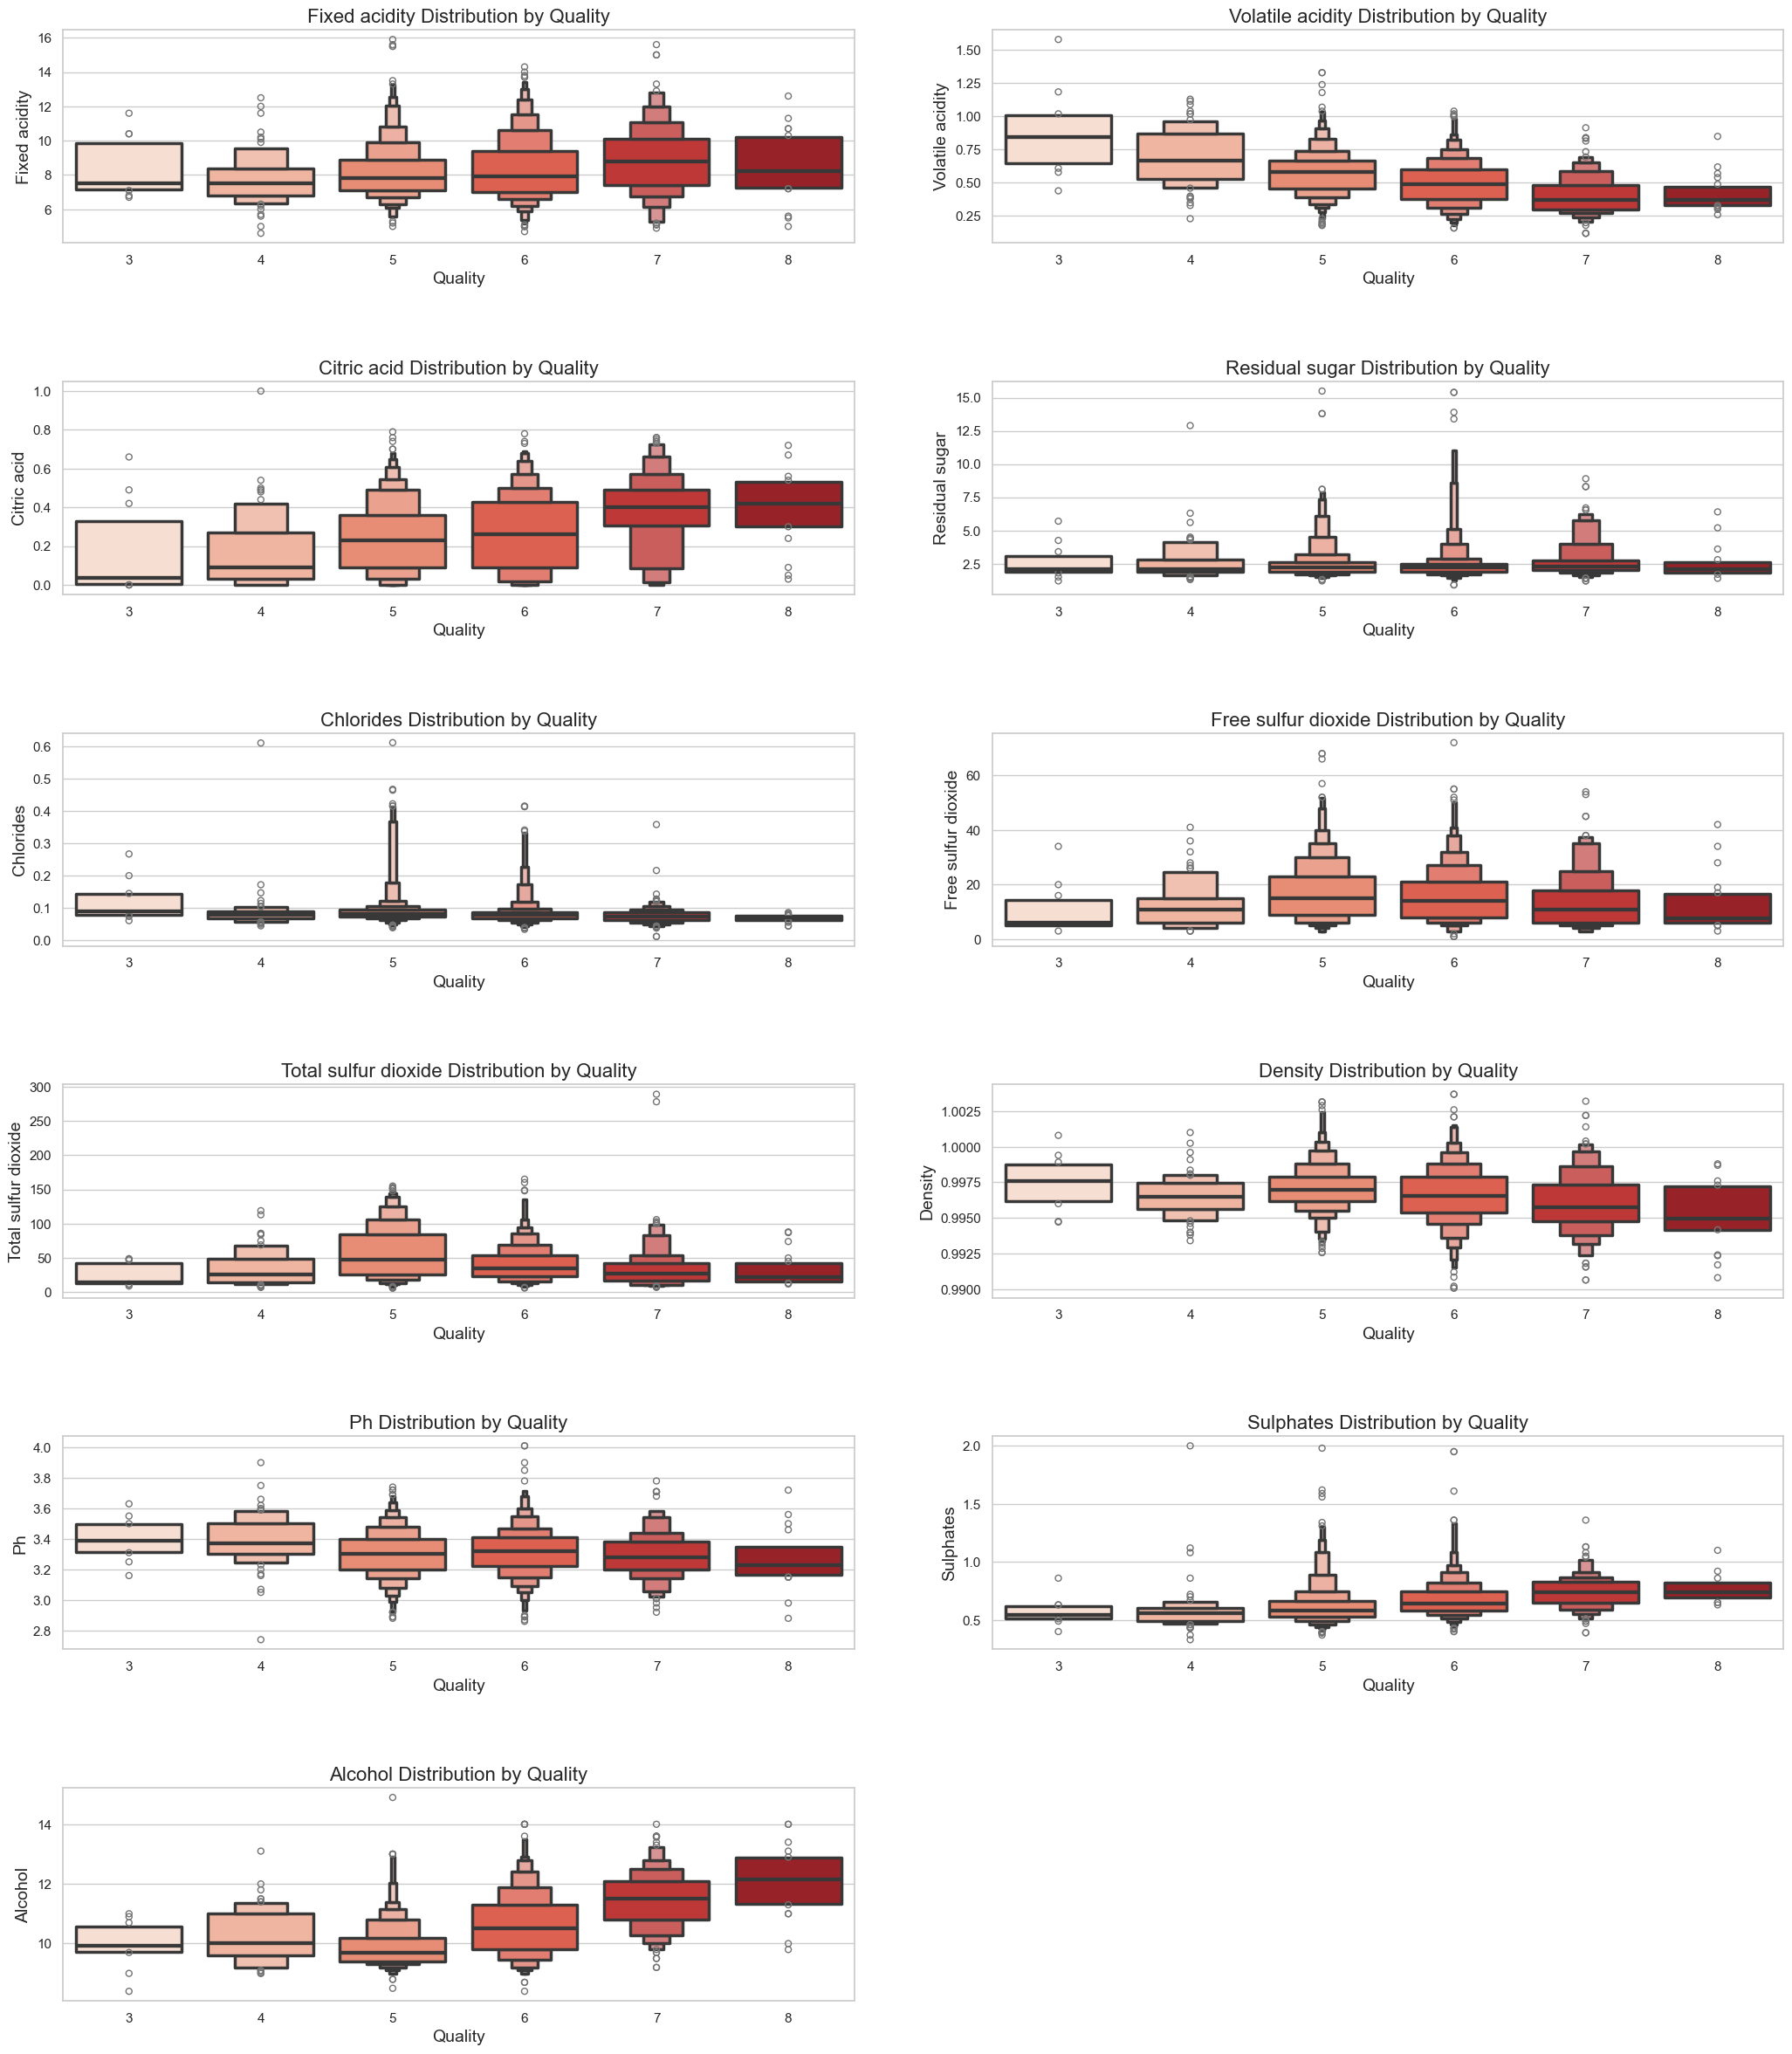

In [20]:
plt.figure(figsize=(22,25))

columns = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 
           'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
           'pH', 'sulphates', 'alcohol']

for i in range(1, 12):

    plt.subplot(6, 2, i)

    sns.boxenplot(x='quality', y=columns[i-1], data=data, palette='Reds', linewidth=2.5)

    plt.title(f'{columns[i-1].capitalize()} Distribution by Quality', fontsize=16)

    plt.xlabel('Quality', fontsize=14)

    plt.ylabel(columns[i-1].capitalize(), fontsize=14)



plt.tight_layout(pad=5.0)

plt.show()

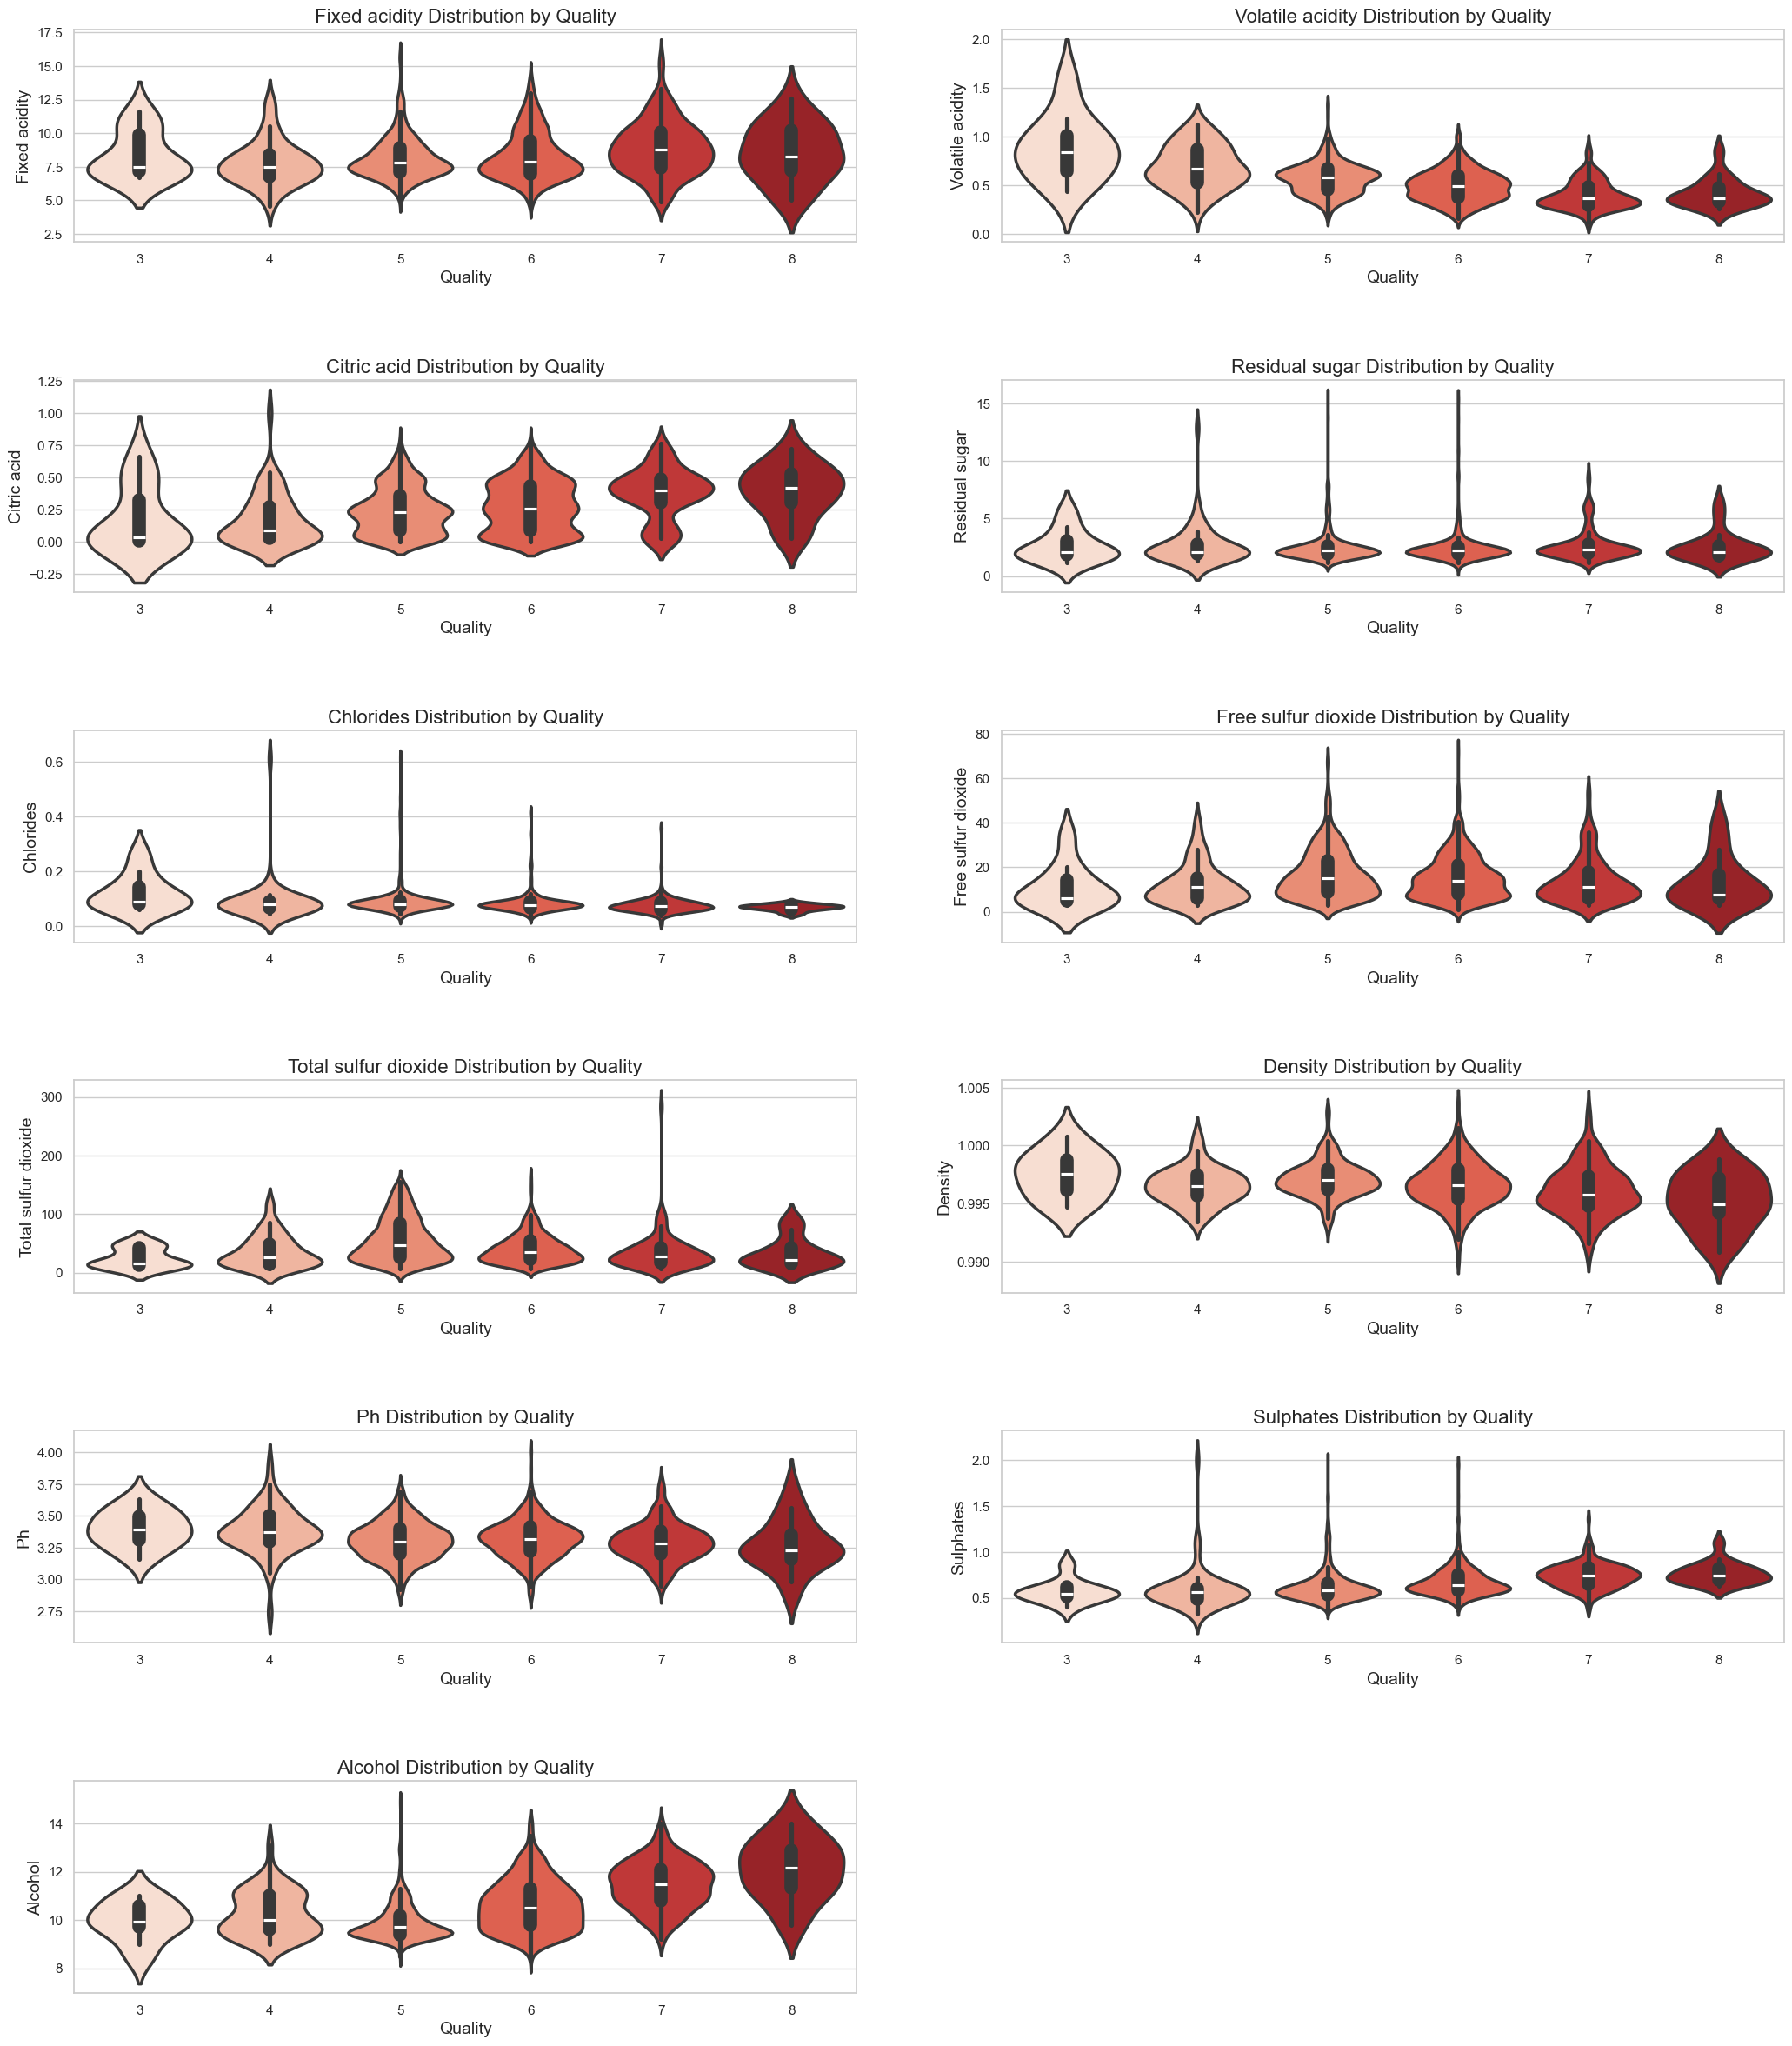

In [21]:
plt.figure(figsize=(22,25))

columns = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 
           'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
           'pH', 'sulphates', 'alcohol']

for i in range(1, 12):

    plt.subplot(6, 2, i)

    sns.violinplot(x='quality', y=columns[i-1], data=data, palette='Reds', linewidth=2.5)

    plt.title(f'{columns[i-1].capitalize()} Distribution by Quality', fontsize=16)

    plt.xlabel('Quality', fontsize=14)

    plt.ylabel(columns[i-1].capitalize(), fontsize=14)


plt.tight_layout(pad=5.0)

plt.show()

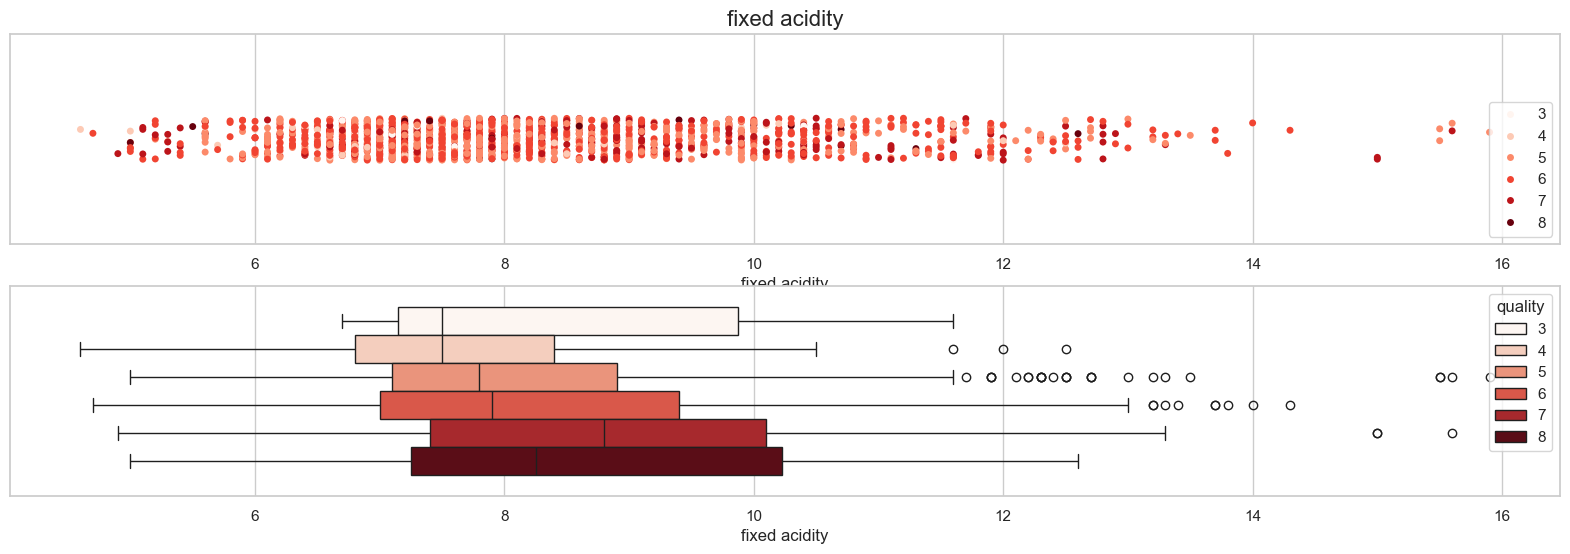

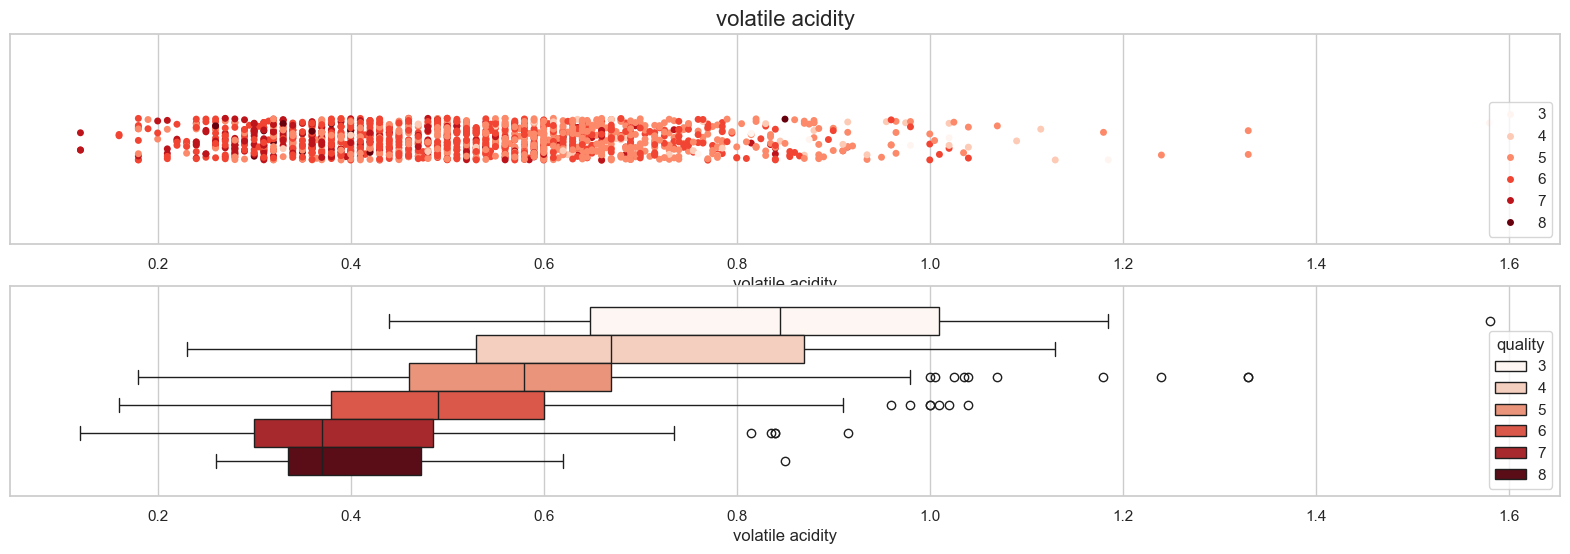

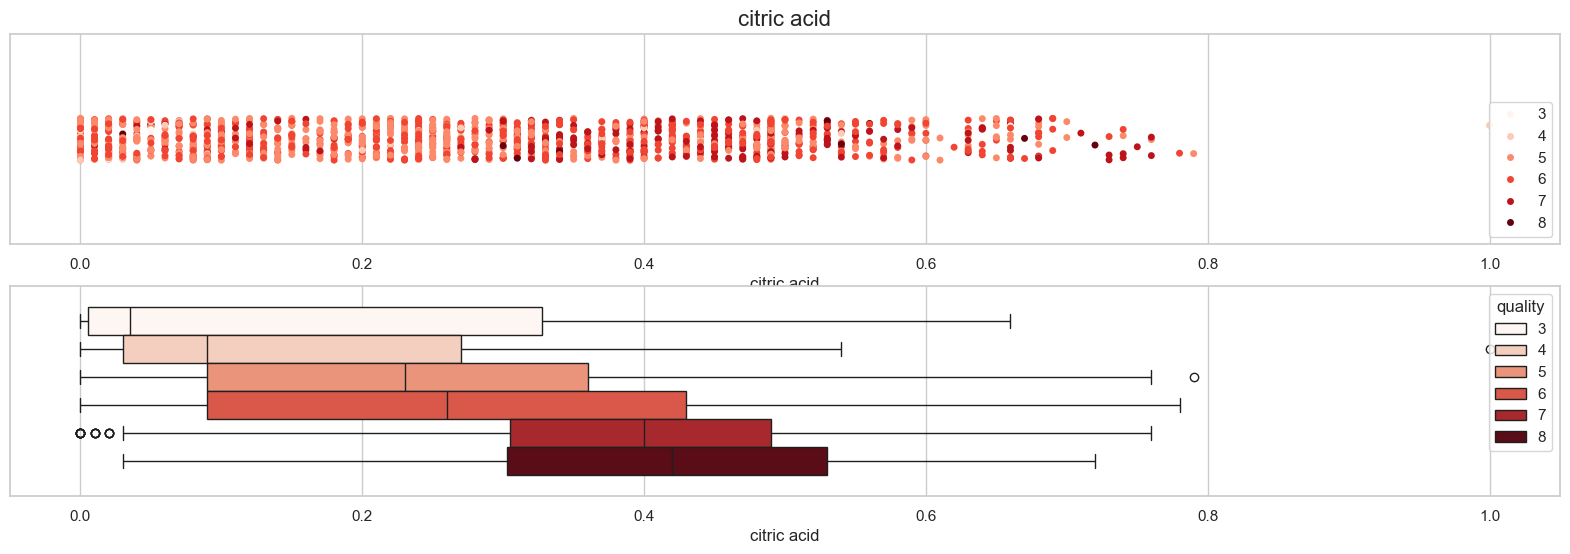

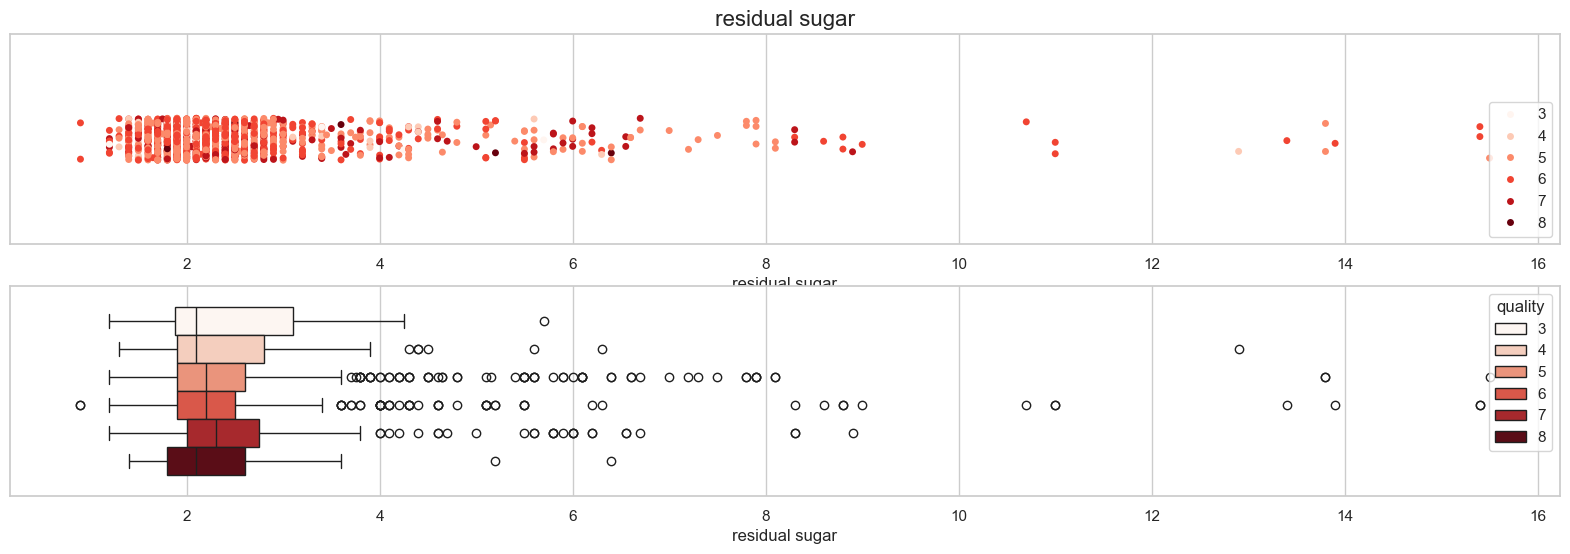

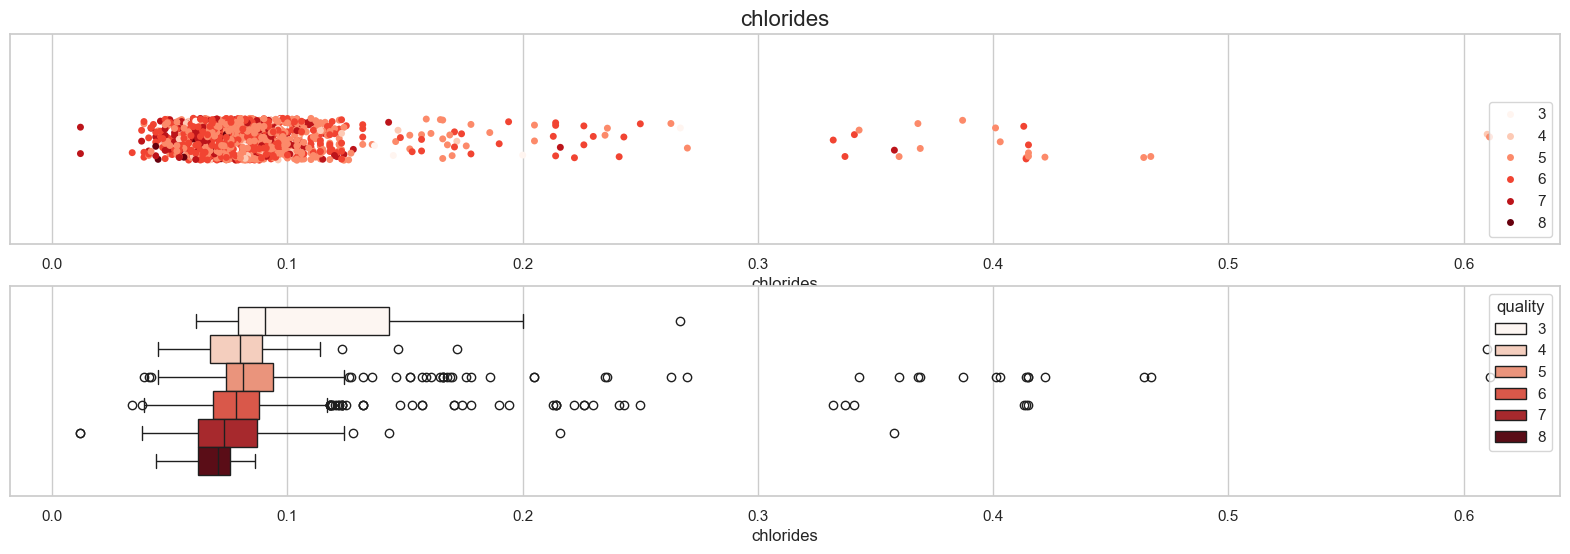

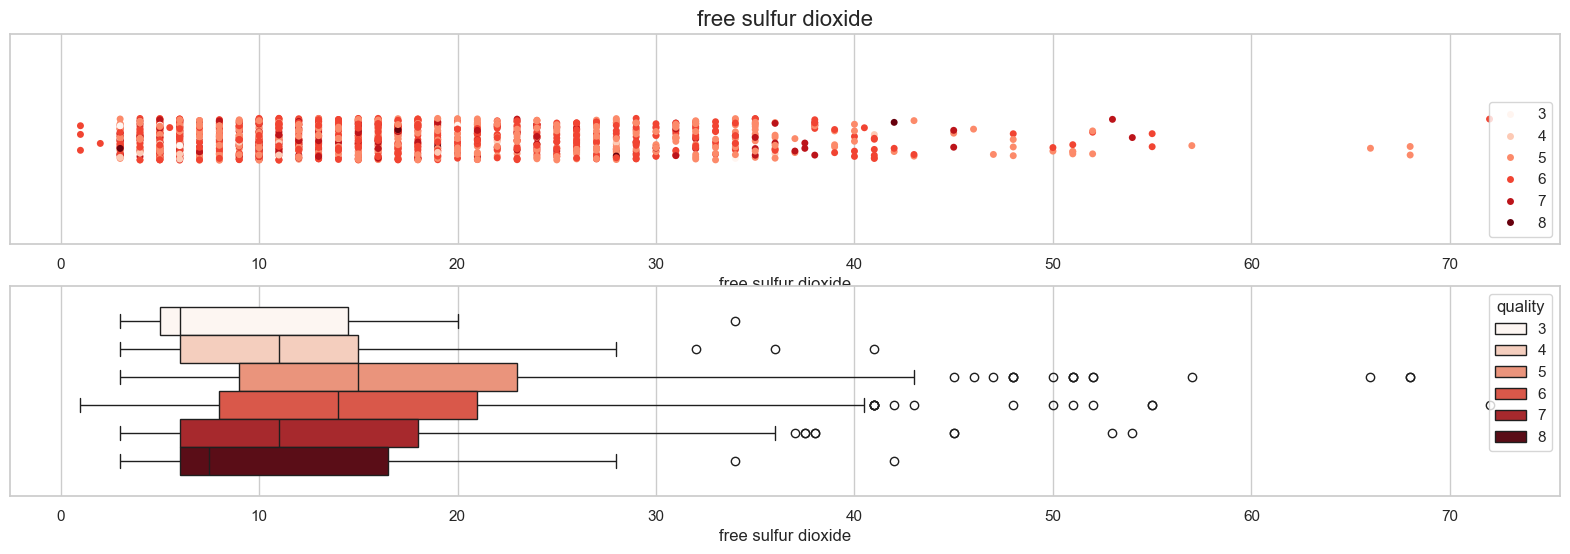

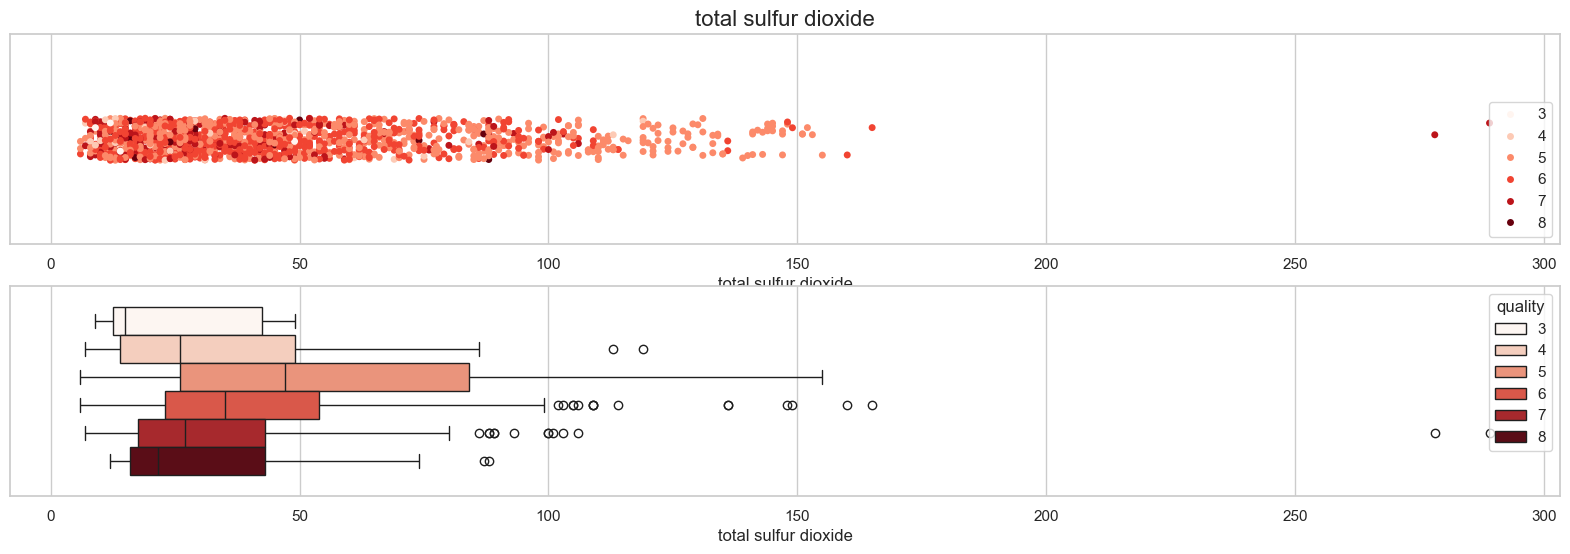

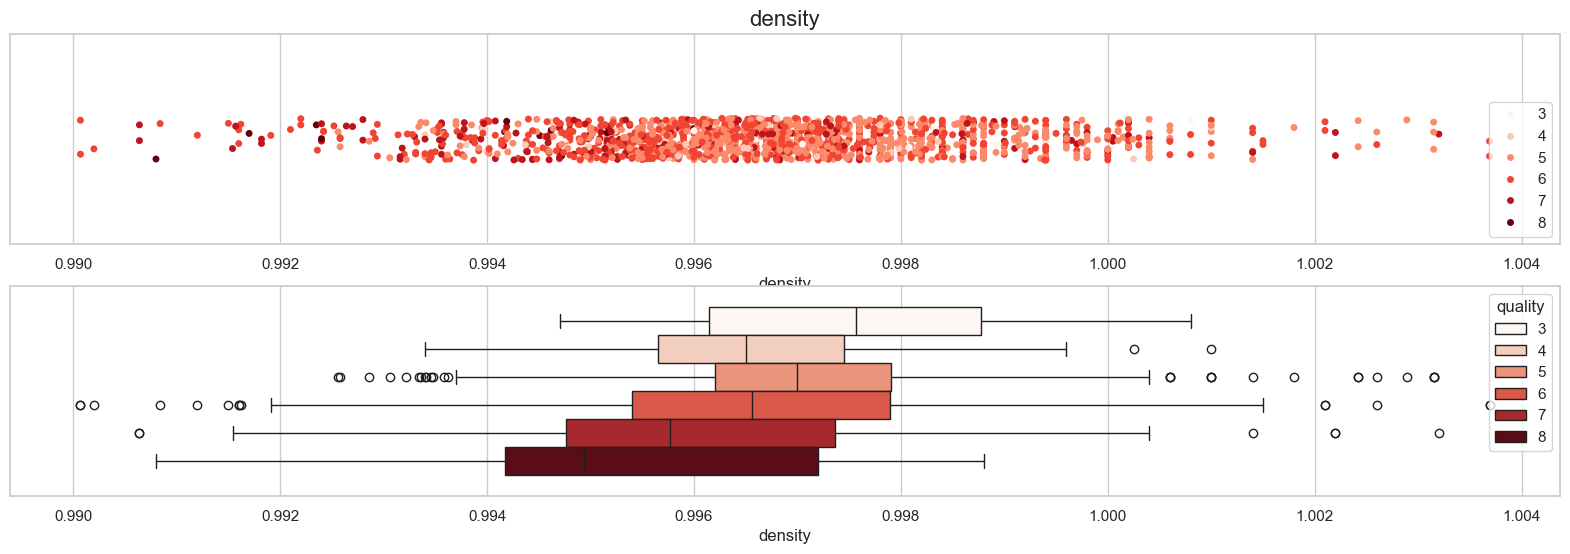

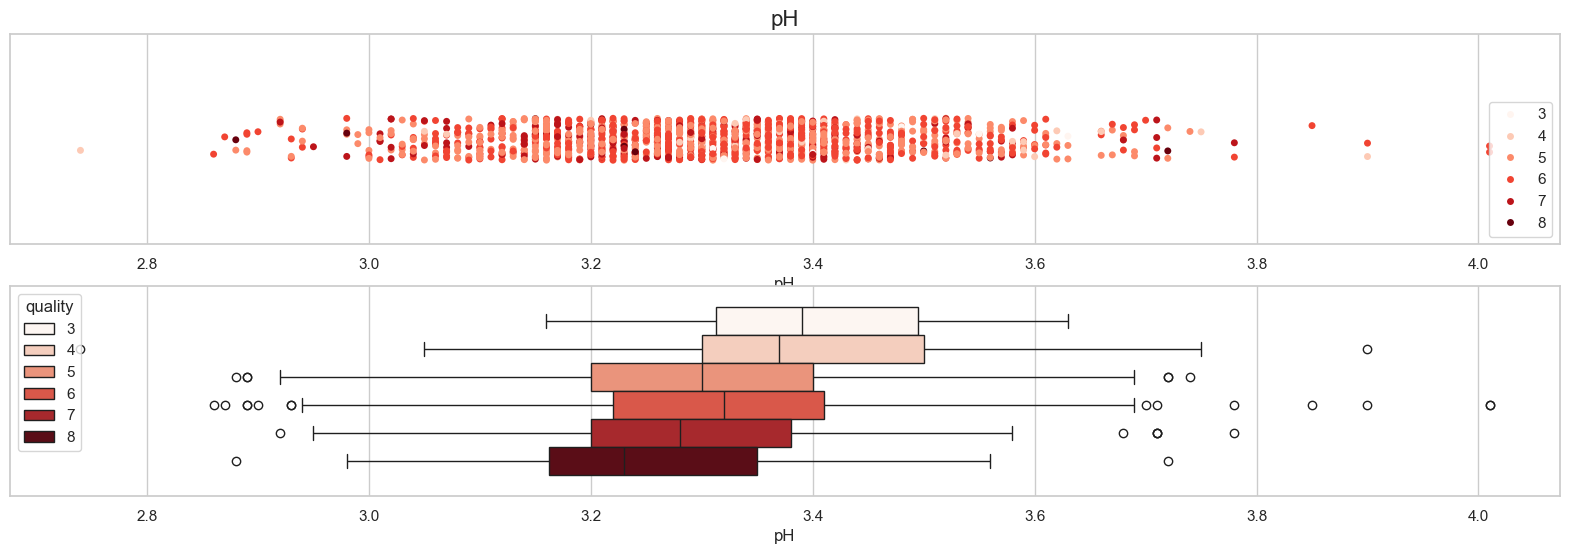

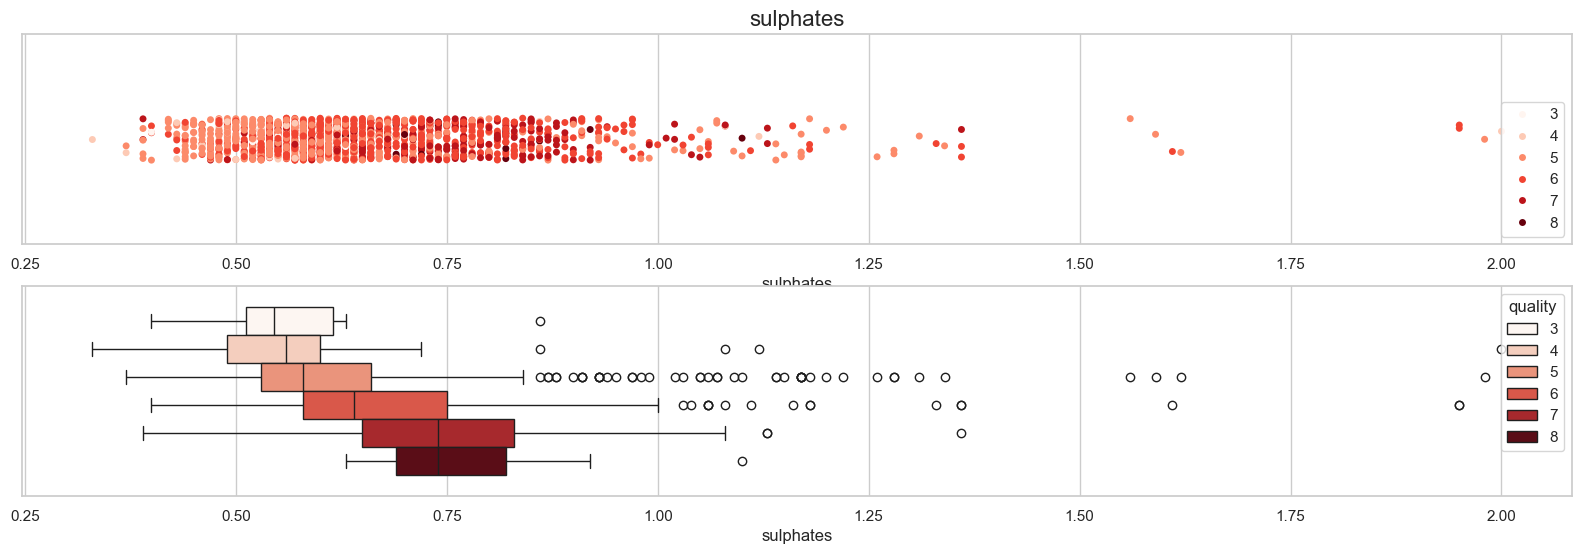

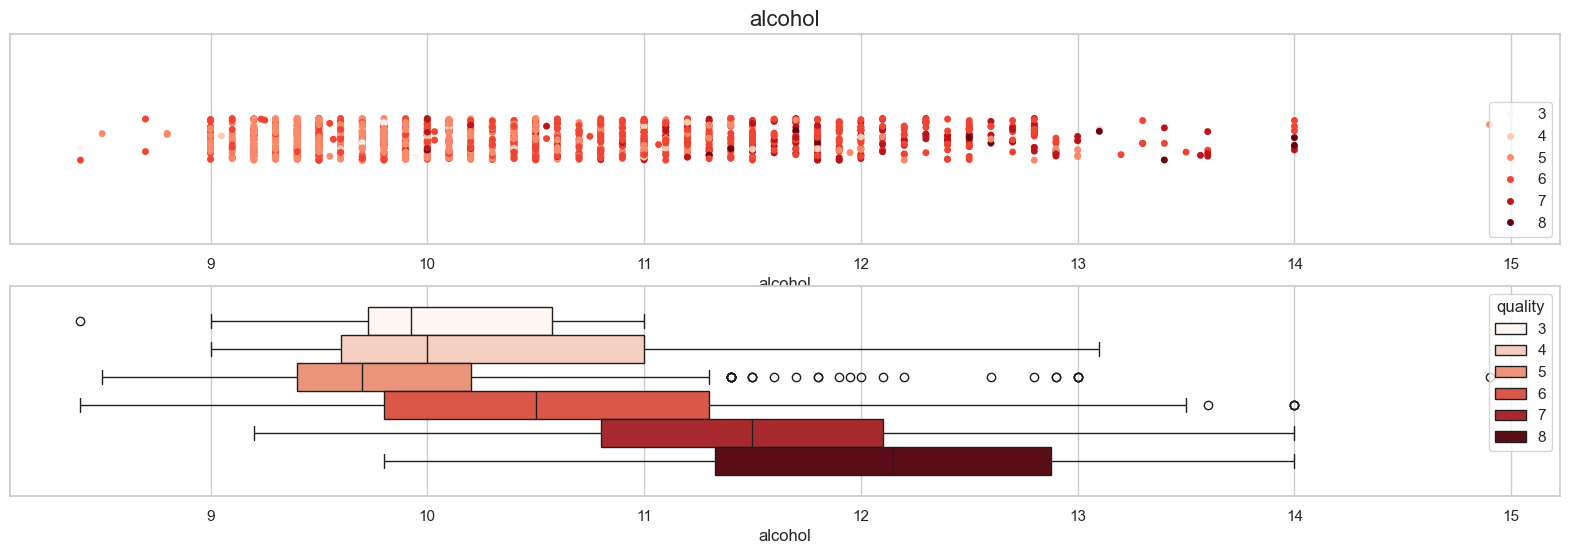

In [22]:
features = [

    'fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',

    'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',

    'pH', 'sulphates', 'alcohol']

for feature in features:

    fig, axes = plt.subplots(2, 1, figsize=(20, 6))

    sns.stripplot(data=df, x=feature, palette='Reds', hue='quality', orient='h', ax=axes[0])

    axes[0].set_title(feature, fontsize=16)

    axes[0].legend(loc=4)

    sns.boxplot(data=df, x=feature, palette='Reds', hue='quality', orient='h', ax=axes[1])

    plt.show()

In [23]:
data = data.replace({'quality' : {

                                    8 : 'Good',

                                    7 : 'Good',

                                    6 : 'Middle',

                                    5 : 'Middle',

                                    4 : 'Bad',

                                    3 : 'Bad',}})

In [24]:
data['quality'].value_counts()

quality
Middle    1319
Good       217
Bad         63
Name: count, dtype: int64

In [25]:
data.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol quality  
0      9.4  Middle  
1      9.8  Middle  
2      9.8  Middle  
3      9.8  Middle  
4      9.4  Middle

In [26]:
labelencoder_y = LabelEncoder()

data['quality'] = labelencoder_y.fit_transform(data['quality'])

In [27]:
train_columns = data.columns[:-1]

train_columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol'],
      dtype='object')

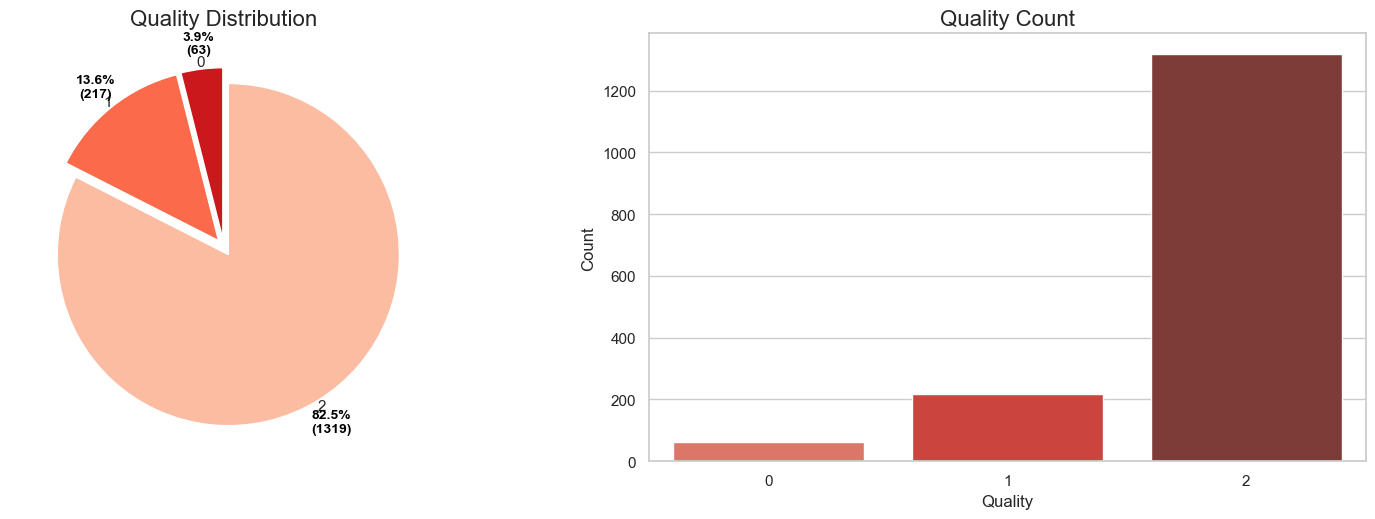

In [28]:
# Function to place labels outside the pie chart

def autopct_outside(pct, values):

    total = sum(values)

    val = int(round(pct * total / 100.0))

    return f'{pct:.1f}%\n({val})'


plt.figure(figsize=(16, 6))


# First Plot - Pie Chart

plt.subplot(1, 2, 1)

quality_counts = data['quality'].value_counts().sort_index()

explode = [0.05] * len(quality_counts)  # Slight separation for all slices

wedges, texts, autotexts = plt.pie(

    quality_counts,

    labels=quality_counts.index,

    colors=sns.color_palette('Reds_r', len(quality_counts)),

    autopct=lambda pct: autopct_outside(pct, quality_counts),

    startangle=90,

    explode=explode,

    pctdistance=1.15,   # Adjusts position of the percentage labels

    labeldistance=1.04   # Adjusts position of the labels

)



# Adjust Label Positions

for text in texts:

    text.set_horizontalalignment('center')

for autotext in autotexts:

    autotext.set_color('black')

    autotext.set_fontsize(10)

    autotext.set_weight('bold')


plt.title('Quality Distribution', fontsize=16)



# Second Plot - Count Plot

plt.subplot(1, 2, 2)

sns.countplot(

    data=data,

    x='quality',

    palette='Reds_d'

)

plt.title('Quality Count', fontsize=16)

plt.xlabel('Quality', fontsize=12)

plt.ylabel('Count', fontsize=12)


# General Layout Improvements

plt.tight_layout(pad=3.0)

plt.show()

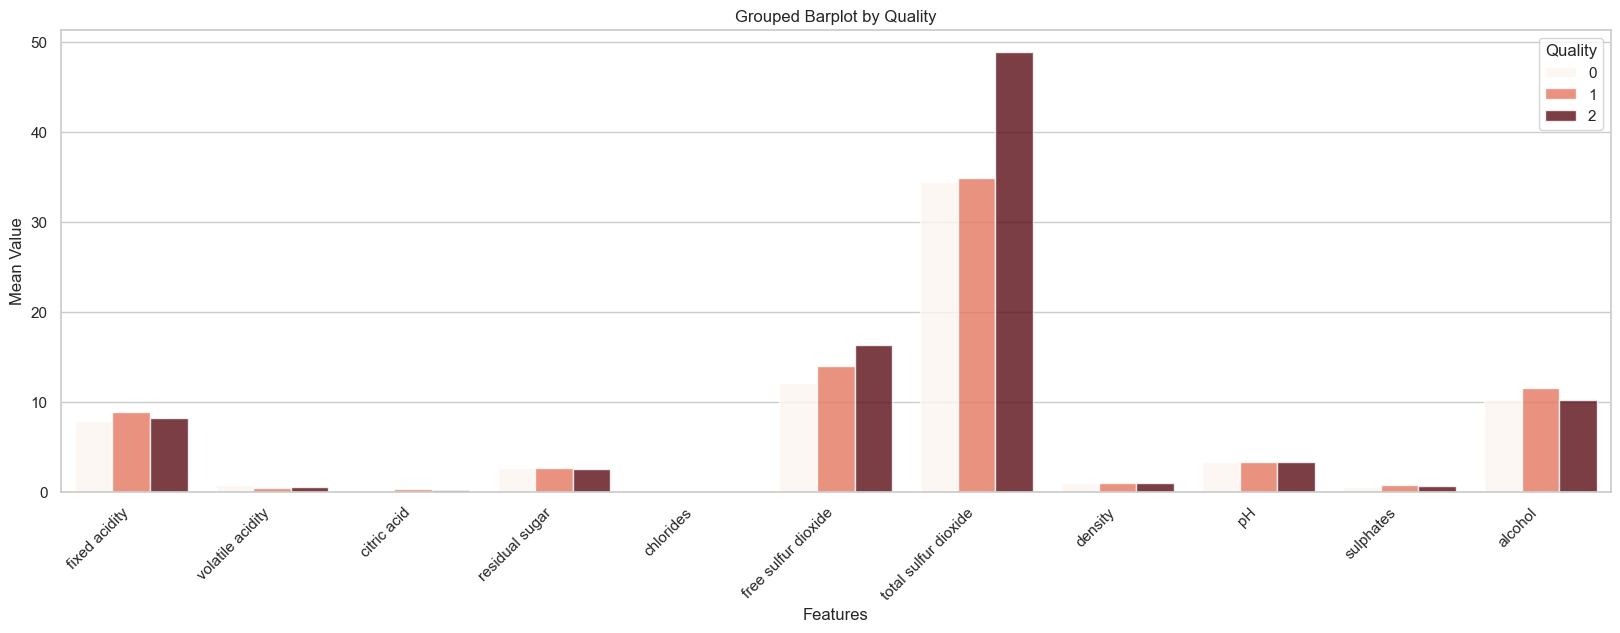

In [29]:
gm = data.groupby('quality').mean()

plt.figure(figsize=(20, 6))

sns.barplot(data=gm.reset_index().melt(id_vars='quality'),

            x='variable', y='value', hue='quality', palette='Reds', alpha=0.8)

plt.xlabel('Features')

plt.ylabel('Mean Value')

plt.title('Grouped Barplot by Quality')

plt.xticks(rotation=45, ha='right')

plt.legend(title='Quality')

plt.show()

In [30]:
X = data.drop('quality', axis = 1).values

y = data['quality']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0, stratify = y)

print("Shape of X_train: ", X_train.shape)

print("Shape of X_test: ", X_test.shape)

print("Shape of y_train: ", y_train.shape)

print("Shape of y_test: ", y_test.shape)

Shape of X_train:  (1279, 11)
Shape of X_test:  (320, 11)
Shape of y_train:  (1279,)
Shape of y_test:  (320,)


In [31]:
sc = StandardScaler()

X_train = sc.fit_transform(X_train)

X_test = sc.transform(X_test)

y_train = y_train.ravel()

y_test = y_test.ravel()

In [32]:
# Initialize lists to store algorithm names, accuracies, and model details

al = []

accuracy = []

models = []


# Function to evaluate the performance of a model

def evaluate_model(algorithm_name, model): 

    # Train the model and make predictions

    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    y_pred_prob = model.predict_proba(X_test)



    # Calculate accuracy scores

    acc_model = model.score(X_test, y_test)

    train_acc_model = model.score(X_train, y_train)


    # Store the algorithm name and accuracy

    al.append(algorithm_name)

    accuracy.append(acc_model)


    # Print performance metrics

    print('\033[31m' + f'For {algorithm_name}' + '\033[0m\n')  # Red color for algorithm name

    print(f'Training Accuracy: {train_acc_model * 100:.4f} %\n')

    print(f'Testing Accuracy: {acc_model * 100:.4f} %\n')

    print(f'Accuracy Score: {accuracy_score(y_test, y_pred) * 100:.4f} %\n')



    # Create subplots for the confusion matrix and ROC Curve

    fig, axes = plt.subplots(1, 2, figsize=(20, 8))

    plt.subplot(1, 2, 1)

    fig.suptitle(f'Graphs for {algorithm_name}', fontsize=25)



    # Plot the Confusion Matrix

    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, 

                cmap='RdGy', annot_kws={'size': 15}, 

                square=True, fmt='.0f',

                ax=axes[0])

    axes[0].set_title('Confusion Matrix', fontsize=20)



    # Plot the ROC Curve for multiclass using one-vs-rest strategy

    plt.subplot(1, 2, 2)

    lb = LabelBinarizer()

    y_test_bin = lb.fit_transform(y_test)  # Binarize the test labels for multiclass ROC



    for i in range(y_test_bin.shape[1]):  # loop through each class

        fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_pred_prob[:, i])

        roc = auc(fpr, tpr)

        axes[1].plot(fpr, tpr, label=f'Class {i+1} (AUC = {roc:.2f})', color='red')


    axes[1].set_xlabel('False Positive Rate', fontsize=15)

    axes[1].set_ylabel('True Positive Rate', fontsize=15)

    axes[1].set_title(f'ROC Curves for Multiclass', fontsize=20)

    axes[1].legend()
    



    plt.tight_layout()

    plt.show()



    # Plot permutation importance for feature evaluation

    if algorithm_name != 'K Nearest Neighbors':

        # Calculate permutation importance

        perm_importance = permutation_importance(model, X_test, y_test, n_repeats=30, random_state=42)



        # Extract and plot feature importances

        feature_importance = perm_importance.importances_mean

        feature_names = train_columns



        plt.figure(figsize=(12, 6))

        plt.barh(feature_names, feature_importance, color='#b40000')   # Red color for bars

        plt.xlabel('Permutation Importance')

        plt.ylabel('Feature')

        plt.title('Permutation Importance for Features')

        plt.show()



        # Extract confusion matrix values (True Positive, False Positive, etc.)

        tp = confusion_matrix(y_test, y_pred)[0, 0]

        fp = confusion_matrix(y_test, y_pred)[0, 1]

        tn = confusion_matrix(y_test, y_pred)[1, 1]

        fn = confusion_matrix(y_test, y_pred)[1, 0]


        # Append the model evaluation results to the models list

        models.append((algorithm_name, tp, fp, tn, fn, train_acc_model, acc_model))

#### Logistic Regression

Logistic Regression is a widely used linear classification technique that predicts the probability of an event occurring by fitting data to a logistic curve. It's particularly suited for binary classification tasks, where the outcome is a probability between 0 and 1. This method works by establishing a relationship between the features (independent variables) and the target (dependent variable), using a sigmoid function to output probabilities.

**Advantages of Logistic Regression:**

1. **Simplicity:**
   - Logistic regression is straightforward to implement and understand. Unlike more complex models, it provides a direct and intuitive way to classify data, making it ideal for beginners in machine learning.
  
2. **Efficiency:**
   - This algorithm is computationally efficient and works well with large datasets. Since it only requires fitting a simple equation, logistic regression tends to scale better with data size compared to more complex models like decision trees or neural networks.
  
3. **Interpretability:**
   - One of the standout benefits of logistic regression is the interpretability of its coefficients. The coefficients in the model indicate how much each feature contributes to the prediction, which is particularly useful for understanding feature importance in fields such as healthcare, finance, and social sciences.
  

**Disadvantages of Logistic Regression:**

1. **Linearity Assumption:**
   - Logistic regression assumes that the relationship between the independent variables and the log-odds of the dependent variable is linear. However, real-world data often exhibit non-linear relationships. In such cases, the model might fail to capture the true complexity of the data, leading to poor performance.

2. **Limited Expressiveness:**
   - Although logistic regression is a powerful method for linearly separable data, it may struggle to model complex, non-linear relationships. In scenarios where the decision boundary is not a straight line, more advanced models like decision trees or support vector machines may outperform logistic regression.

3. **Overfitting Risk:**
   - Logistic regression can easily overfit, especially when dealing with a large number of features or small datasets. Overfitting occurs when the model learns the noise in the training data rather than the underlying patterns, resulting in poor generalization to unseen data.
   - To mitigate overfitting, it is essential to apply regularization techniques such as L1 or L2 regularization, which penalize large coefficients and help the model generalize better.


4. **Sensitivity to Outliers:**
   - Logistic regression can be sensitive to outliers in the data, as they can disproportionately affect the model's predictions. However, applying strong regularization (eg. L1 or L2) can reduce the influence of outliers by constraining the model's complexity.
  

**Key Hyperparameters of Logistic Regression:**

1. **Penalty (Regularization):**
   - This hyperparameter determines the type of regularization applied to the model. The two main types are **L1 (Lasso)** and **L2 (Ridge)** regularization. L1 regularization can help with feature selection by driving some coefficients to zero, while L2 regularization helps prevent overfitting by penalizing large coefficients.
  
2. **C (Inverse of Regularization Strength):**
   - The `C` parameter controls the strength of regularization. A small `C` value implies strong regularization, while a larger `C` value means weaker regularization. The optimal value of `C` balances fitting the model well to the data while avoiding overfitting.

3. **Solver:**
   - The solver determines which optimization algorithm is used to minimize the loss function. Different solvers are suitable for different dataset sizes and regularization methods. Common solvers include **'liblinear'**, **'newton-cg'**, and **'saga'**. The choice of solver can impact both model performance and computational efficiency.

4. **Max_iter (Maximum Number of Iterations):**
   - This hyperparameter sets the maximum number of iterations the solver will take to converge. If the model does not converge before reaching this limit, it may indicate that the data is not linearly separable or that the regularization needs adjustment.


Logistic regression is a powerful, yet simple algorithm for binary classification tasks. While it has its limitations, especially with complex, non-linear data, it remains a go-to tool for many applications due to its efficiency, interpretability, and ease of implementation. The use of regularization and careful tuning of hyperparameters can significantly improve its performance and robustness.

For Logistic Regression

Training Accuracy: 84.5192 %

Testing Accuracy: 85.0000 %

Accuracy Score: 85.0000 %



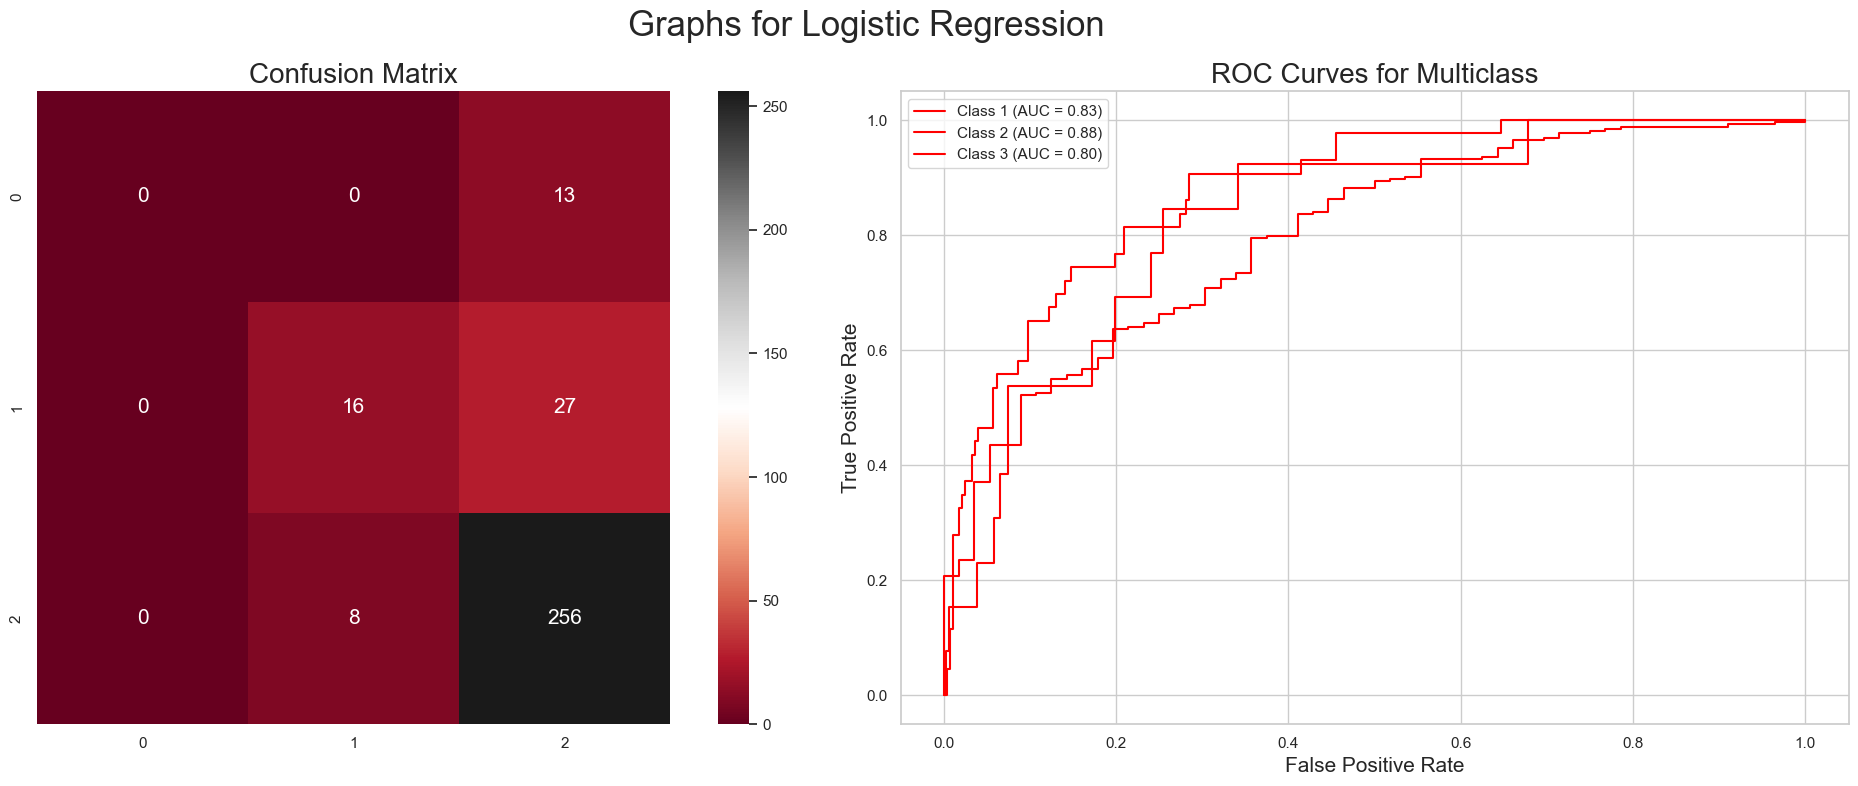

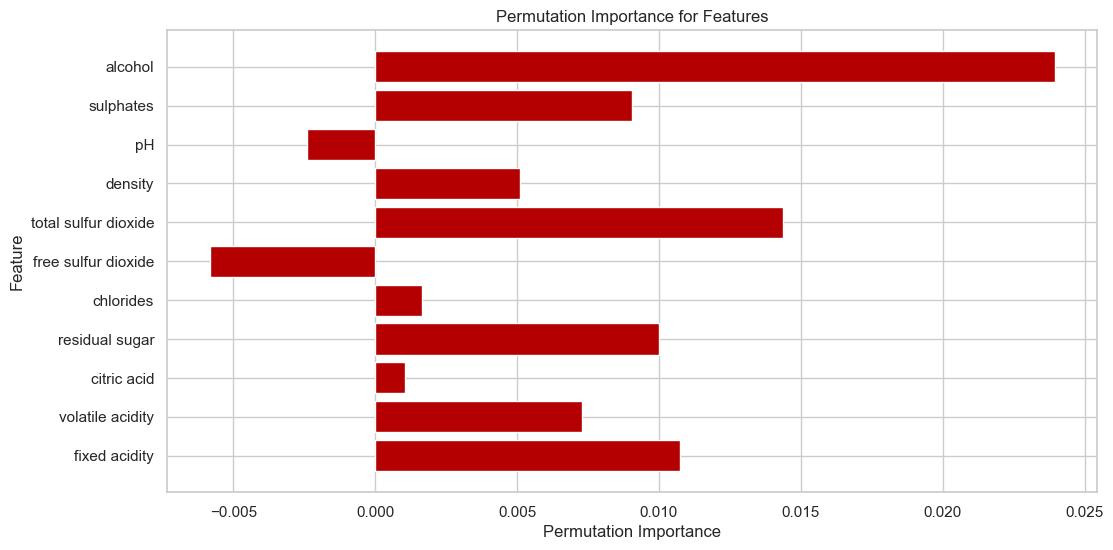

In [33]:
evaluate_model('Logistic Regression',

                           LogisticRegression(C=1.2, fit_intercept=True, max_iter=50, 
                                              
                                              penalty='l1', solver='saga'))

Tree based algorithms are a class of machine learning models that rely on decision trees to make predictions. These models work by navigating through a series of if-else conditions based on the input features, making decisions at each step to ultimately reach a prediction.

#### Decision Tree

A decision tree is one of the simplest and most intuitive models for both classification and regression tasks. It operates by recursively partitioning the feature space into smaller regions, where each region corresponds to a prediction for the target variable. In classification tasks, the prediction is typically the majority class of the training data in that region, while in regression tasks, it is the average target value for that region. Decision trees are flexible and easy to interpret, making them a popular choice for beginners in machine learning.


#### Random Forest:

Random Forest is an ensemble learning method, meaning it combines the predictions of multiple models to improve overall performance. In this case, Random Forest uses many decision trees to form a "forest" of trees. Each tree in the forest is trained on a random subset of both the training data and features, which helps to reduce overfitting and improve the robustness of the model. The final prediction is made by aggregating the predictions of all individual trees, typically through voting (for classification) or averaging (for regression). This ensemble approach helps to create a more stable and accurate model.

**Decision Trees:**

**Advantages:**

1. **Intuitive and Interpretable:** Decision trees are simple to understand and can be visualized, making them accessible even to non-experts. This makes it easy to explain how decisions are made by the model.

2. **Handles Non-linearity:** Decision trees are capable of capturing non-linear relationships between input features and the target variable. Unlike linear models, decision trees do not assume a specific functional form for the data, which gives them more flexibility in modeling complex patterns.

3. **No Assumptions about Data:** One of the key advantages of decision trees is that they make no assumptions about the distribution or structure of the data. This makes them versatile and suitable for a wide range of problems, even when the data does not follow a standard distribution.


**Disadvantages:**

1. **Overfitting:** One of the most significant drawbacks of decision trees is their tendency to overfit. This means that they can become overly complex and memorize the training data, leading to poor generalization to unseen data. This is especially problematic when the data is noisy or has many irrelevant features.

2. **Instability:** Decision trees are sensitive to small changes in the data. A slight variation in the training set can lead to a completely different tree being generated. This makes them less robust compared to other algorithms like ensemble methods.

3. **Bias Towards Dominant Classes:** In cases where the dataset is imbalanced, decision trees may be biased towards predicting the majority class, as they will try to minimize the error by focusing on the most common class in the dataset.

4. **Sensitivity to Outliers:** Decision trees can be influenced by outliers in the data, which may cause them to make poor decisions in certain regions. However, methods like pruning (removing branches that have little importance) and ensemble techniques like Random Forests can help mitigate this issue by providing more robust predictions.




**Important Hyperparameters in Decision Trees:**

1. **Criterion:** This parameter defines the function used to evaluate the quality of a split. The two most common criteria are:
   - **Gini Impurity:** Measures the "impurity" of a split by calculating the likelihood that a randomly chosen sample would be incorrectly classified.
   - **Entropy:** Measures the "information gain" of a split by looking at how much uncertainty is reduced after the split.


2. **Max_depth:** The maximum depth of the tree, which limits how deep the tree can grow. Deeper trees can capture more complex relationships but are more prone to overfitting. Shallow trees may underfit, missing important patterns in the data.

3. **Max_leaf_nodes:** This parameter restricts the maximum number of leaf nodes in the tree. By limiting the number of leaves, you can prevent the model from becoming too complex and overfitting the training data. It helps to simplify the model and improve generalization.

4. **Max_features:** This specifies the number of features to consider when looking for the best split at each node. Limiting the number of features can reduce the model's complexity and help prevent overfitting, especially in cases where there are many features in the dataset.


Tree-based algorithms, particularly decision trees and Random Forests, are powerful tools in machine learning. Decision trees offer a simple and intuitive way to make predictions, while Random Forests improve on this by combining multiple trees to a create a more robust and accurate model. However, decision trees have some inherent limitations, such as overfitting and instability, which can be addressed by using techniques like pruning, setting hyperparameters, or adopting ensemble methods like Random Forests. These models are particularly useful when you need to capture non-linear relationships without making strong assumptions about the data distribution.

For Decision Tree Classifier

Training Accuracy: 100.0000 %

Testing Accuracy: 80.3125 %

Accuracy Score: 80.3125 %



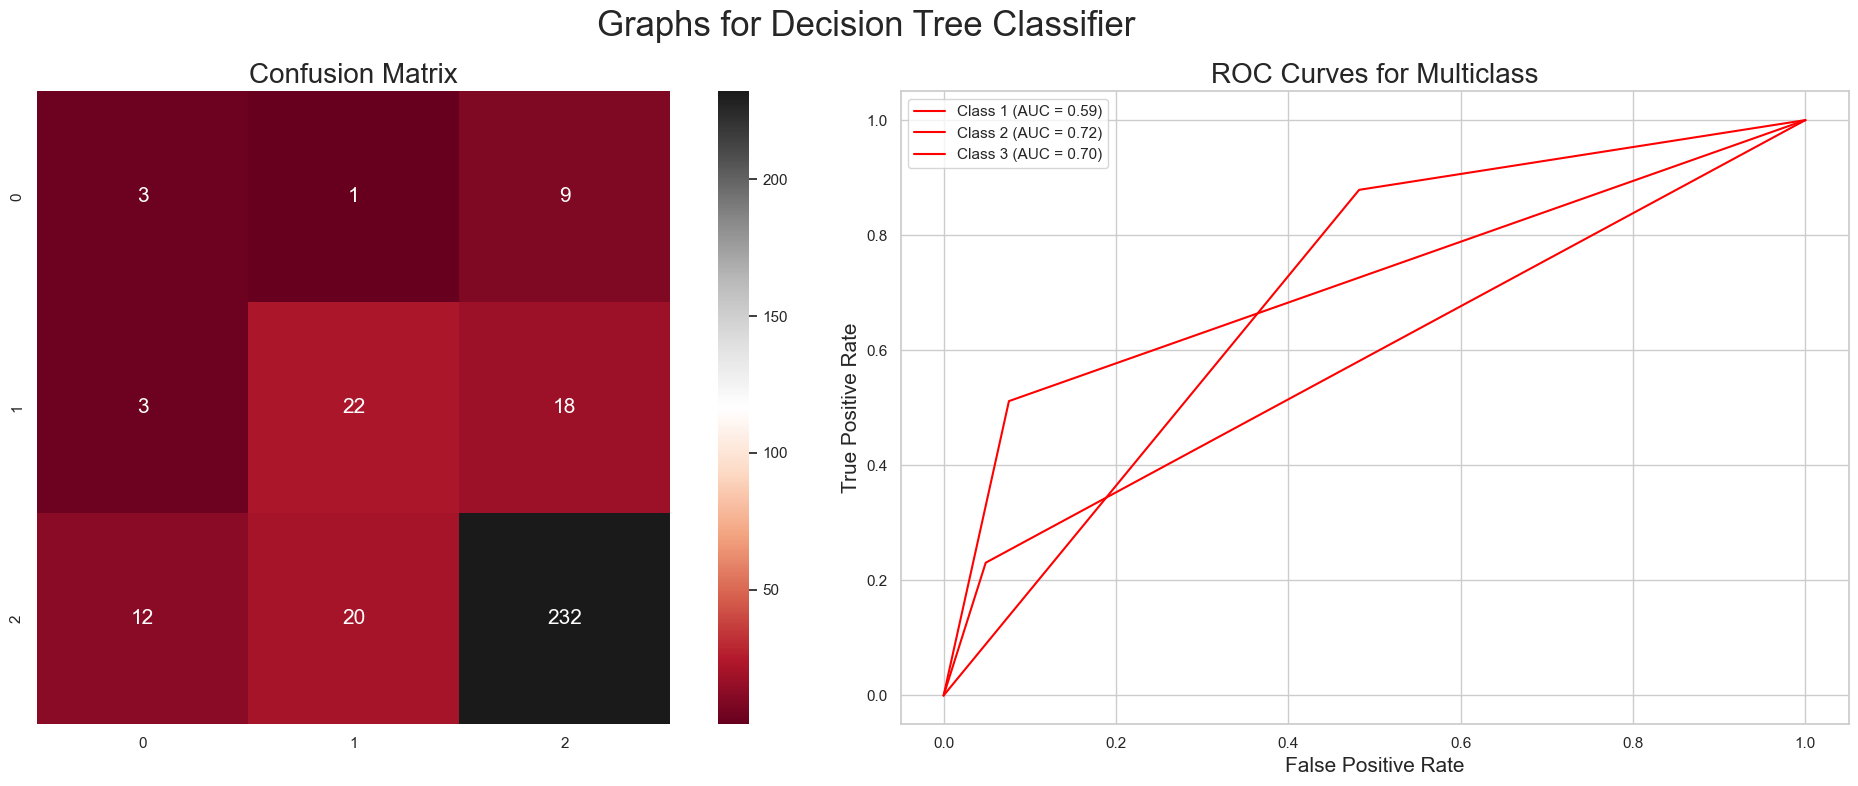

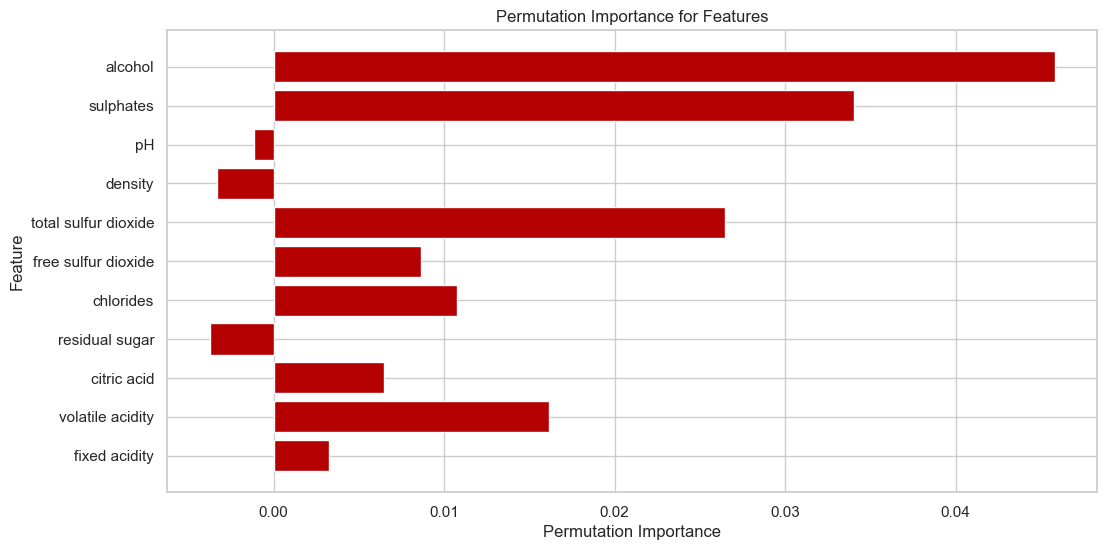

In [34]:
evaluate_model('Decision Tree Classifier',

               DecisionTreeClassifier(criterion = 'entropy',

                                      splitter = 'best',

                                      max_features=6, max_depth=20,

                                      max_leaf_nodes=200, random_state = 33))

#### Random Forest

**Advantages:**

1. **High Accuracy:** Random Forest improves prediction accuracy by combining the outputs of multiple decision trees. Each tree in the forest contributes to the final prediction, leading to more reliable forecasts. The ensemble nature allows it to capture complex patterns in the data that a single decision tree might miss, resulting in higher overall accuracy.

2. **Robustness:** One of the key strengths of Random Forest is its robustness. By averaging or voting over many decision trees, it reduces the likelihood of overfitting compared to individual decision trees. This makes it less sensitive to noise and outliers, and better at generalization to new, unseen data.

3. **Handles Nonlinearity:** Like decision trees, Random Forest can detect and model non-linear relationships between features and the target variable. This is particularly valuable when dealing with datasets where the relationship between the input features and target is complex and non-linear.


**Disadvantages:**

1. **Complexity:** While Random Forest offers improved accuracy, it comes at the cost of increased complexity. With a large number of trees, the model can become computationally expensive and may require more time and resources to train and make predictions. This complexity can also make it harder to fine-tune the model to its optimal state.

2. **Less Intuitive:** Unlike a single decision tree, which can be visualized and easily understood, Random Forest combines the outputs of many trees, making it harder to interpret the final prediction. Each individual tree might have a straightforward decision-making process, but when combined, the overall prediction lacks the transparency that a single tree offers.

3. **Difficult to Interpret:** Although Random Forest provides feature importance scores, understanding the exact reasoning behind a specific prediction is much harder than with a single decision tree. The decision-making process is distributed across many trees, making it challenging to explain the model's decisions in a human-readable way.

4. **Memory Consumption:** Since Random Forest constructs and maintains multiple trees, it requires significantly more memory compared to simpler models. For datasets with many features and large number of trees, this can become a concern, especially when working with limited computational resources.


**Important Hyperparameters:**

1. **n_estimators:** This parameter controls the number of trees in the forest. A higher number of trees typically improves the model's performance by reducing variance, but it also increases computational costs. As the number of trees grows, the model becomes more robust, but it requires more memory and processing power.

2. **Criterion:** The criterion defines how the quality of a split is evaluated. The two most common criteria are:
    - **Gini Impurity:** Measures the impurity of a split by calculating how often a randomly chosen sample would be incorrectly classified.
    - **Entropy:** Measures the information gain at each split, evaluating how much uncertainty is reduced after the split.

3. **max_depth:** This parameter specifies the maximum depth of each individual decision tree. By limiting the depth, you can prevent overfitting, which occurs when a tree becomes too complex and starts to memorize the training data. A higher `max_depth` allows trees to capture more intricate relationships, but it also increases the risk of overfitting.

4. **max_features:** This defines the number of features to consider when splitting a node in each tree. Randomly selecting a subset of features at each split introduces more diversity among the trees, which helps improve the model's performance and reduce overfitting. By adjusting `max_features`, you can control the randomness of feature selection, impacting both the performance and speed of the model.


Random Forest is a powerful ensemble method that aggregates the predictions of multiple decision trees to improve accuracy and reduce overfitting. While it offers high performance, it comes with certain trade-offs such as increased complexity, difficulty in interpretation, and higher memory usage. The model is particularly useful for datasets with non-linear relationships and when dealing with large, complex problems. By tuning hyperparameters like the number of trees (`max_features`), Random Forest can be optimized for a wide range of tasks, balancing performance with computational efficiency.

For Random Forest Classifier

Training Accuracy: 100.0000 %

Testing Accuracy: 88.7500 %

Accuracy Score: 88.7500 %



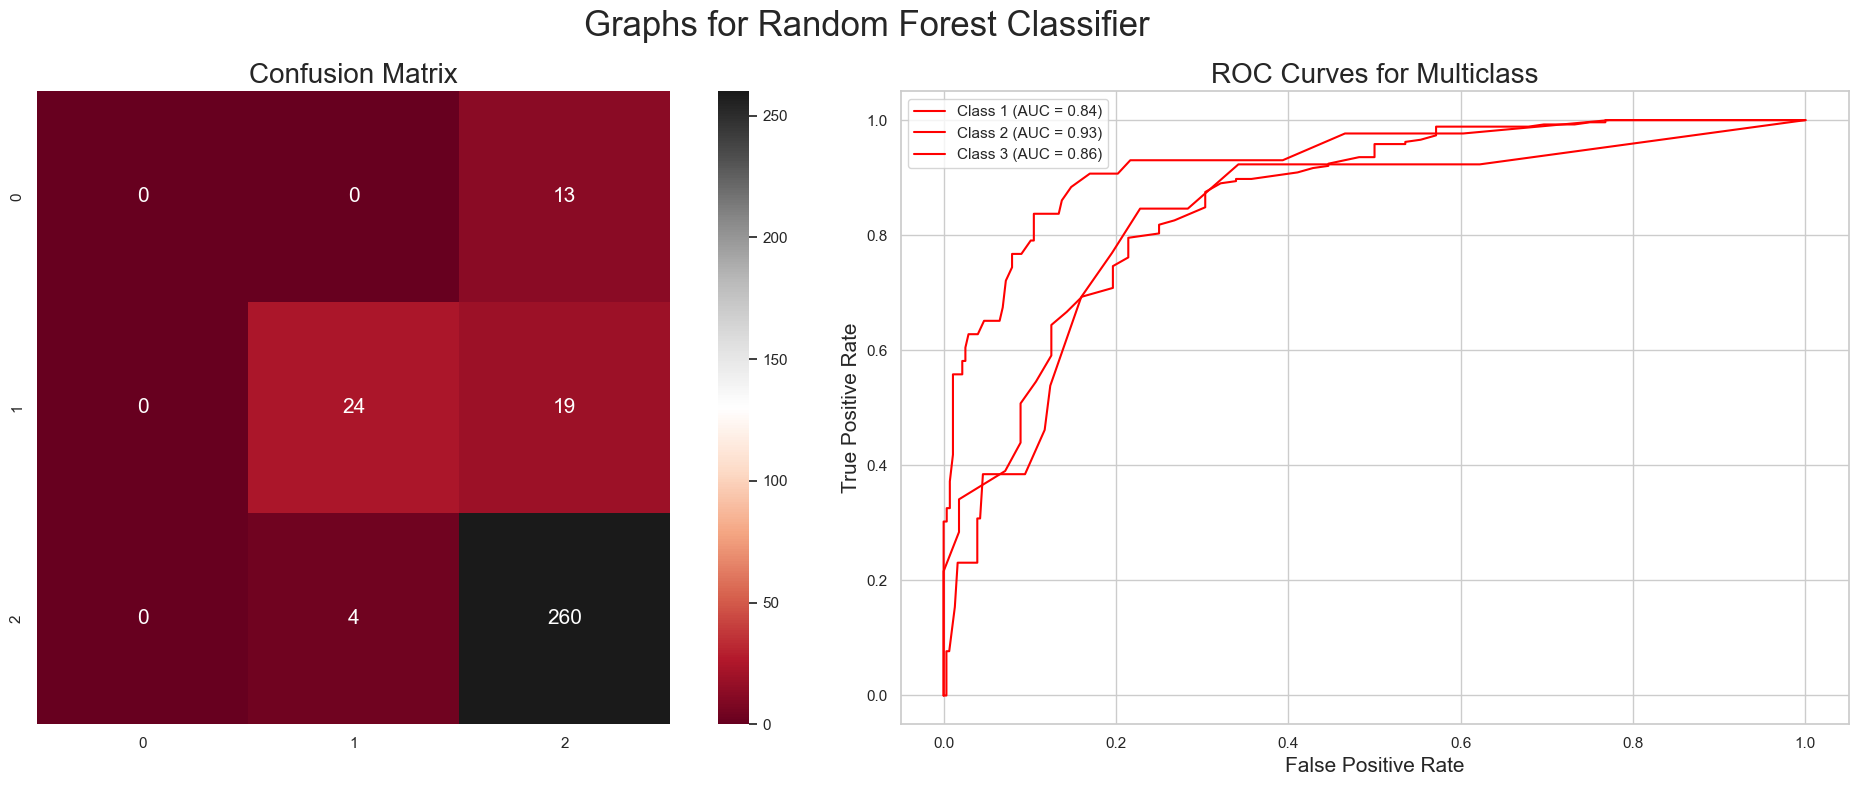

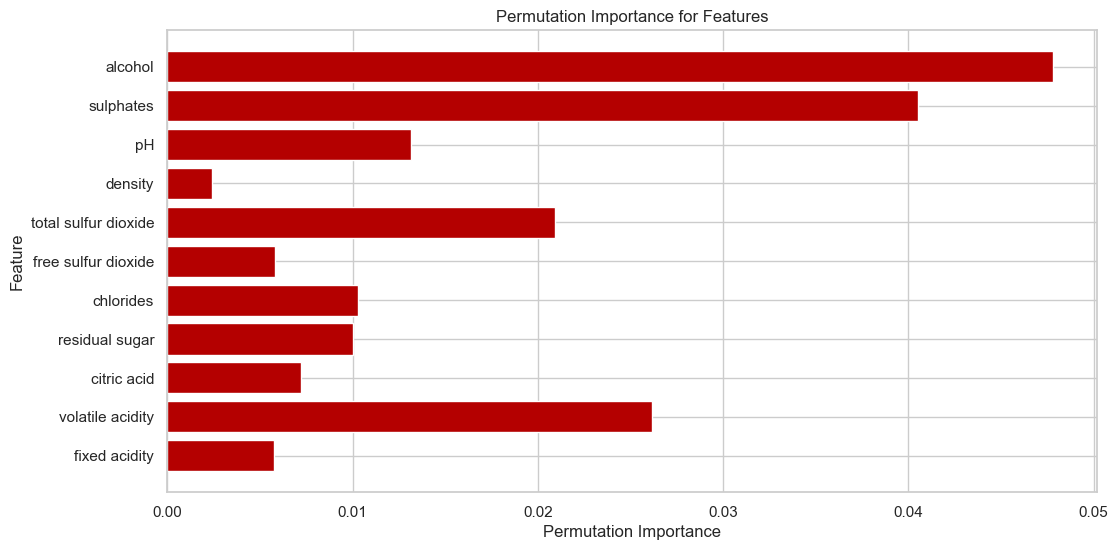

In [35]:
evaluate_model('Random Forest Classifier',

               RandomForestClassifier(criterion = 'gini', max_depth = 30,

                                      max_features = 'sqrt', n_estimators = 100,

                                      random_state = 33))

#### Support Vector Classifier (SVC)

The **Support Vector Classifier (SVC)** is a powerful and widely used supervised learning algorithm primarily designed for classification tasks. It aims to find the optimal hyperplane that best separates the different classes in the feature space, which can be a highly complex decision boundary, especially in higher-dimensional spaces.

**How it Works:**

At its core, the SVC tries to find a hyperplane (or decision boundary) that maximizes the margin between the different classes. The margin refers to the distance between the nearest data points of each class to the hyperplane. By maximizing this margin, the SVC achieves better generalization and minimizes classification errors on unseen data.

**Advantages of SVC:**

1. **Effective in High-Dimensional Spaces:** One of the key strengths of the SVC is its ability to work well in high-dimensional feature spaces. This makes it particularly useful when dealing with datasets that contain many features (such as text classification tasks where features can be tens of thousands of words).

2. **Versatile Kernel Functions:** SVC can use various kernel functions, such as:
   - **Linear kernel:** Suitable for linearly separable data.
   - **Polynomial kernel:** Effective for data that is not linearly separable but follows a polynomial relationship.
   - **Radial Basis Function (RBF) kernel:** Well-suited for highly non-linear decision boundaries by mapping data into higher dimensions, where a linear separation is possible.

This flexibility allows SVC to handle a wide variety of datasets and relationships between features.

3. **Robust to Overfitting:** By maximizing the margin between classes, SVC tends to have a lower risk of overfitting. Overfitting happens when a model learns too much from the training data and performs poorly on new, unseen data. Maximizing the margin allows SVC to generalize well to new data points.

4. **Works for Both Linear & Non-Linear Classification:** Using the appropriate kernel function, SVC can efficiently handle both **linear** and **non-linear** classification tasks. The choice of kernel allows the model to adapt to different types of decision boundaries that may exist in the feature space.


**Disadvantages of SVC:**

1. **Hyperparameter Sensitivity:** SVC performance is highly sensitive to the values of its hyperparameters, notably the **regularization parameter (C)** and **kernel parameters**. The regularization parameter controls the trade-off between maximizing the margin and minimizing classification errors, while the kernel parameters (such as gamma for the RBF kernel) control how complex the decision boundary can be. Tuning these parameters often requires extensive experimentation or cross-validation, which can be time-consuming.

2. **Computationally Expensive:** Training an SVC can be computationally expensive, particularly with large datasets. This is because it involves solving a **quadratic optimization problem**, which requires significant computational resources, especially for datasets with a large number of samples and features.

3. **Poor Performance with Noise Data:** SVCs are sensitive to noise and outliers in the data. Noise can lead to small margins or inappropriate decision boundaries, especially in high-dimensional spaces, negatively affecting model performance. If the dataset contains a significant amount of noise, the classifier may fail to generalize well and produce poor predictions.


**Important Hyperparameters for SVC:**

1. **C (Regularization Parameter):** The `C` parameter controls the trade-off between achieving a **large margin** and having **low classification error**. A smaller value of C allows for a larger margin, but might allow more misclassifications, while a larger value of C penalizes misclassifications more heavily, leading to a smaller margin but fewer errors.

2. **Kernel Function:** The kernel function defines the type of decision boundary. Commonly used kernels include:
   - **Linear Kernel:** Assumes a linear separation between classes.
   - **Polynomial Kernel:** Suitable for non-linear relationships, where the decision boundary is a polynomial.
   - **Radias Bias Function (RBF) kernel:** Maps data into higher dimensions, allowing for highly non-linear decision boundaries.

3. **Gamma (Kernel Coefficient):** The **gamma** parameter defines how much influence each training sample has on the decision boundary. A small gamma means that the influence of each data point is more spread out, leading to smoother decision boundaries. A larger gamma means that each data point has a more localized influence, leading to more complex decision boundaries. Selecting the appropriate gamma is critical for ensuring a good decision boundary.


The **Support Vector Classifier (SVC)** is a powerful and flexible model that excels in high-dimensional spaces and offers robust performance with appropriate tuning. However, it requires careful parameter selection and can be computationally expensive, especially when dealing with large datasets or noisy data. When tuned properly, SVC can effectively classify both linear and non-linear data, making it suitable for a wide range of real-world classification problems.

For Support Vector Classification

Training Accuracy: 86.0829 %

Testing Accuracy: 86.8750 %

Accuracy Score: 86.8750 %



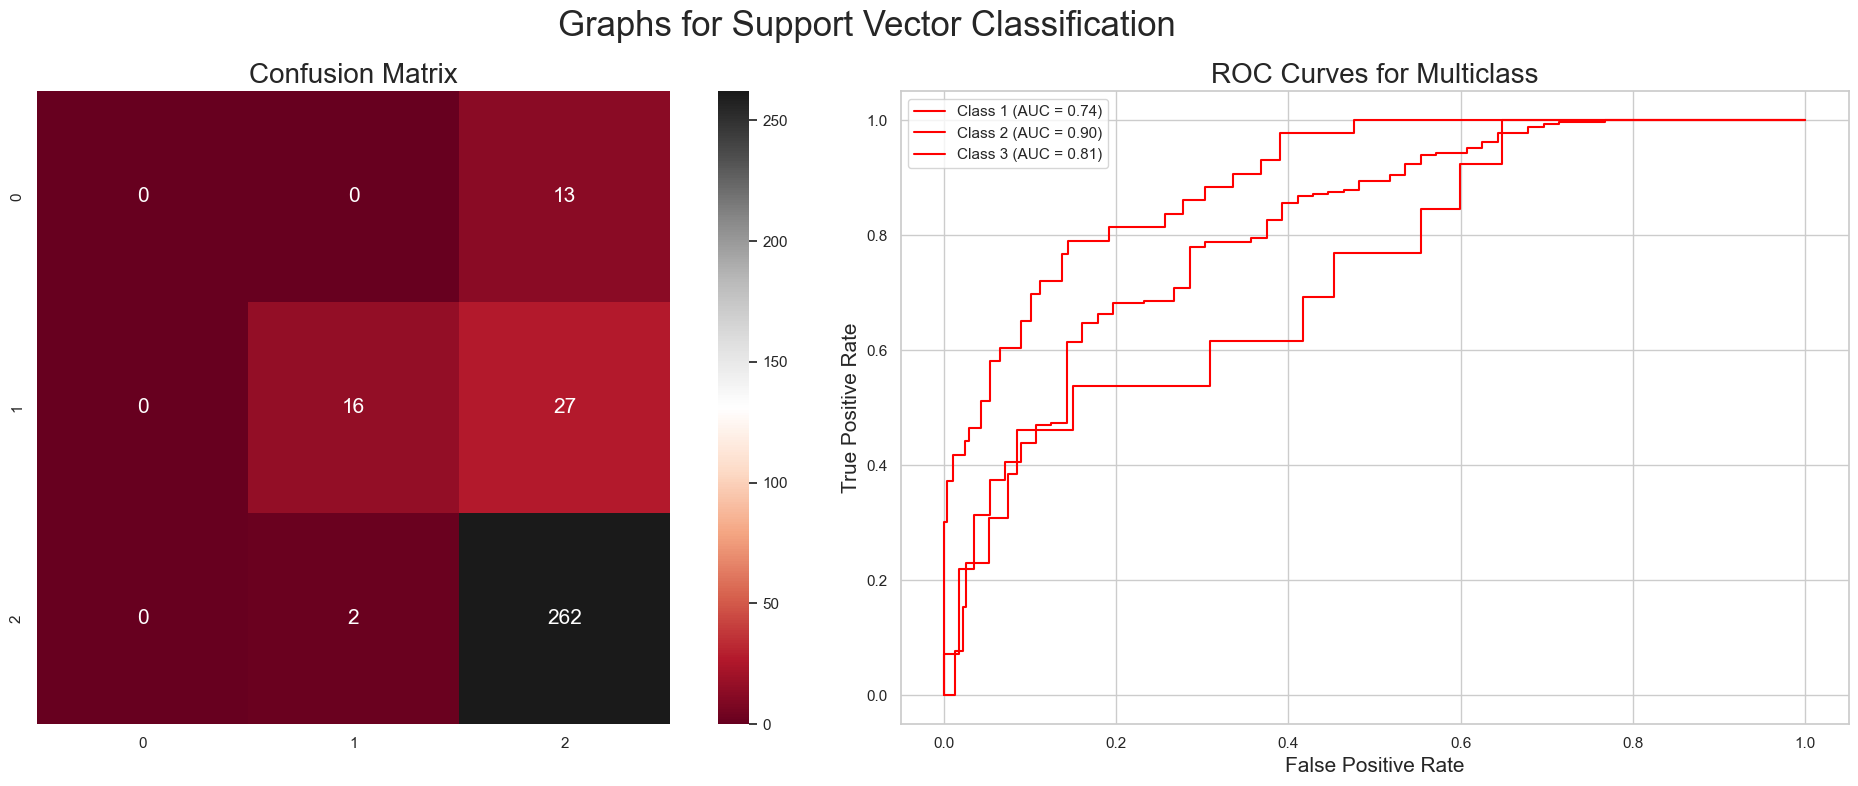

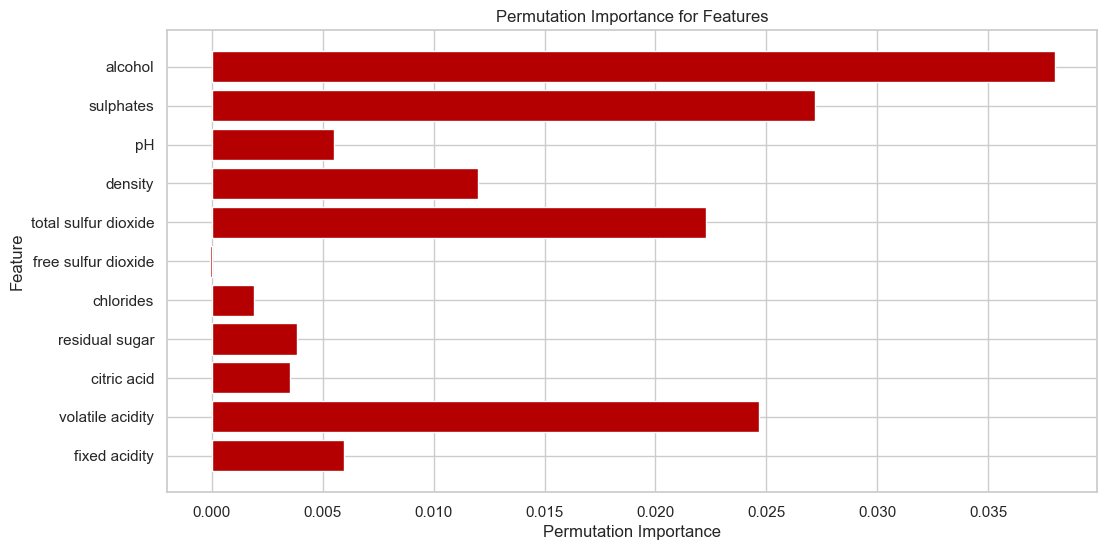

In [36]:
evaluate_model('Support Vector Classification', SVC(C = 1, gamma = 'auto', 

                                                    kernel = 'rbf', random_state = 33, probability = True))

#### K-Nearest Neighbors (KNN):

The **K-Nearest Neighbors (KNN)** algorithm is a simple and intuitive supervised learning method used for classification and regression tasks. It works by finding the K closest training instances to a given test instance and making predictions based on those neighbors.

**Advantages of K-Nearest Neighbors (KNN):**

1. **Simplicity:** KNN is easy to understand and implement, making it a great starting point for beginners. It doesn't require complex assumptions or models, and the underlying concept of finding the closest neighbors makes it intuitive. This simplicity also makes it suitable for **quick prototyping** in projects where speed is crucial.

2. **Non parametric:** KNN is a **non-parametric** method, meaning it makes no assumptions about the underlying data distribution. This is particularly useful when dealing with datasets where the distribution is unknown or complex. Since the model doesn't rely on an explicit mathematical model (like linear regression), it can be applied to a wide variety of data types and structures.

3. **Adaptability:** KNN can easily handle **multi-class classification** tasks as well as **regression** problems. Its flexibility in handling different types of output variables makes it a versatile algorithm that can be applied in various domains, from image classification to stock market prediction.


**Disadvantages of KNN:**

1. **Computational Comlexity:** As the size of the training dataset increases, **prediction time** in KNN also increases significantly. This is because the algorithm must calculate the distance to every training instance for each new prediction. As a result, KNN can be quite **computationally expensive**, especially for large datasets, making it less suitable for real-time or large-scale applications without optimization.

2. **Sensitive to Noise and Outliers:** KNN is sensitive to **noisy data** and **outliers** because it considers all neighbors equally when making predictions. If there are a few misclassified or extreme data points in the training set, they can distort the model's predictions. This sensitivity to outliers can degrade the model's accuracy, especially when the data is not clean.

3. **Scaling Sensitivity:** KNN relies on **distance metrics** (like Euclidean distance) to determine the similarity between instances. If the features are not properly **scaled**, features with larger ranges can dominate the distance calculation, resulting in poor performance. Thus, proper **feature scaling** (like normalization or standardization) is crucial for KNN to perform well.


**Important Hyperparameters for KNN:**

1. **n_neighbors:** This parameter defines the **number of neighbors** (K) to consider when making predictions. A small value for K can make the model sensitive to noise, while a larger value can make the model more robust but less sensitive to local patterns. Choosing the right K value is critical for balancing bias and variance.

2. **Weights:** The **weights** hyperparameter specifies how each neighbor is weighted during the prediction phase. The options are:
   - `uniform`: All neighbors are given equal weight.
   - `distance`: Neighbors closer to the query point are given more weight (inversely proportional to the distance).
Using `distance` weighting can improve the model's performance, especially when neighbors at varying distances have different levels of influence.

3. **Metric:** The **metric** hyperparameter defines the **distance metric** used to calculate the similarity between instances. Common metrics include:
   - `euclidean`: The straight-line distance between points.
   - `manhattan`: The sum of the absolute differences between coordinates.
   - `minkowski`: A generalization of both Euclidean and Manhattan distances.

The choice of algorithm influences **computational complexity** and **memory usage**, so it's important to select one based on the dataset size and dimensionality.

K-Nearest Neighbors is a powerful and easy-to-implement algorithm suitable for both classification and regression tasks. Its simplicity and non-parametric nature make it a great choice for various applications, especially when the data distribution is unknown. However, it comes with challenges such as high computational complexity for large datasets, sensitivity to noise, and the need for proper feature scaling. By tuning hyperparameters like the number of neighbors, weights, and the distance metric, KNN can be customized to perform well for specific tasks, but careful attention to these factors is essential for optimal performance.

For K Nearest Neighbors

Training Accuracy: 100.0000 %

Testing Accuracy: 87.5000 %

Accuracy Score: 87.5000 %



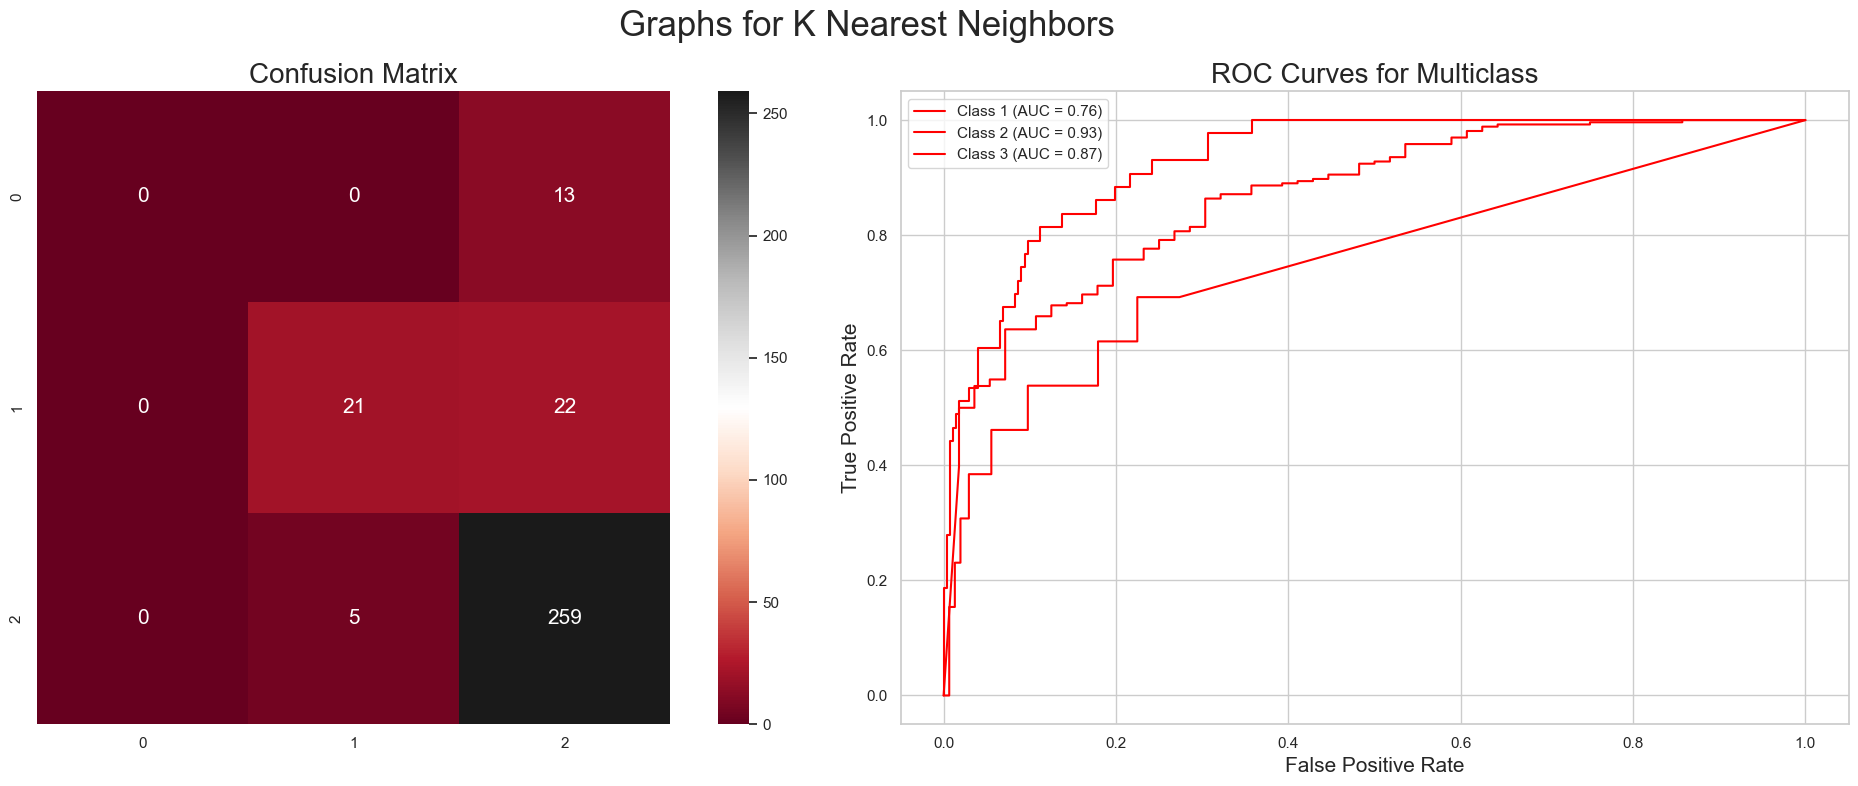

In [37]:
evaluate_model('K Nearest Neighbors', 

               KNeighborsClassifier(algorithm = 'auto', leaf_size = 20,

                                    metric = 'euclidean', n_jobs = -1, n_neighbors = 25,

                                    p = 2, weights = 'distance'))

#### Boosting Models

**Boosting** is an ensemble learning technique that aims to combine multiple weak learners to create a strong learner. It does this by training models sequentially, with each new model focusing on correcting the errors made by previous models. Misclassified instances from earlier iterations are given higher weights in subsequent rounds, ensuring that the model focuses on the more difficult cases. The final prediction is made by aggregating the predictions from all individual learners. 

**Gradient Boosting**

**Gradient Boosting** is a type of boosting algorithm that optimizes the predictive performance by minimizing a loss function using gradient descent. It iteratively adds decision trees to the ensemble, each time correcting the errors from the previous trees. This method has proven to be highly effective in many machine learning tasks.

**Advantages of Gradient Boosting:**

1. **High Prediction Accuracy:** Gradient Boosting is known for its strong performance across a wide variety of machine learning applications. By focusing on minimizing errors through iterative learning, it can achieve highly accurate predictions.

2. **Robust to Outliers:** The algorithm uses techniques like **shrinkage** (reducing the contribution of each individual learner) and **tree-based learning** to mitigate the influence of outliers, making it more robust when faced with noisy data.

3. **Feature Importance:** Gradient Boosting provides insights into the importance of different features in the model's predictions. This can be highly beneficial for **feature selection** and improving model interpretability, as it helps to identify which variables most strongly influence the outcome.


**Disadvantages of Gradient Boosting:**

1. **Hyperparameter Sensitivity:** Gradient Boosting's performance is highly dependent on the tuning of its hyperparameters, such as the **learning rate** and **number of trees**. Finding the optimal combination can be time-consuming and may require extensive experimentation or cross-validation.

2. **Computationally Expensive:** The process of training a large ensemble of decision trees can be computationally intensive, especially when the trees are deep or the dataset is large. This makes the training time relatively long compared to other algorithms.

3. **Prone to Overfitting:** Gradient Boosting can overfit, especially when the data is noisy or when the dataset is small. Overfitting occurs when the model becomes too complex and learns patterns that do not generalize well to new, unseen data. Regularization techniques such as **shrinkage** (reducing the contribution of each new learner) can help mitigate this issue.


**Important Hyperparameters for Gradient Boosting**

1. **Loss Function:** The **loss** parameter defines the optimization goal of the algorithm. For classification tasks, you might use **log_loss** (similar to logistic regression), while **exponential loss** prioritizes the misclassification of difficult-to-classify samples, akin to the AdaBoost algorithm. The choice of loss function impacts the model's behavior and accuracy.

2. **Learning Rate (Shrinkage):** The **learning rate** controls the contribution of each individual tree to the final prediction. Smaller learning rates result in more gradual updates, which can help prevent overfitting and improve the generalization of the model, but may require more boosting iterations (trees).

3. **Number of Trees (n_estimators):** The **number of trees** determines how many iterations or boosting rounds the algorithm will run. A higher number of trees allows the model to make more updates and potentially improve accuracy, but can also increase the risk of overfitting and computational expense.

4. **Tree-Specific Parameters:** Parameters like **maximum depth** of the trees, **minimum samples per leaf**, and **maximum number of features** to consider for each split influence the structure and complexity of the individual trees. These parameters are critical for controlling the capacity of each decision tree, balancing accuracy with the risk of overfitting.


**Gradient Boosting** is a highly effective machine learning algorithm that achieves excellent performance in a wide range of tasks. While it is robust to outliers and provides valuable insights into feature importance, it requires careful tuning of hyperparameters and be computationally expensive. Proper regularization techniques and model evaluation are essential to avoid overfitting, ensuring that the model generalizes well to new, unseen data. 

In [38]:
GradientBoostingClassifier(

    loss = 'deviance',   # Default loss for multi-class classification

    learning_rate = 0.2,

    max_depth = 5,

    min_samples_split = 5,

    min_samples_leaf = 2,

    subsample = 1.0,

    n_estimators = 60,

    random_state = 33)

GradientBoostingClassifier(learning_rate=0.2, loss='deviance', max_depth=5,
                           min_samples_leaf=2, min_samples_split=5,
                           n_estimators=60, random_state=33)

For Gradient Boosting Classifier

Training Accuracy: 100.0000 %

Testing Accuracy: 86.2500 %

Accuracy Score: 86.2500 %



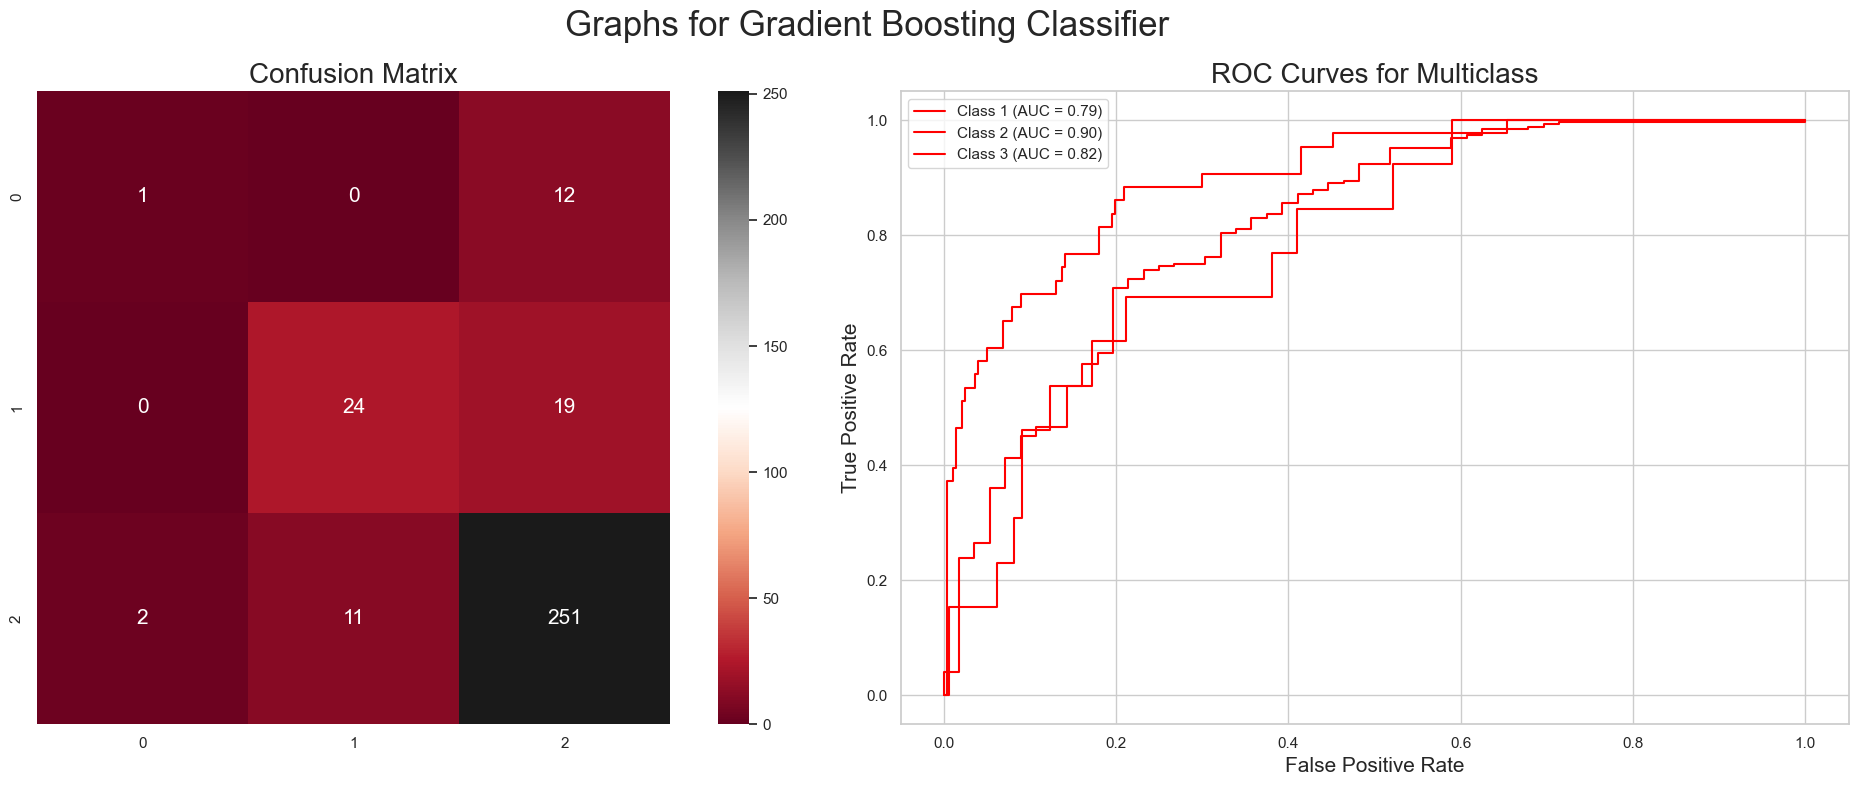

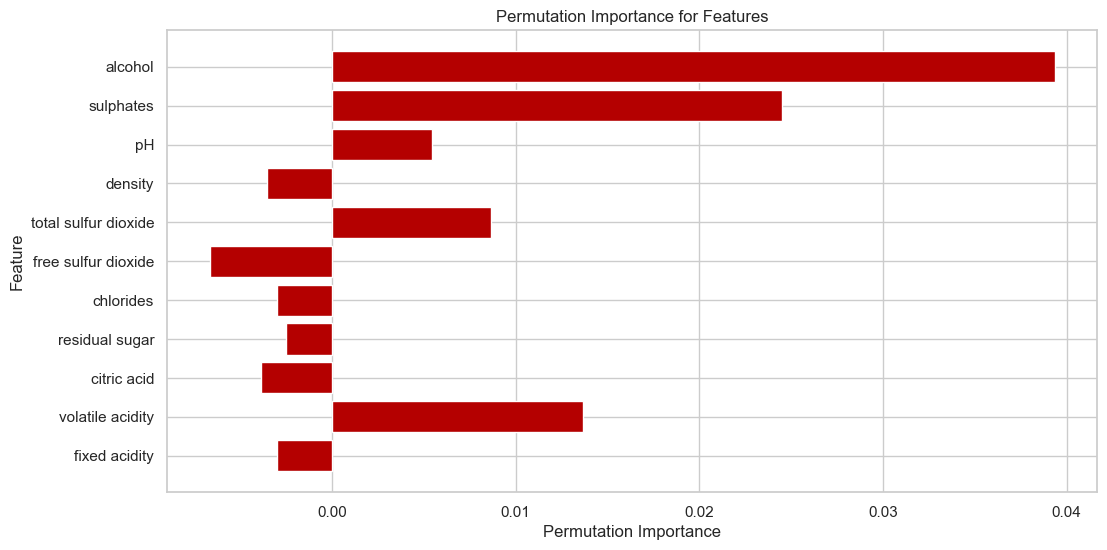

In [39]:
evaluate_model('Gradient Boosting Classifier', 
               
               GradientBoostingClassifier(loss = 'log_loss', learning_rate = 0.2, max_depth = 5,

                                          min_samples_split = 5, min_samples_leaf = 2, subsample = 1.0,

                                          n_estimators = 60, random_state = 33))

#### XGBoost

**XGBoost (Extreme Gradient Boosting)** is an optimized, highly efficient implementation of the gradient boosting algorithm. It is known for its speed and scalability, making it one of the most popular and effective boosting algorithm in machine learning.

**Advantages of XGBoost**

1. **High Performance:** XGBoost is designed with performance in mind. It is optimized for speed and efficiency, often outpacing other gradient boosting algorithms. This makes it highly suitable for large-scale machine learning tasks, where training time and computational resources are critical.

2. **Regularization:** One of the key features of XGBoost is its built-in **regularization** techniques, which help to reduce overfitting and improve the model's ability to generalize to new, unseen data. This is achieved through both **L1 (Lasso)** and **L2 (Ridge)** regularization, controlling model complexity.

3. **Flexibility:** XGBoost supports a wide range of **objective functions** and **evaluation metrics**, making it adaptable for various machine learning tasks. It can be used for regression, classification, ranking and user-defined prediction tasks, making it highly versatile across different types of data and problems.


**Disadvantages of XGBoost**

1. **Sensitivity to Hyperparameters:** XGBoost's performance heavily depends on the careful tuning of hyperparameters. Parameters like learning rate, tree depth, and regularization values need to be optimized for the best performance, which can be a time-consuming process.

2. **Memory Usage:** XGBoost can be memory-intensive, especially for large datasets with many features. This can limit its use for very large datasets or on systems with limited memory resources. Proper system resources and tuning are essential to handle large-scale problems.

3. **Black-Box Model:** While XGBoost is highly effective, it is often considered a **black-box model** because it can be difficult to interpret. Unlike decision trees, where the decision process is transparent, XGBoost combines many trees, making it harder to understand how predictions are made, which can be a disadvantage in applications requiring model interpretability.


**Important Hyperparameters in XGBoost**

1. **Booster:** The **booster** parameter determines the type of boosting model to use. It can be:
   - `gbtree`: Tree-based models.
   - `gblinear`: Linear models.
   - `dart`: Dropouts meet Multiple Advert Regression Trees (DART), a variant designed to improve regularization.

2. **Learning Rate:** The **learning rate** (or **eta**) controls how much each tree contributes to the final prediction. It helps to prevent overfitting by scaling down the impact of each individual tree. Typical values range from 0.01 to 0.3, where smaller values often require more boosting rounds to converge.

3. **Max Depth:** The **max_depth** parameter sets the maximum depth of the trees. Deeper trees capture more complex relationships but also increase the risk of overfitting. Finding the optimal depth is crucial to balancing the model complexity and performance.

4. **Min Child Weight:** `min_child_weight` defines the minimum sum of instance weights (Hessian) required in a child node. Larger values help to prevent overfitting by making the algorithm more conservative, ensuring that splits are only made when there is sufficient data to support them.

5. **Subsample:** The **subsample** parameter specifies the fraction of observations to be randomnly sampled for building each tree. Lower values make the algorithm more conservative, reducing the likelihood of overfitting but potentially sacrificing some predictive power.

6. **Column Subsample (colsample_bytree):** `colsample_bytree` controls the fraction of features (columns) to be randomly sampled for each tree. This is similar to subsampling, but it applies features rather than observations. It helps to reduce overfitting by preventing the model from relying too heavily on any single feature.

7. **Gamma:** `gamma` defines the minimum loss reduction required to make a further split on a leaf node. A higher value for gamma means that the algorithm will be more conservative, only splitting if there is a significant improvement in the model's perforance.

8. **Objective Function:** The **objective function** specifies the loss function to be minimized. For binary classification, `binary:logistic` is typically used, which outputs the probability of the positive class. Other objective functions can be used depending on the task (e.g. `reg:squarederror` for regression tasks).


**XGBoost** is one of the most powerful and efficient boosting algorithms available, known for its speed, scability, and flexibility. It is particularly effective for a wide range of machine learning tasks, thanks to its ability to handle large datasets and complex relationships. However, it requires careful tuning of hyperparameters to achieve optimal performance and can be memory-intensive. Despite its high performance, XGBoost's lack of interpretability can be a limitation in some use cases where model transparency is important.

For XGBoost Classifier

Training Accuracy: 100.0000 %

Testing Accuracy: 87.5000 %

Accuracy Score: 87.5000 %



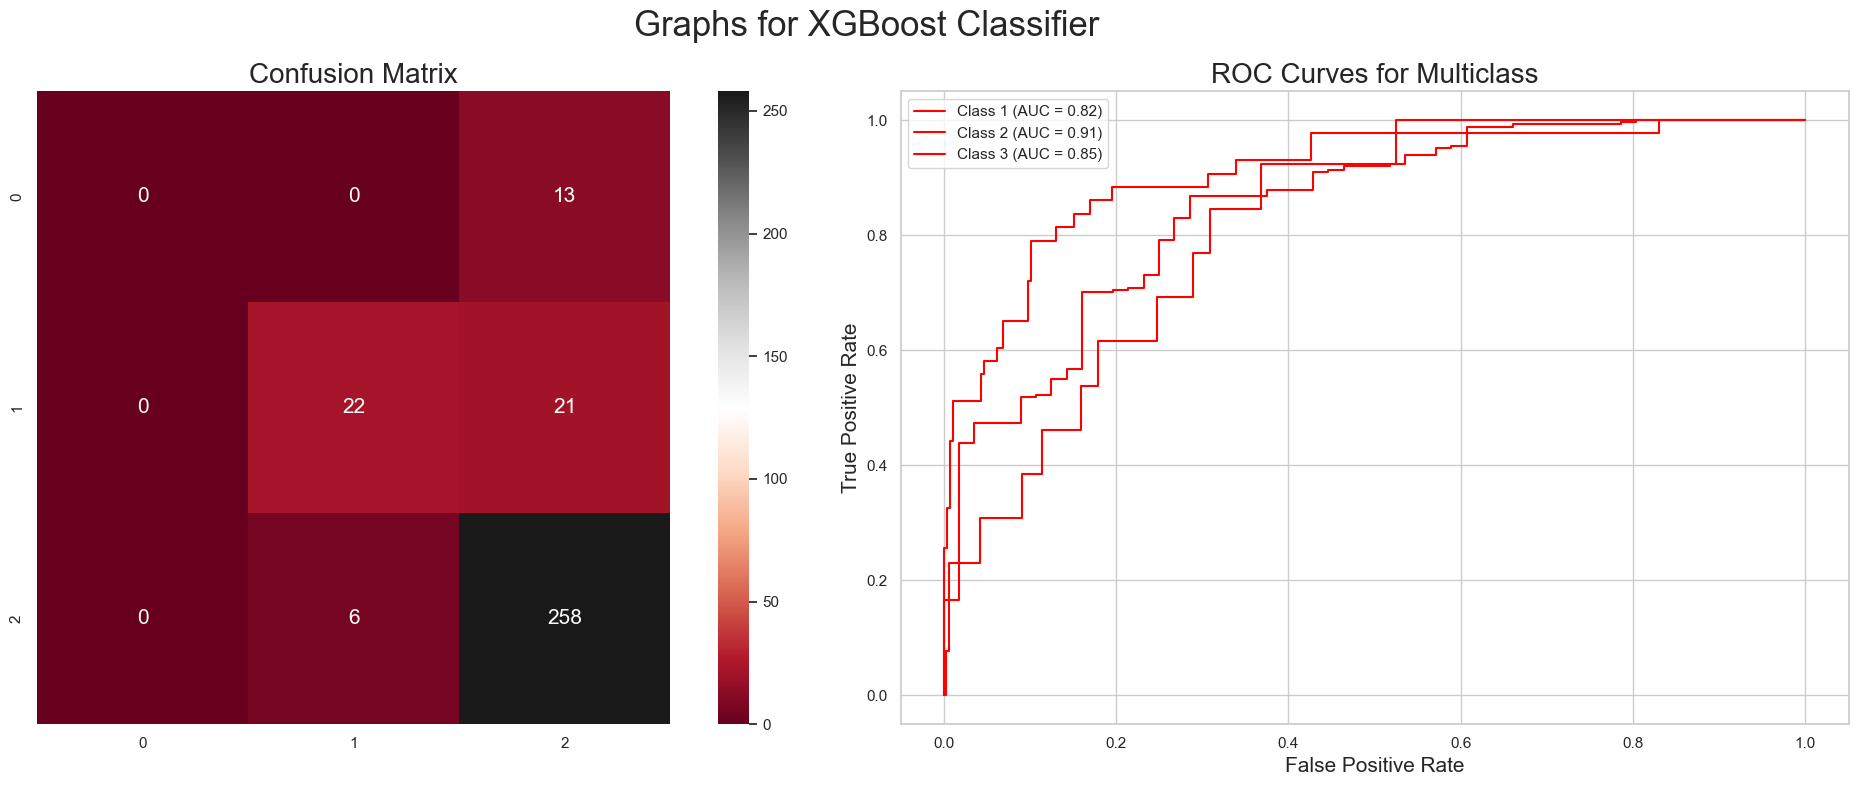

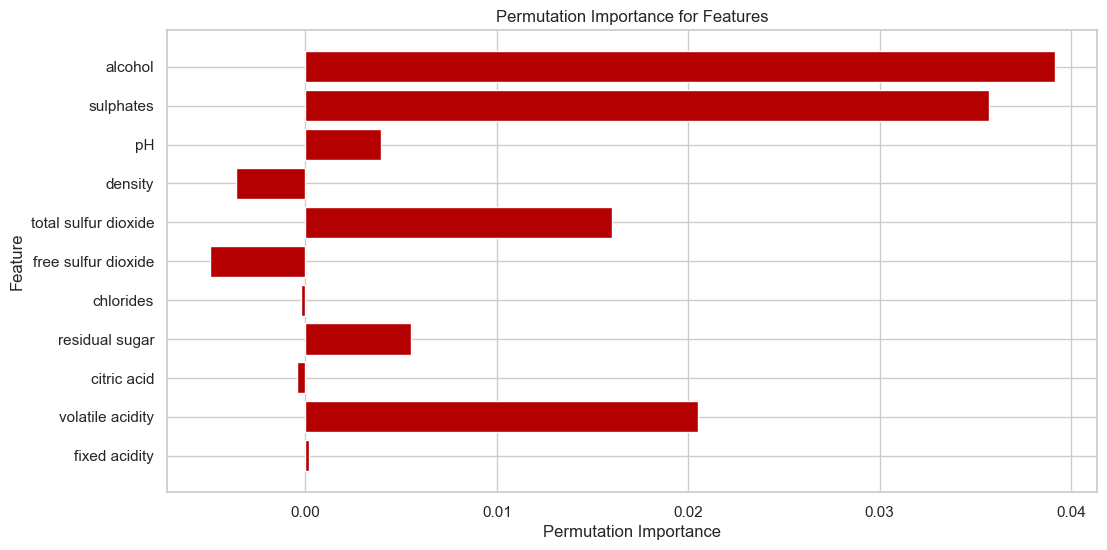

In [40]:
evaluate_model('XGBoost Classifier', XGBClassifier(

    booster = 'gbtree',

    gamma = 0.09,

    learning_rate = 0.15,

    n_estimators = 200,

    max_depth = 13,

    min_child_weight = 1,

    sub_sample = 0.8,

    colsample_bytree = 0.8,

    objective = 'binary:logistic',  # or 'multi:softmax'

    random_state = 33))

#### LightGBM Model

**LightGBM (Light Gradient Boosting Machine)** is a high-performance, distributed gradient boosting framework that has become popular due to its efficiency, scalability, and superior performance on large datasets. It is an implementation of gradient boosting that uses decision trees to build a predictive model and is designed to be faster and more memory-efficient than other boosting methods like XGBoost.

**Advantages of LightGBM**

1. **Efficiency:** LightGBM is optimized for **speed** and **efficiency**, enabling rapid training of models. Its advanced algorithms are designed to minimize computational costs while maintaining high performance. As a result, LightGBM can handle a wide variety of machine learning tasks efficiently, even with large datasets.

2. **Handling Large Datasets:** One of the key strengths of LightGBM is its ability to handle **large datasets** with millions of instances and features. The model is designed to be highly memory-efficient, utilizing techniques **parallel computing** to speed up training. This makes it ideal for applications involving big data where training time and memory usage are critical considerations.

3. **Optimization:** LightGBM employs a **novel tree learning algorithm** that is based on a histogram-based approach. This allows it to build decision trees efficiently and with better **accuracy** while reducing the computational resources needed. By using histograms to split features, it avoids expensive continuous feature computation, speeding up the learning process.


**Disadvantages of LightGBM**

1. **Overfitting:** Like many powerful models, **LightGBM** is prone to overfitting, especially when trained on smaller datasets or when the hyperparameters are not properly tuned. Overfitting can occur when the model becomes too complex for the data, leading to poor generalizationon unseen data.

2. **Interpretability:** The complexity of LightGBM models can make them challenging to interpret. Although feature importance scores can be extracted, understanding the exact decision-making process of the model is more difficult compared to simpler models like decision trees. This can be a drawback in applications where interpretability is a priority, such as in regulated industries.

3. **Limited Tuning Parameters:** Although LightGBM provides several tuning parameters, the model requires **careful experimentation** and domain knowledge to optimize performance effectively. Finding the right combination of hyperparameters is essential to improving accuracy and preventing overfitting.


**Important Hyperparameters in LightGBM**

1. **Boosting Type (`boosting_type`):** The boosting type determines the type of boosting algorithm to use. For example, `gbdt` (Gradient Boosting Decision Tree) is the classic boosting method used by LightGBM, but other types like `dart` (Dropouts meets Multiple Additive Regression Trees) can also be used depending on the task.

2. **Regularization Parameters (`reg_alpha`,`reg_lambda`):** These regularization parameters help prevent overfitting by penalizing large weights in the model. Specifically:
   - `reg_alpha` controls **L1 regularization** (Lasso), which encourages sparsity by penalizing large coefficients.
   - `reg_lambda` controls **L2 regularization** (Ridge), which penalizes large coefficients to prevent the model from becoming too complex.
Proper tuning of these parameters helps to balance model complexity and accuracy, improving the model's generalization capabilities.


**LightGBM** is an efficient and scalable gradient boosting framework that excels at handling large datasets with high performance. Its advanced tree learning algorithms and memory-efficient design make it an excellent choice for big data applications. However, LightGBM is susceptible to overfitting, especially when hyperparameters are improperly tuned or when working with smaller datasets. Additionally, while it provides strong predictive power, the complexity of the model makes it challenging to interpret, which might limit its use in situations that demand high model transparency. Nonetheless, with careful tuning and domain expertise, LightGBM can achieve impressive results in a wide range of machine learning tasks.

For Light Gradient Boosting Machine

Training Accuracy: 100.0000 %

Testing Accuracy: 88.1250 %

Accuracy Score: 88.1250 %



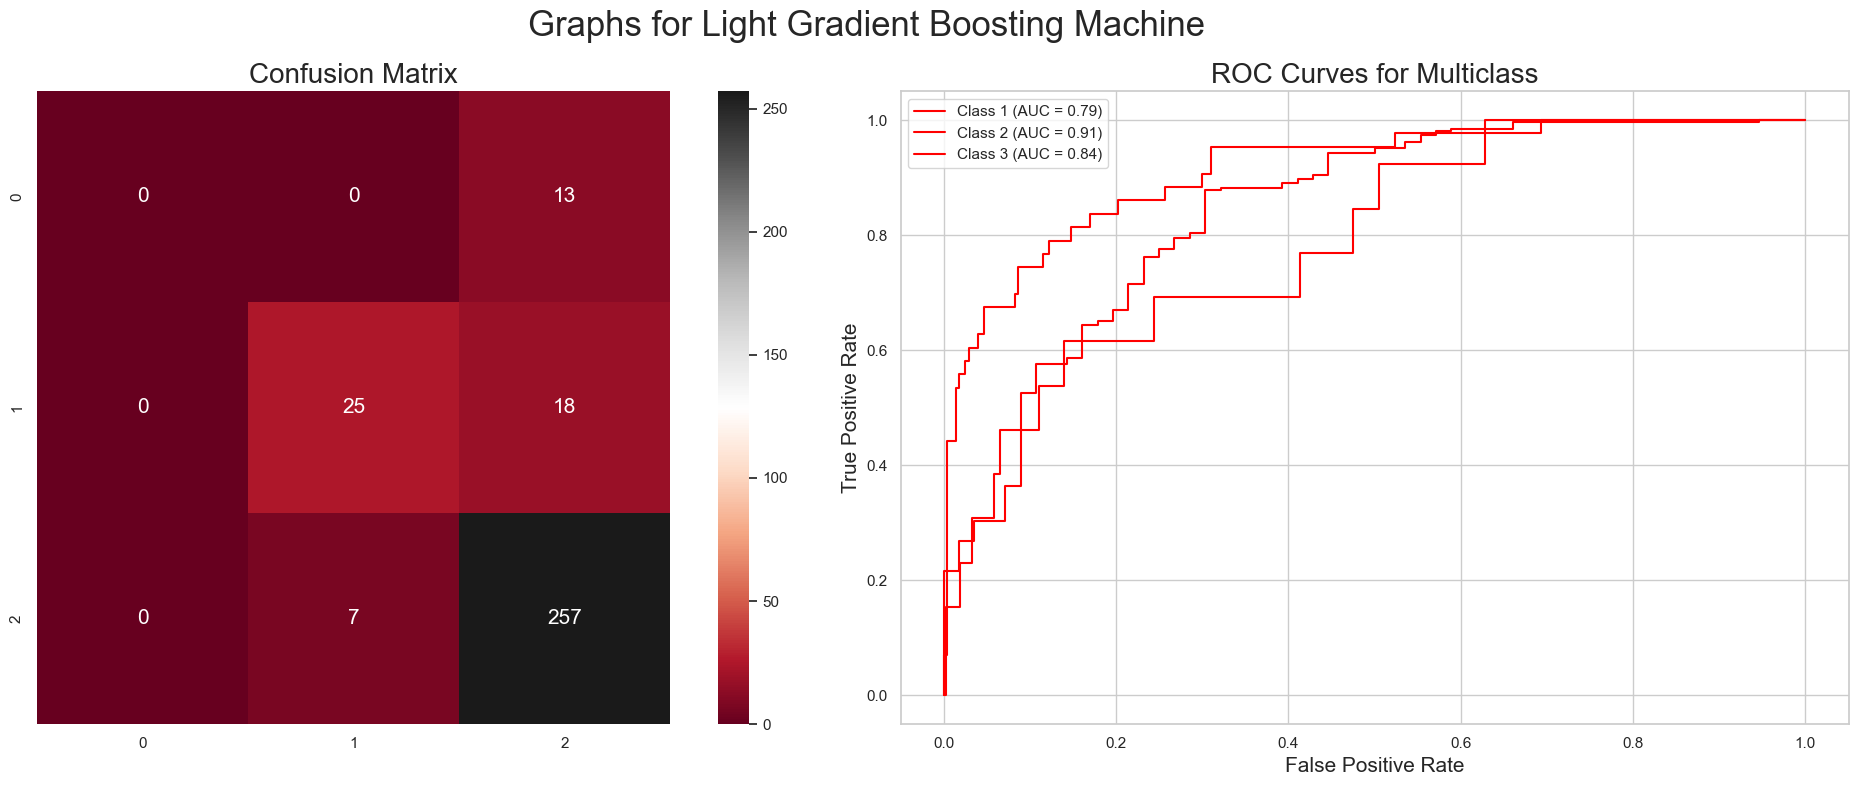

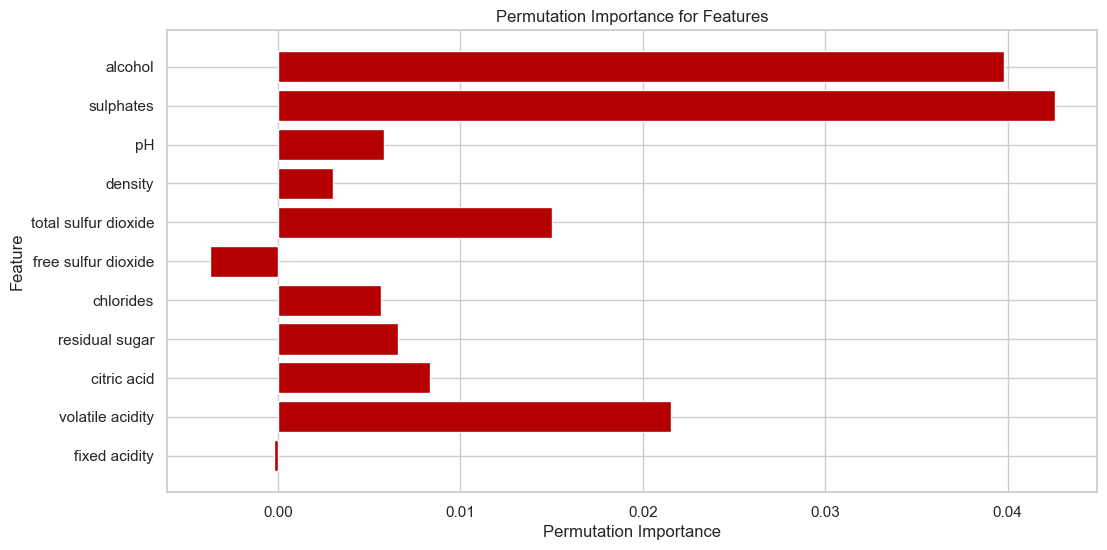

In [41]:
evaluate_model('Light Gradient Boosting Machine', lgbm.LGBMClassifier(

    boosting_type = 'gbdt',

    learning_rate = 0.1,

    n_estimators = 110,

    max_depth = 15,

    num_leaves = 40,

    min_child_weight = 1,

    subsample = 0.8,

    colsample_bytree = 0.8,

    reg_alpha = 0.0,

    reg_lambda = 0.1,

    random_state = 33,

    verbose = -1))

#### AdaBoost (Adaptive Boosting)

**AdaBoost (Adaptive Boosting)** is a popular ensemble learning method that improves the performance of weak classifiers by combining them into a strong learner. This algorithm sequentially fits classifiers to the data, focusing on correcting the errors of previous models by adjusting weights of misclassified instances.

**Advantages of AdaBoost**

1. **Improved Accuracy:** AdaBoost is known for its ability to significantly enhance the performance of weak classifiers. By combining several weak learners, such as decision stumps, into a strong model, it delivers better predictive accuracy compared to individual classifiers. This boosting process allows the algorithm to learn from mistakes iteratively and refine the overall performance, making it suitable for both classification and regression tasks.

2. **Adaptability:** Adaptive nature refers to AdaBoost's ability to adjust its focus during training. It increases the weight of misclassified instances, making them more influential in the next iteration. This adaptability ensures that the model targets challenging examples effectively, allowing it to handle complex decision boundaries and improve overall generalization.

3. **Versatility:** AdaBoost can be used with various weak learners, though it is most commonly paired with decision trees (often shallow trees called decision stumps). This versatility enables it to be applied across different domains, from text classification to image recognition, adapting to the specific needs of the task.


**Disadvantages of AdaBoost**

1. **Sensitivity to Noise Data and Outliers:** AdaBoost can be **sensitive to noise and outliers** because it prioritizes correctly classifying difficuly instances by assigning them higher weights. If there are noisy or mislabelled examples in the training data, the model might overemphasize these, leading to reduced performance on the test set.

2. **Computational Complexity:** The sequential training process of AdaBoost can make it computationally intensive, especially with large datasets or deep weak learners. As each iteration depends on the previous one, training times can be longer than non-boosting algorithms, requiring more computational resources.

3. **Prone to Overfitting:** Although AdaBoost usually generalizes well, it can sometimes overfit the training data, particularly when the model uses complex or too many weak learners. Regularization techniques and limiting the number of iterations are often necessary to avoid overfitting, especially when dealing with small or noisy datasets.


**Important Hyperparameters in AdaBoost**

1. **n_estimators:** This hyperparameter specifies the **number of weak classifiers** (iterations) to be combined in the boosting process. While increasing `n_estimators` can improve performance up to a point, excessively high values can lead to overfitting. Choosing an optimal value is essential for balancing performance and generalization.

2. **Learning Rate:** The learning rate parameter controls the contribution of each weak learner to the final ensemble. It scales the weights of the classifiers, acting as a regularization parameter. Lower values can improve generalization by slowing down the learning process, though it may require more iterations to converge. Typical values range from **0.01** to **1.0**.

3. **Base Estimator:** This parameter determines the **type of weak learner** used in AdaBoost. The default is a decision stump (a single-level decision tree), but other estimators such as deeper decision trees or custom classifiers can be used. The choice of base estimator significantly impacts the performance and complexity of the AdaBoost model.

4. **Algorithm:** The algorithm parameter can be set to either `SAMME` (multi-class AdaBoost) or `SAME.R` (real boosting). `SAMME.R` tends to perform better by leveraging probability estimates, making it the preferred choice for many applications.


**AdaBoost** is a powerful and adaptive boosting algorithm that effectively combines weak learners to create a robust model capable of handling complex tasks. While it excels in improving accuracy and adaptability, it requires careful attention to hyperparameters and training data quality. The algorithm's sensitivity to noisy data and computational demands can be addressed through regularization, choosing optimal `n_estimators`, and selecting the appropriate base estimator. With proper tuning, AdaBoost remains a go-to method for building strong predictive models across diverse applications.

For AdaBoost Classifier

Training Accuracy: 83.9719 %

Testing Accuracy: 84.0625 %

Accuracy Score: 84.0625 %



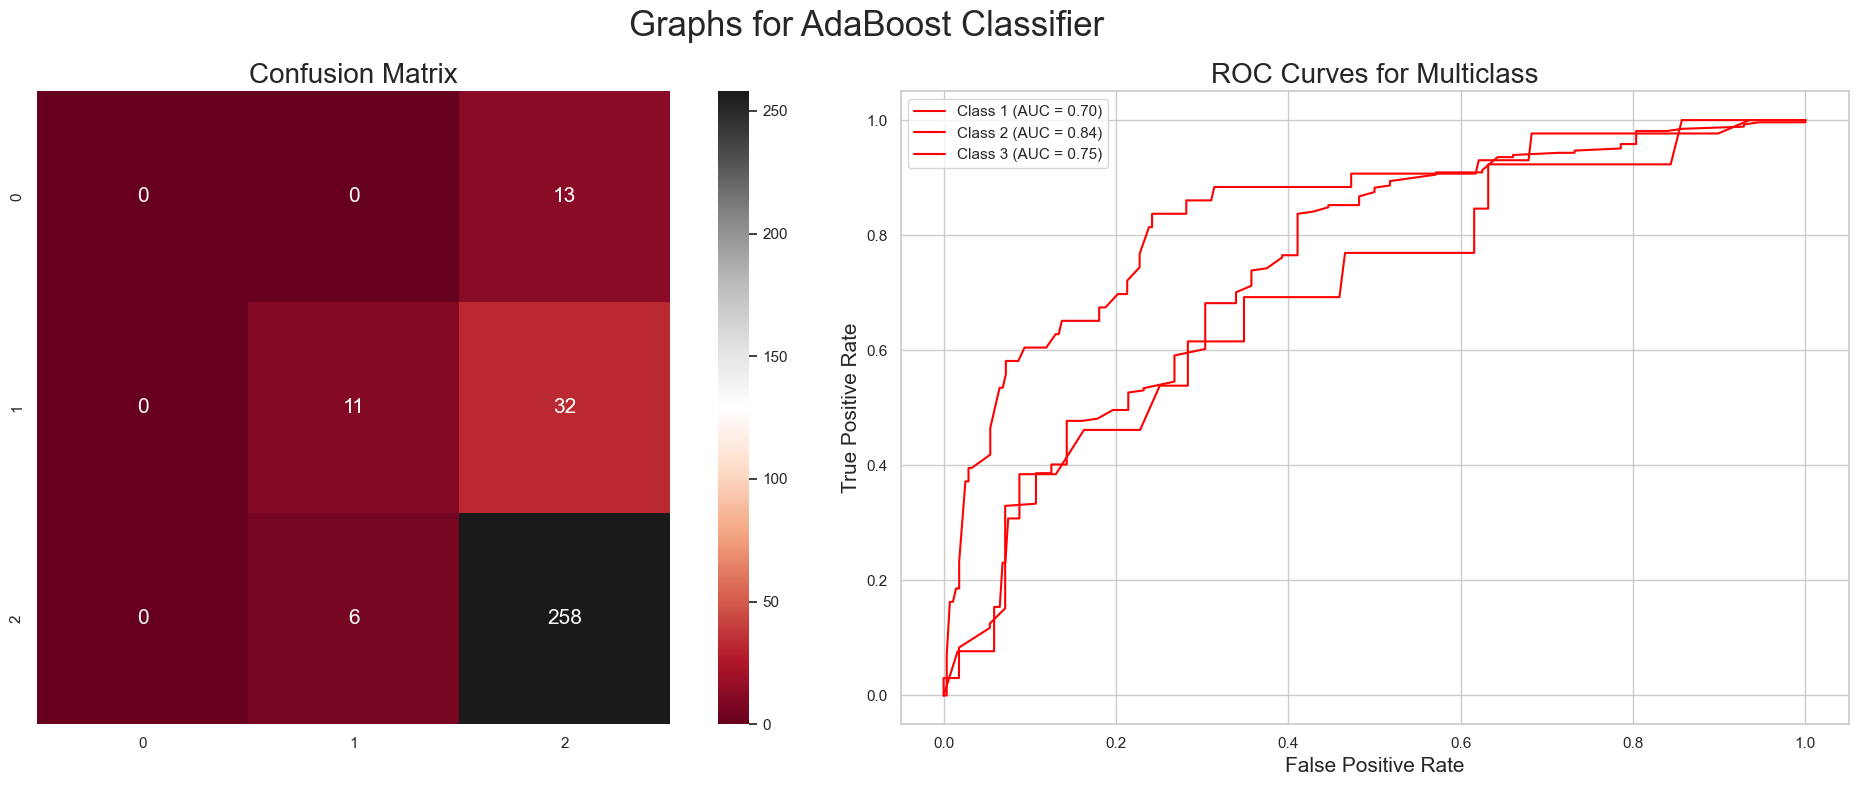

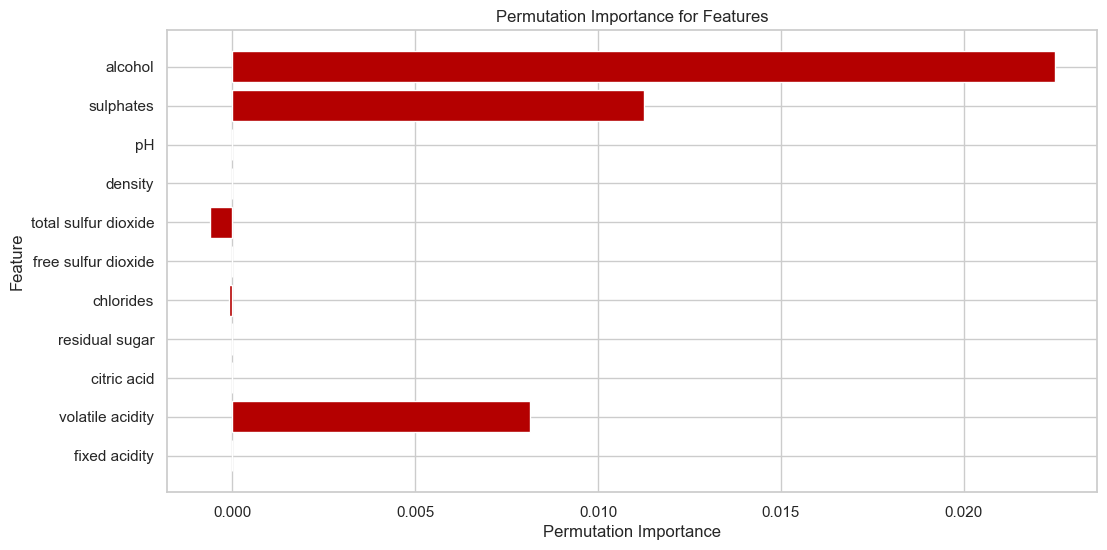

In [42]:
model = AdaBoostClassifier(

    #base_estimator=DecisionTreeClassifier(max_depth=1), 

    n_estimators=150,  

    learning_rate=0.1,

    random_state=33)

evaluate_model('AdaBoost Classifier', model)

#### CatBoost

**CatBoost** is high-performance, open-source gradient boosting library developed by Yandex. It is particularly known for its ability to handle categorical features natively, without needing extensive preprocessing. CatBoost is widely used for both classification and regression tasks and has proven to be effective in various machine learning competitions and real-world applications.

**Advantages of CatBoost**

1. **Native Categorical Feature Handling:** One of **CatBoost's most significant advantages** is its ability to work with **categorical features** without requiring manual encoding (such as one-hot-encoding or label encoding). This feature saves time in data preprocessing and often results in improved model accuracy, as the algorithm handles categorical variables in an optimized manner through its innovative encoding technique.

2. **Fast Training and Inference:** CatBoost is optimized for **fast training and low latency prediction**, thanks to its efficient gradient boosting implementation. The algorithm uses advanced methods like symmetric trees and ordered boosting, which reduce overfitting and speed up the training process. This makes it suitable for both large-scale applications and real-time prediction models.

3. **Robust to Overfitting:** CatBoost includes built-in mechanisms to reduce overfitting, such as ordered boosting and **L2 regularization**. These help the model generalize better and maintain high performance on test data, making it a reliable choice when the risk of overfitting is a concern.

4. **Ease of Use and Interpretability:** The CatBoost library comes with easy-to-use tools for **feature importance** analysis and visualization, helping users understand the impact of different features on the model's predictions. Its default settings work well in many cases, simplifying the training process and making it accessible even to those less experienced in hyperparameter tuning.


**Disadvantages of CatBoost:**

1. **Memory and Computational Resources:** CatBoost can be **resource-intensive**, especially when dealing with very large datasets or deep trees. This can lead to high memory usage and longer training times compared to simpler algorithms or smaller boosting libraries. Proper hardware resources and optimization techniques, such as limiting tree depth, can help mitigate the issue.

2. **Complexity of Hyperparameter Tuning:** While CatBoost often performs well with its default settings, achieving optimal performance may still require careful **hyperparameter tuning**. The model has numerous parameters that affect training, such as learning rate, tree depth, and boosting type, which can be challenging for beginners to balance effectively.

3. **Limited Community & Documentation Compared to Major Libraries:** Although CatBoost has been gaining popularity, it still has a **smaller community** compared to libraries like XGBoost or LightGBM. This can sometimes make finding solutions to specific issues or advanced use cases more difficult.


**Important Hyperparameters in CatBoost:**

1. **iterations:** The number of boosting iterations of **trees** to build. This parameter is analogous to `n_estimators` in other boosting algorithms. Higher values can increase accuracy but may also lead to longer training times and potential overfitting. Typical values range from **500 to 1000** for balanced performance.

2. **learning_rate:** The learning rate determines the step size at each iteration while moving toward a minimum of the loss function. Lower values, such as 0.01 to 0.1, provide better generalization but require more iterations. CatBoost has a feature called **Auto-learning rate**, which helps find an optimal rate for faster convergence.

3. **depth:** Controls the **maximum depth of the tree**, influencing the model's complexity. Shallower trees (e.g. depth 4-6) generalize better and are less likely to overfit, while deeper trees can capture more complex relationships at the risk of overfitting.

4. **l2_leaf_reg:** The L2 regularization term applied to leaf weights. Higher values of `l2_leaf_reg` can help prevent overfitting by adding a penalty to the model's complexity. Common values range from 3 to 10.

5. **cat_features:** A unique CatBoost parameter used to specify which columns are categorical. By passing a list of feature indices or names, CatBoost handles the categorical data automatically, simplifying preprocessing.

6. **boosting_type:** Determines the **type of boosting** strategy used. The most common options are `Ordered` and `Plain`, with **ordered boosting** helping to reduce overfitting by calculating splits on the part of the data and evaluating them on another.


**CatBoost** stands out for its capability to handle categorical features seamlessly, high performance, and built-in regularization mechanisms. While it may demand more memory and computational power, its robust features and user-friendly tools make it a strong choice for competitive machine learning tasks. Careful tuning of hyperparameters like `iterations`, `learning_rate`, and `depth` can further optimize model performance.

0:	learn: 0.9881071	total: 52.1ms	remaining: 26s
100:	learn: 0.2698545	total: 227ms	remaining: 897ms
200:	learn: 0.1828981	total: 402ms	remaining: 597ms
300:	learn: 0.1296239	total: 586ms	remaining: 388ms
400:	learn: 0.0984841	total: 760ms	remaining: 188ms
499:	learn: 0.0759821	total: 930ms	remaining: 0us
For CatBoost Classifier

Training Accuracy: 99.2963 %

Testing Accuracy: 86.8750 %

Accuracy Score: 86.8750 %



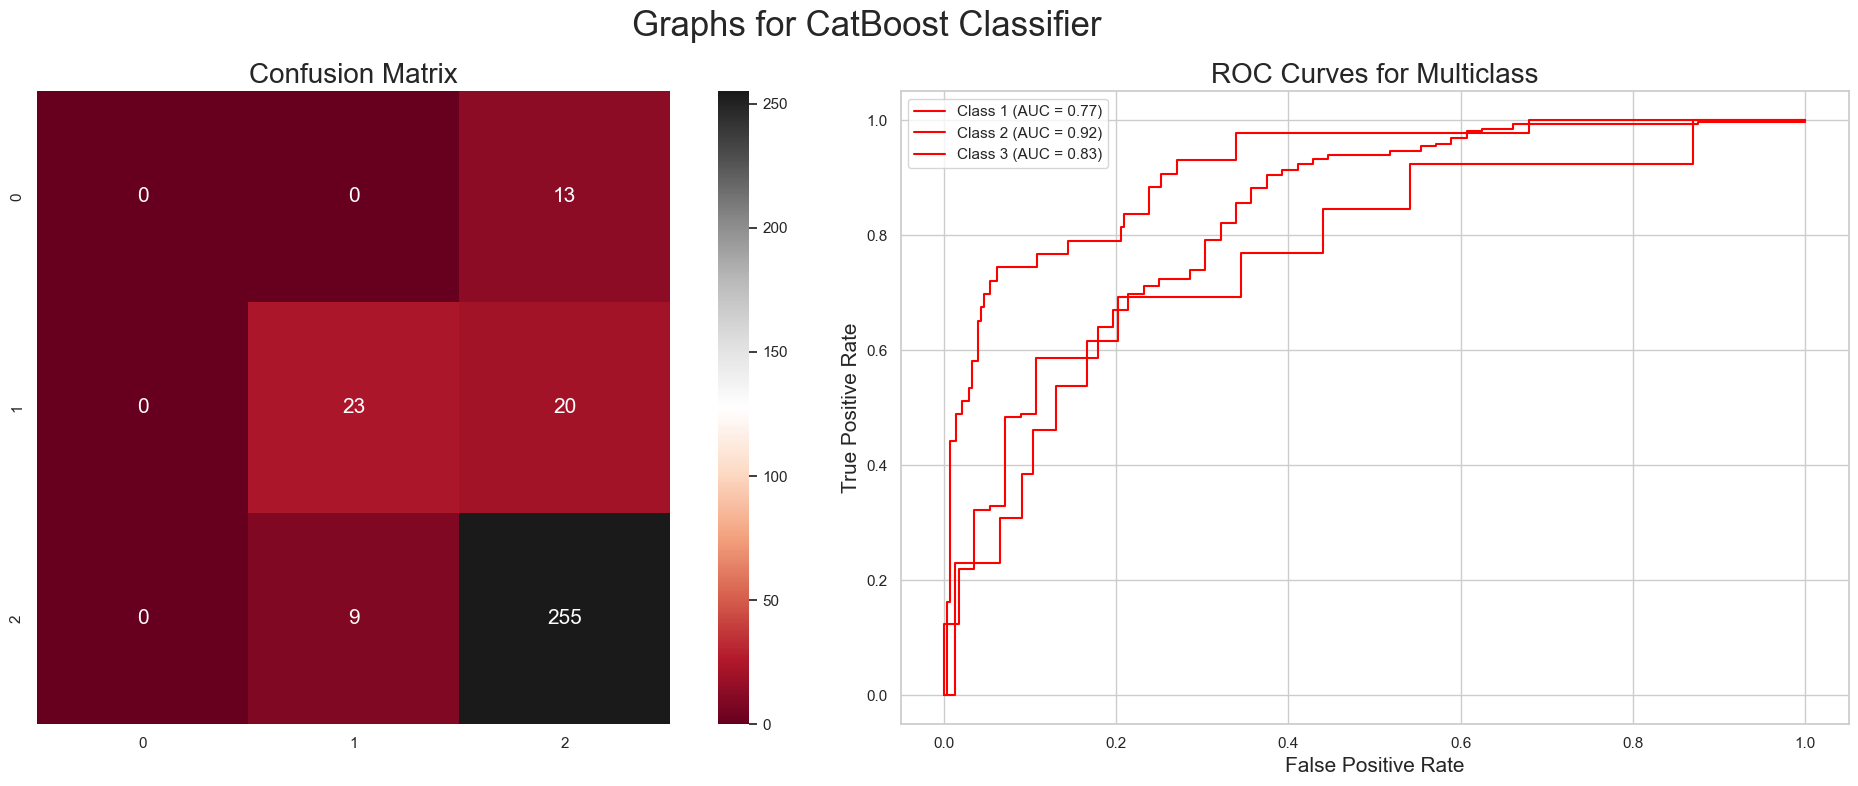

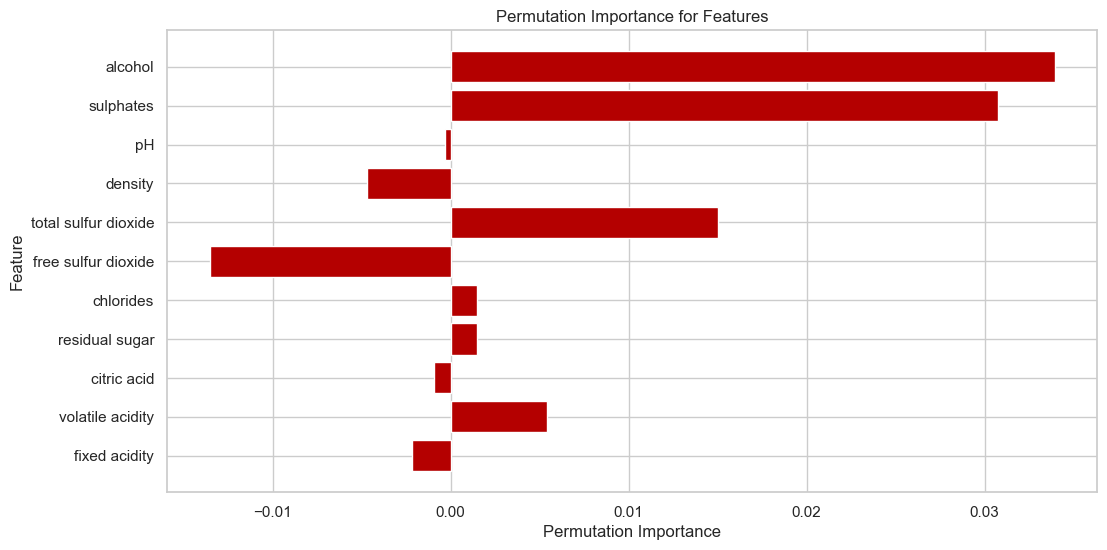

In [43]:
model = CatBoostClassifier(

    iterations=500,        

    learning_rate=0.1,     

    depth=6,                

    random_seed=33,

    verbose=100)

evaluate_model('CatBoost Classifier', model)

In [44]:
comparison = pd.DataFrame(data = models, columns=['Model', 'True Positive', 'False Positive',

                                                  'True Negative', 'False Negative',

                                                  'Accuracy (Training)', 'Accuracy (Test)'])

comparison

Model  True Positive  False Positive  \
0              Logistic Regression              0               0   
1         Decision Tree Classifier              3               1   
2         Random Forest Classifier              0               0   
3    Support Vector Classification              0               0   
4     Gradient Boosting Classifier              1               0   
5               XGBoost Classifier              0               0   
6  Light Gradient Boosting Machine              0               0   
7              AdaBoost Classifier              0               0   
8              CatBoost Classifier              0               0   

   True Negative  False Negative  Accuracy (Training)  Accuracy (Test)  
0             16               0             0.845192         0.850000  
1             22               3             1.000000         0.803125  
2             24               0             1.000000         0.887500  
3             16               0             0.860829         0.868750  
4             24               0             1.000000         0.862500  
5             22               0             1.000000         0.875000  
6             25               0             1.000000         0.881250  
7             11               0             0.839719         0.840625  
8             23               0             0.992963         0.868750

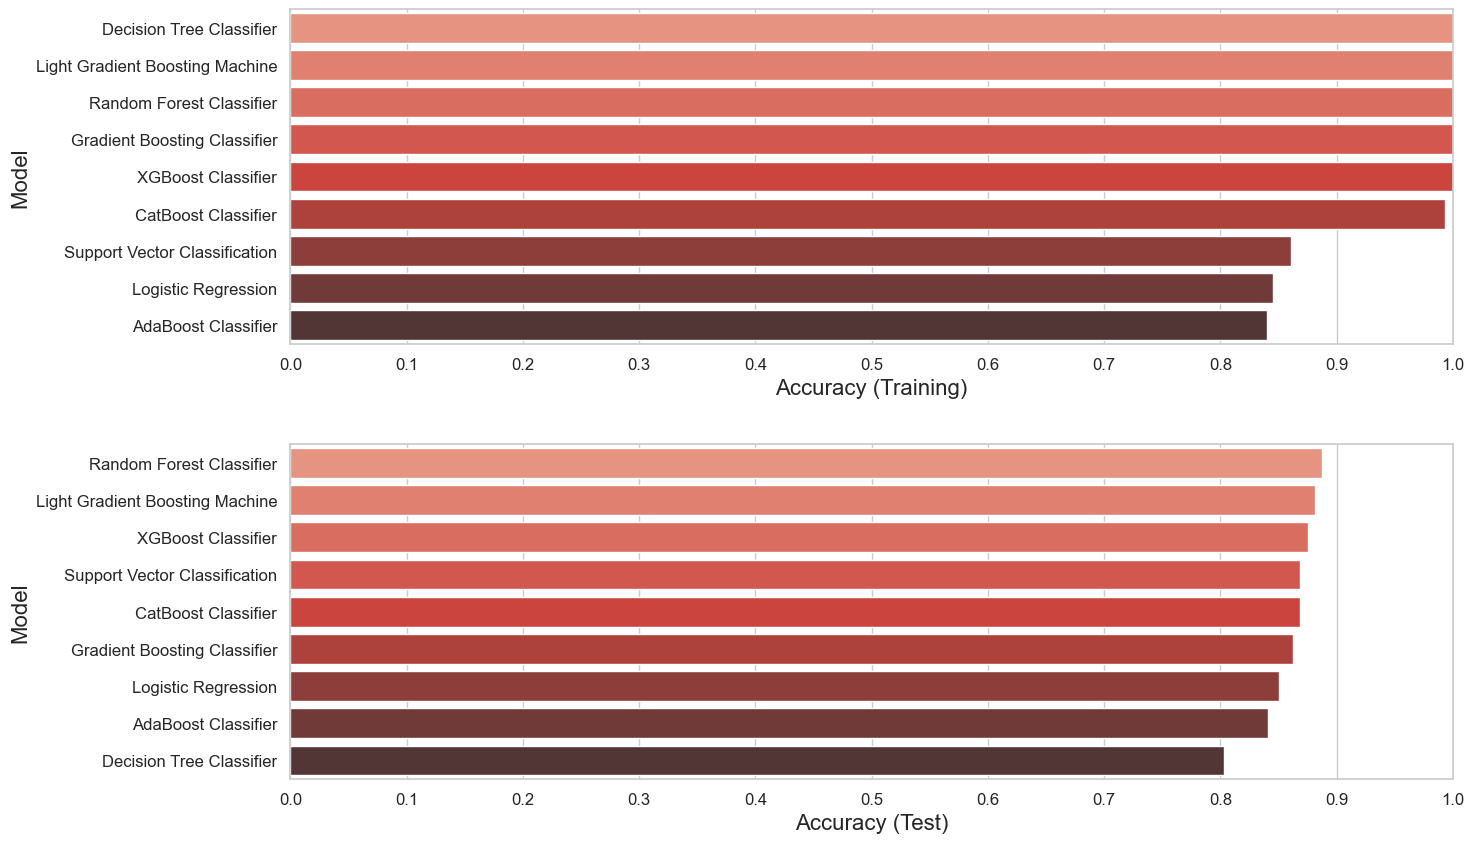

In [45]:
plt.figure(figsize=(15,10))


plt.subplot(2,1,1)

comparison.sort_values(by=['Accuracy (Training)'], ascending=False, inplace=True)


sns.barplot(x='Accuracy (Training)', y='Model', data = comparison, palette = 'Reds_d')

plt.xlabel('Accuracy (Training)', size=16)

plt.ylabel('Model', size=16)

plt.xlim(0, 1.0)

plt.xticks(np.arange(0, 1.1, 0.1), size=12)

plt.yticks(size=12)


plt.subplot(2, 1, 2)

comparison.sort_values(by=['Accuracy (Test)'], ascending=False, inplace=True)


sns.barplot(x='Accuracy (Test)', y='Model', data=comparison, palette='Reds_d')

plt.xlabel('Accuracy (Test)', size=16)

plt.ylabel('Model', size=16)

plt.xlim(0, 1.0)

plt.xticks(np.arange(0, 1.1, 0.1), size=12)

plt.yticks(size=12)

plt.subplots_adjust(hspace=0.3)

plt.show()

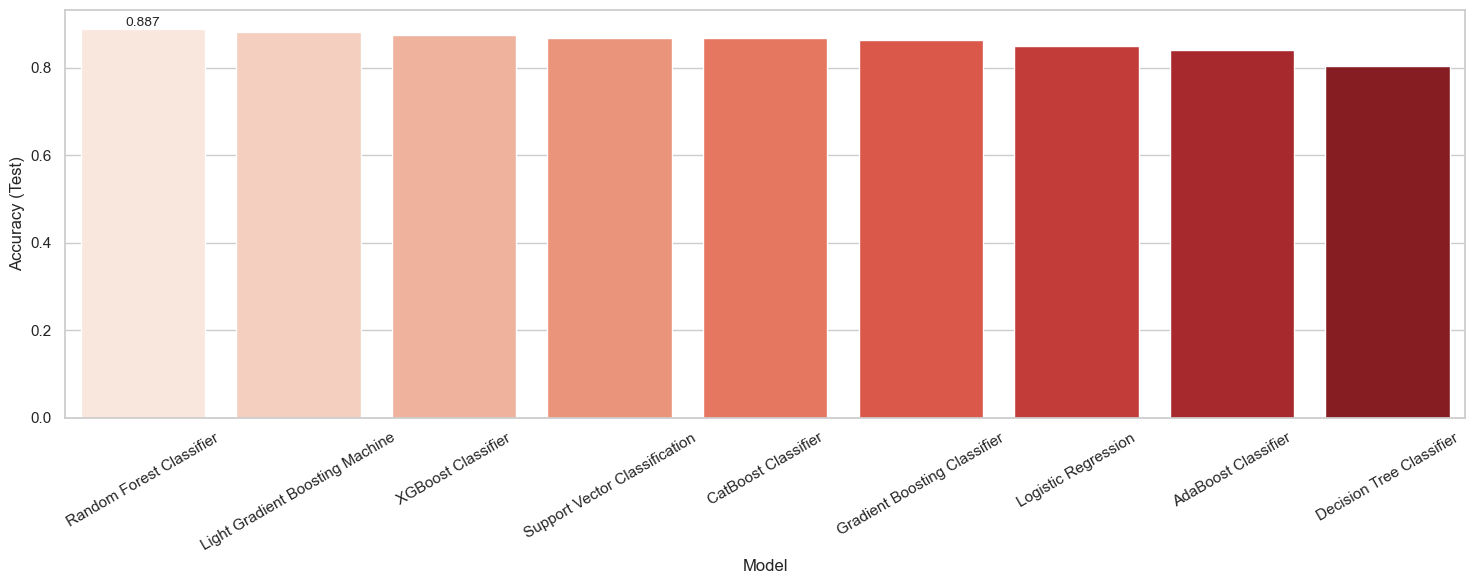

In [46]:
fig, ax = plt.subplots(1, 1, figsize=(15,6))

sns.barplot(x='Model', y='Accuracy (Test)', data=comparison, ax=ax, palette='Reds')

ax.bar_label(ax.containers[0], fmt='%.3f', size=10)


for label in ax.get_xticklabels():

    label.set_rotation(30)

plt.tight_layout()

plt.show()

<Figure size 2400x800 with 0 Axes>

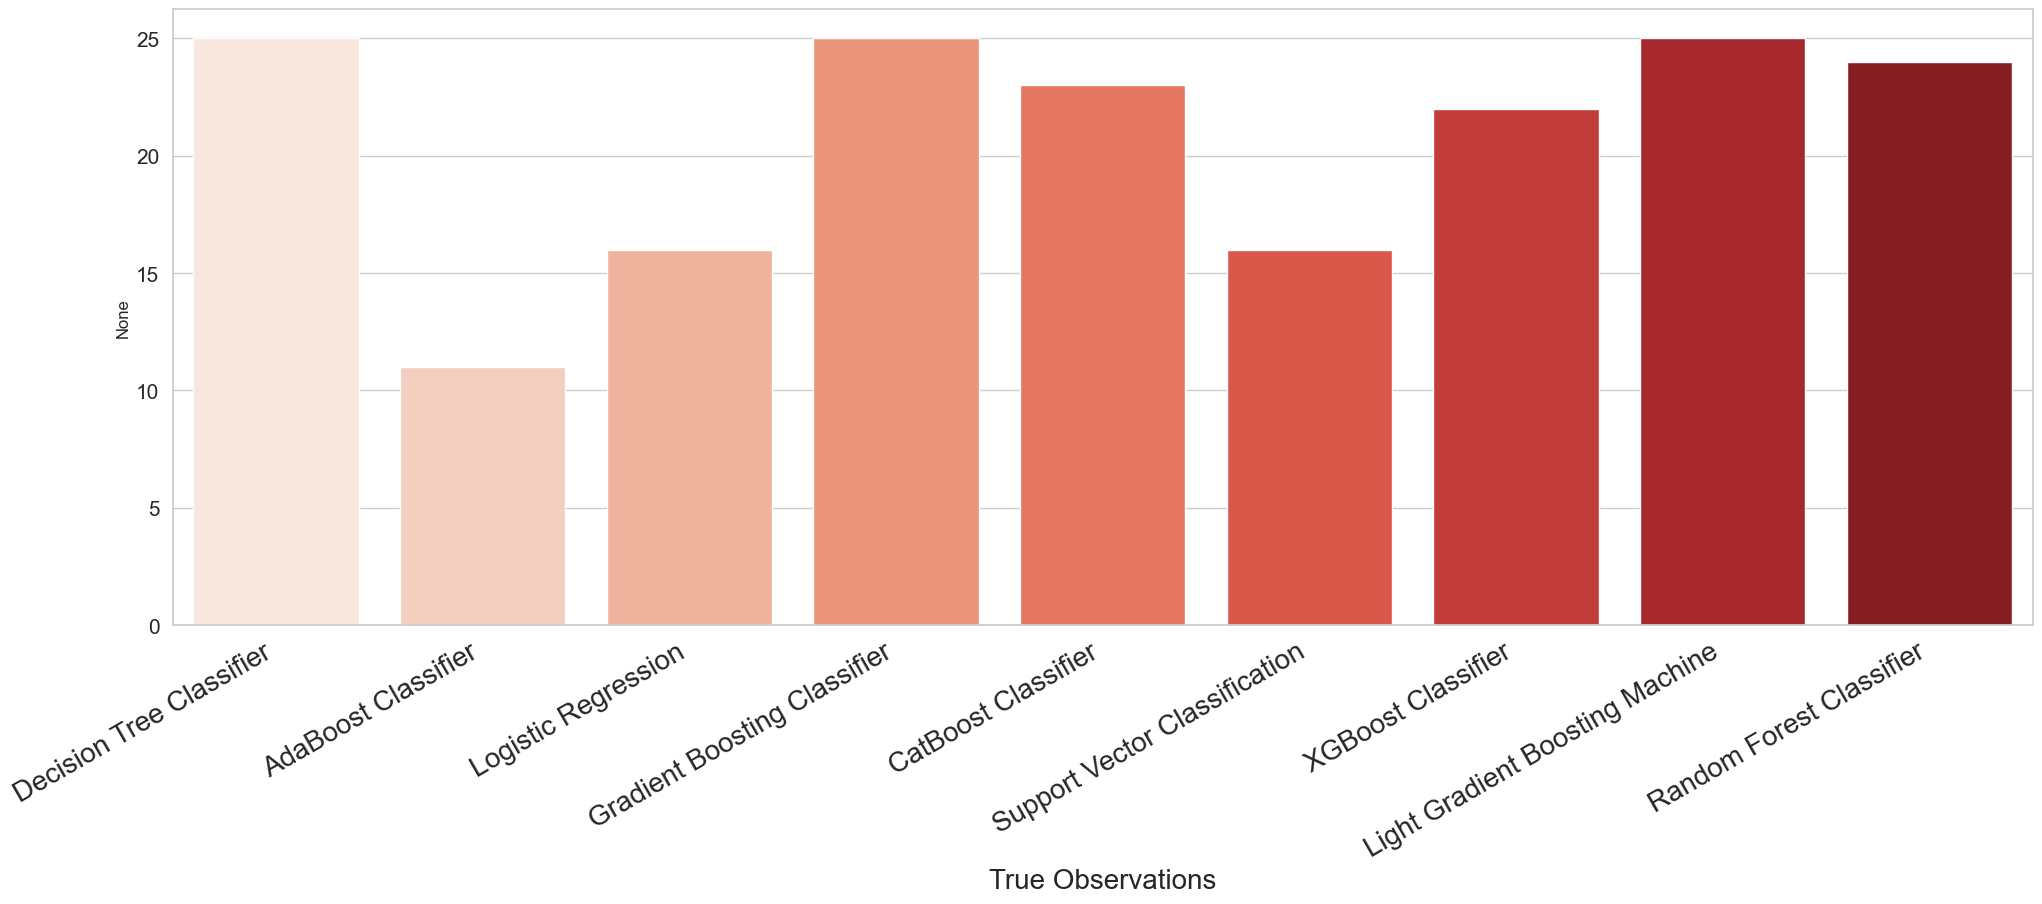

In [48]:
plt.figure(figsize=(24,8))

comparison.sort_values(by=[('Accuracy (Test)')], ascending=True, inplace=True)

sns.barplot(x = comparison['Model'], y=comparison['True Positive'] + comparison['True Negative'], palette = 'Reds')

plt.xlabel('Model', size=30)

plt.xticks(size=20, rotation=30, ha='right')

plt.xlabel('True Observations', size=20)

plt.yticks(size=15)

plt.show()

### Conclusion

The **Random Forest Classifier** demonstrated the **highest accuracy** among all the evaluated models, indicating its strong performance in correctly predicting the target variable overall. This result highlights its reliability as an ensemble learning method, leveraging multiple decision trees to enhance predictive power and reduce overfitting.

On the other hand, the **Decision Tree Classifier**, while recording the **lowest accuracy** compared to other models, showed an interesting characteristic—it achieved the **highest number of correct predictions after the Gradient Bossting Classifier**. This might seem contradictory at first, but it suggests that although AdaBoost had a lower percentage of overall correct predictions (accuracy), it succeeded in identifying a larger number of true positives or key instances that contributed more significantly to the practical outcome of the task.

This finding is essential for understanding model behavior beyond basic accuracy metrics. AdaBoost’s performance implies that despite its overall accuracy, it can be highly effective for imbalanced datasets or scenarios where correctly identifying specific cases is more valuable than a high general accuracy rate. The outcome highlights the importance of considering multiple evaluations, such as **Confusion Matrix**, to fully understand a model’s utility in various contexts.